In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
from scipy.stats import norm
from tqdm.auto import tqdm

In [2]:
data = pd.read_csv('ba2.csv')

In [3]:
# for i in data.columns:
#     if len(data[i].unique()) > 4:
#         print(f'"{i}",')

In [4]:
TARGET = 'Тяжесть'

In [5]:
data[TARGET].unique()

array([3, 2], dtype=int64)

In [6]:
name_group_all = {
    'Тяжесть' : ['БАТТ', 'БАСТ'],
    'SNP_rs896' : ['TT', 'TC', 'CC']
}

In [7]:
name_group_all[TARGET]

['БАТТ', 'БАСТ']

In [8]:
#обозначение групп

name_group = name_group_all[TARGET]
#spisok_group
data = data.dropna(subset=[TARGET])
data = data.astype({TARGET: np.int32})
#обозначение групп

In [9]:
data[TARGET].unique()

array([3, 2])

In [11]:
#data['Тяжесть'].sum()

In [10]:
for i in range(len(data['Тяжесть'])):
    if data.loc[i,'Тяжесть'] == 2:
        data.loc[i,'Тяжесть'] = 1
    elif data.loc[i,'Тяжесть'] == 3:
        data.loc[i,'Тяжесть'] = 0
        

In [11]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
'Приступов_удушья_в_день',
'Обострений_в_год',
'Длительность_БА_на_момент_исслед',
'САД',
'ДАД',
'ЧД',
'ЧСС',
'Пульс',
'Сатурация_при_поступлении',
'Сатурация_при_выписке',
'Лейкоциты_при_поступлении',
'Эритроциты_при_постпулении',
'Гемоглобин_при_поступлении',
'Тромбоциты_при_поступлении',
'Сегментоядерные_при_поступлении',
'Эозинофилы_при_поступлении',
'Моноциты_при_поступлении',
'Лимфоциты_при_поступлении',
'СОЭ_при_поступлении',
'Лейкоциты_при_выписке',
'Эритроциты_при_выписке',
'Гемоглобин_при_выписке',
'Тромбоциты_при_выписке',
'Сегментоядерные_при_выписке',
'Лимфоциты_при_выписке',
'СОЭ_при_выписке',
'БАК_посев_мокроты',
'IgE_общий',
'FeF25_при_поступлении',
'FeF50_при_поступлении',
'FeF75_при_поступлении',
'FeF25_при_выписке',
'FeF50_при_выписке',
'FeF75_при_выписке',
'ЧСС_ЭКГ',
'Общий_билирубин',
'Глюкоза_крови',
'Общий_белок',
'Холестерин',
'Возраст2',
'Рост',
'Вес',
'обострений_за_последний_год',
'ACQ_контроль_симптомов_БА',
'Самочувствие',
'Активность',
'Настроение',
'Экстраверсия_интроверсия',
'Ригидность_пластичность',
'Эмоционвозбудим_уравновешенность',
'Быстрота_реакц_медлительность',
'Активность_пасивность',
'Искренность',
'Реактивная_тревожность',
'Ситуатвиная_тревожность',
'Физическая_активность_PF',
'Физичпроблемы_в_жизнедеят_RP',
'Интенсивность_боли_BP',
'Общее_здоровье_GH',
'Жизненная_актвиность_VT',
'Социальная_активность_SF',
'Эмоционал_проблемы_в_жизнедеят_RE',
'Психическое_здоровье_MH',
'Физич_компонент_здор_PH',
'Психич_компонент_здор_MH',
'Наличие_вегет_дисфун',
'Наличие_вегет_дисфун2',
'Апатия1',
'Апатия2',
'Уровень_VIP',
'Уровень_SP',
'ЖЕЛ_при_поступлении',
'ОФВ1_при_поступлении',
'Индекс_Тиффно_при_поступлении',
'ЖЕЛ_при_выписке',
'ОФВ1_при_выписке',
'Индекс_Тиффно_при_выписке',
'ИМТ',
'VAR_mc',
'aVNN_mc',
'SDNN_mc',
'pNN50',
'rMSSD',
'SDNNidx_mc',
'SDANN_mc',
'VLF',
'LF_Симпатика',
'HF_Парасимпатика',
'nHF',
'CBBP',
'LF_HF',
]
#  categorial = [
#"Сезон_обострения_БА",
# "Худшее_время_суток_по_БА",
# "Ухудшение_состояния_в_отпуске",
# "Заболевания_ЖКТ",
# "Заболевания_ЛОРорганов",
# "Терапия_БА",
#"Профессия",
# "Форма",
# "Тяжесть",
#"Оценка_соц_бытовых_условий",
# "ДН",
# "Эмфизема",
# "ХЛС",
# "Пневмосклероз",
# "Гормонозависимость",
# "Проживание",
# "Профессиональное_заболевание",
# "ГБ",
# "ИБС",
# "ГЭРБ",
# "Симбикорт",
# "Формисонид_натив",
# "Дуоресп_Спиромакс",
# "Спирива",
# "Беродуал",
# "Форадил_комби",
# "Сальбутамол",
# "Серетид",
# "Преднизолон_per_os",
# "Антилейкотриеновые",
# "Беклометазон",
# "Эуфиллин_per_os",
# "Сингуляр",
# "Фостер",
# "Сибри",
# "Беротек",
# "Ипратерол",
# "Палочкоядерные_при_поступлении",
# "Базофилы_при_постпулении",
# "Палочкоядерные_при_выписке",
# "Эозинофилы_при_выпсике",
# "Моноциты_при_выписке",
# "Базофилы_при_выписке",
# "Наличие_суносовой_аритмии",
# "Наличие_гипертрофии_ЛЖ",
# "Эозинофилы_в_мокроте",
# "Пол",
# "Наличие_работы",
# "Работа_в_ночную_смену",
# "Профессиональый_контакт",
# "Образование",
# "Наличие_аллергической_реакции",
# "Аллерг_реакция_у_родственников",
# "Наличие_заболевания_ЖКТ",
# "Наличие_заболевания_ЛОРорганов",
# "Наличие_грибковых_заболеваний",
# "Ухудшение_состояния_при_физнагруз",
# "Ухудшение_состояния_во_время_еды",
# "Влияние_менструальногоцикла_на_БА",
# "Наличие_ОтёкаКвинке_в_анамнезе",
# "Наличие_стресса",
# "Наличие_других_заболеваний",
# "SNP_rs896",
# "SNP_rs2072100",
# "SNP_rs3771829",
# "SNP_rs3823082",
# "Фенотип",
# "Коридор",
# "Симпатика",
# ]


In [12]:
spisok_group = scale

In [13]:
#рисование графика на 2 категории
def box_plot_2_group(group):
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    # Получить виды, отсортированные по алфавиту
    species = sorted(data_vr[TARGET].unique())
    # y_data_vr — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data_vr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
 
    # Colors
    BG_WHITE = "#ffffff"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#000e28"
    RED_DARK = "#173063"
    
   
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой
    if data_vr[group].max() > 500:
        HLINES = [(math.floor(data_vr[group].min()/50))*50 , 
                  math.floor(((math.floor(data_vr[group].min()/50))*50 + (math.ceil(data_vr[group].max()/50))*50)/2), 
                  (math.ceil(data_vr[group].max()/50))*50 ]
    elif data_vr[group].max() > 100:
        HLINES = [(math.floor(data_vr[group].min()/10))*10 , 
                  math.floor(((math.floor(data_vr[group].min()/10))*10 + (math.ceil(data_vr[group].max()/10))*10)/2), 
                  (math.ceil(data_vr[group].max()/10))*10 ]
    elif data_vr[group].max() > 20: 
        HLINES = [(math.floor(data_vr[group].min()/5))*5 , 
                  math.floor(((math.floor(data_vr[group].min()/5))*5 + (math.ceil(data_vr[group].max()/5))*5)/2), 
                  (math.ceil(data_vr[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data_vr[group].min())) , 
                  math.floor(((math.floor(data_vr[group].min())) + (math.ceil(data_vr[group].max())))/2), 
                  (math.ceil(data_vr[group].max()))]        

    fig, ax = plt.subplots(figsize= (10, 6))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
#        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK,
        #hatch = '/'
    )
    whiskerprops = dict(
        linewidth=2, 
        color=GREY_DARK,
    )

    bp = ax.boxplot(
        y_data_vr, widths = 0.25,
        positions=POSITIONS, 
        patch_artist=True,
    #    showfliers = True, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = whiskerprops,
        boxprops = boxprops,
        notch=True 
        #, showmeans = True,
    )
#    for box in bp['boxes']:
#    # change fill color
#    box.set(facecolor = 'green' )
#    # change hatch
#    box.set(hatch = '/')
    
    bp['boxes'][0].set_facecolor('#b3cdff')
    bp['boxes'][1].set_facecolor('#3c5e9e')
#    bp['boxes'][0].set_hatch('/')
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data_vr]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )
    
    # Настройка макета --------------------------------------------------------------
    ax.spines["right"].set_color(GREY_LIGHT)
    ax.spines["top"].set_color(GREY_LIGHT)
  
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")
    
    # xlabels учитывает размер выборки для каждого вида
    
    xlabels = [f"{name_group[specie]}\n(n={y_data_vr[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
#    ax.set_xlabel("Группа", size=18, weight="bold")
 
    plt.show()
    print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]} и {name_group[1]}.')
    return

In [14]:
#рисование графика на 3 и более категории
def box_plot_3_group(group):
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    # Получить виды, отсортированные по алфавиту
    species = sorted(data_vr[TARGET].unique())
    # y_data_vr — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data_vr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
 
    # Colors
    BG_WHITE = "#ffffff"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#000e28"
    RED_DARK = "#173063"
    
   
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    if len(data_vr[TARGET].unique()) == 3:
        POSITIONS = [0, 1, 2]        
    if len(data_vr[TARGET].unique()) == 4:
        POSITIONS = [0, 1, 2,3]
    if len(data_vr[TARGET].unique()) == 5:
        POSITIONS = [0, 1, 2,3,4]
    
    # Horizontal lines надо потом вычислит формулой
    if data_vr[group].max() > 500:
        HLINES = [(math.floor(data_vr[group].min()/50))*50 , 
                  math.floor(((math.floor(data_vr[group].min()/50))*50 + (math.ceil(data_vr[group].max()/50))*50)/2), 
                  (math.ceil(data_vr[group].max()/50))*50 ]
    elif data_vr[group].max() > 100:
        HLINES = [(math.floor(data_vr[group].min()/10))*10 , 
                  math.floor(((math.floor(data_vr[group].min()/10))*10 + (math.ceil(data_vr[group].max()/10))*10)/2), 
                  (math.ceil(data_vr[group].max()/10))*10 ]
    elif data_vr[group].max() > 20: 
        HLINES = [(math.floor(data_vr[group].min()/5))*5 , 
                  math.floor(((math.floor(data_vr[group].min()/5))*5 + (math.ceil(data_vr[group].max()/5))*5)/2), 
                  (math.ceil(data_vr[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data_vr[group].min())) , 
                  math.floor(((math.floor(data_vr[group].min())) + (math.ceil(data_vr[group].max())))/2), 
                  (math.ceil(data_vr[group].max()))]        

    fig, ax = plt.subplots(figsize= (10, 6))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    #для 2 групп
    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
#        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK,
        )
    whiskerprops = dict(
        linewidth=2, 
        color=GREY_DARK,
    )

    bp = ax.boxplot(
        y_data_vr, widths = 0.25,
        positions=POSITIONS, 
        patch_artist=True,
    #    showfliers = True, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = whiskerprops,
        boxprops = boxprops,
        notch=True 
        #, showmeans = True,
    )
#    for box in bp['boxes']:
#    # change fill color
#    box.set(facecolor = 'green' )
#    # change hatch
#    box.set(hatch = '/')

    if len(data_vr[TARGET].unique()) == 3:
        bp['boxes'][0].set_facecolor('#A6CFD6')
        bp['boxes'][1].set_facecolor('#6888AD')
        bp['boxes'][2].set_facecolor('#48507E')
        
    if len(data_vr[TARGET].unique()) == 4:
        bp['boxes'][0].set_facecolor('#C1E1E1')
        bp['boxes'][1].set_facecolor('#7CA5BF')
        bp['boxes'][2].set_facecolor('#536592')
        bp['boxes'][3].set_facecolor('#48507E')

    if len(data_vr[TARGET].unique()) == 5:
        bp['boxes'][0].set_facecolor('#e4eaeb')
        bp['boxes'][1].set_facecolor('#C1E1E1')
        bp['boxes'][2].set_facecolor('#7CA5BF')
        bp['boxes'][3].set_facecolor('#536592')
        bp['boxes'][4].set_facecolor('#48507E')

#    bp['boxes'][0].set_hatch('/')
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data_vr]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )
    
    # Настройка макета --------------------------------------------------------------
    ax.spines["right"].set_color(GREY_LIGHT)
    ax.spines["top"].set_color(GREY_LIGHT)
  
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")
    
    # xlabels учитывает размер выборки для каждого вида
    
    xlabels = [f"{name_group[specie]}\n(n={y_data_vr[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
#    ax.set_xlabel("Группа", size=18, weight="bold")
 
    plt.show()
    if len(data_vr[TARGET].unique()) == 3:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]} и {name_group[2]}.')
    if len(data_vr[TARGET].unique()) == 4:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]}, {name_group[2]} и {name_group[3]}.')
    if len(data_vr[TARGET].unique()) == 5:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]}, {name_group[2]}, {name_group[3]} и {name_group[4]}.')
    
    return

In [15]:
#Статистики
def descriptive_statistics_for_mean(i):
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    data_stat2 = {
        'Mean':[f'{data_stat[specie].mean():.2f}' for specie in species], 
        'SE':[f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species],
        'Mean±SE' : [f'{data_stat[specie].mean():.2f}±'
                     f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species
                    ],
        'Q1 (25%)': [f'{np.quantile([data_stat[specie]], 0.25):.2f}' for specie in species],
        'Median (50%)': [f'{np.quantile([data_stat[specie]], 0.5):.2f}' for specie in species],
        'Q3 (75%)': [f'{np.quantile([data_stat[specie]], 0.75):.2f}' for specie in species],
        'Median [Q1-Q3]' : [
            f'{np.quantile([data_stat[specie]], 0.5):.2f} [{np.quantile([data_stat[specie]], 0.25):.2f}-'
            f'{np.quantile([data_stat[specie]], 0.75):.2f}]' for specie in species
        ]
    } 

    # Creates pandas DataFrame. 
    df = pd.DataFrame(data_stat2, index =[f'{name_group[specie]}' for specie in species]) 
    display(df)
    return

In [16]:
def normal_test(i):
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    
    for specie in species:
        k2, p = st.normaltest(data_stat[specie])
        if p > alpha:
            print(f'Распределение группы {name_group[specie]} соответствует нормальному распределению p={p:.4f}')
        else:
            print(f'Распределение группы {name_group[specie]} отличается от нормального распределения p={p:.4f}')

    k2, p = st.normaltest(data_vr[group])
    
    if p > alpha:
        print(f'Распределение в общей выборке соостветствует нормальному распределению p={p:.4f}')
        print()
        text = f'Рекомендуется использовать Параметрические критерии т-тест или ANOVA'
        print("\033[32m{}".format(text))
    else:
        print(f'Распределение в общей выборке отличается от нормального распределения p={p:.4f}')
        print()
        text = f'Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap'
        print("\033[31m{}".format(text))
        
    print("\033[30m".format())
    return

In [17]:
def test_2_value(i):
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    
    statistic, p, = st.ttest_ind(data_vr[data_vr[TARGET] == species[0]][group], 
                              data_vr[data_vr[TARGET] == species[1]][group])
    print('t-тест (тест Стьюдента)')
    print(f't={statistic:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
        
    statistic, p, = st.mannwhitneyu(data_vr[data_vr[TARGET] == species[0]][group], 
                              data_vr[data_vr[TARGET] == species[1]][group])
    print('Критерий Манна — Уитни')
    print(f'U={statistic:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
    
#Тут пошел бутстреп

    data_column_1 = data_vr[data_vr[TARGET] == species[0]][group] # числовые значения первой выборки
    data_column_2 = data_vr[data_vr[TARGET] == species[1]][group] # числовые значения второй выборки
    
    boot_it = 10000 # количество бутстрэп-подвыборок
    statistic = np.mean # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости

    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    print('Bootstrap (многократная генерация выборок методом Монте-Карло)')
    
#    print(f't={quants.loc[1,0]:.2f}, p={p_value:.3f}')
    print(f'Разница средних двух выборок {(data_column_1.mean() - data_column_2.mean()):.2f}')
    print(f'95%Cl (разницы) = ({round(quants[0].iloc[0],3)})-({round(quants[0].iloc[1],3)})')
    print(f'p={p_value:.3f}')
    if p_value > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
    return
          

In [18]:
def test_3_value(i):
    
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    artr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    m_comp = pairwise_tukeyhsd(endog=data_vr[group], groups=data_vr[TARGET], alpha=alpha)
    
    if len(data_vr[TARGET].unique()) == 3:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2])
    if len(data_vr[TARGET].unique()) == 4:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2], artr[3])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2], artr[3])
    if len(data_vr[TARGET].unique()) == 5:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2], artr[3], artr[4])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2], artr[3], artr[4])
    print('ANOVA')
    print(f'f={fvalue:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
       
    print(m_comp)
    print()
    print()
    print('Tест Крускала-Уоллиса.')
    print(f'k={kvalue:.2f}, p={pk:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text) + "\033[30m".format())
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text) + "\033[30m".format())
       
    
    #Попарное сравнение тест Манна-Уитни с поправкой Бонферони на множественные сравнения
    print('Попарное сравнение тест Манна-Уитни с поправкой Бонферони на множественные сравнения')
    print('------------------------------------------------------------------------------------')
    print('group1    group2        U         p-adj      есть различия / нет различий')
    print('------------------------------------------------------------------------------------')
    n = len(data_vr[TARGET].unique())
    for i in range(n):
        for j in range(i+1,n):
            statistic, p, = st.mannwhitneyu(data_vr[data_vr[TARGET] == species[i]][group], 
                                            data_vr[data_vr[TARGET] == species[j]][group])
            if p > alpha:
                text = 'нет значимых различий'
                text = ("\033[31m{}".format(text))
            else:
                text = 'есть значимые различия'
                text = ("\033[32m{}".format(text))
                  
            print(f'     {i}         {j}        {statistic:.2f}    {p:.4f}     {text}' + "\033[30m".format())
            
    print('------------------------------------------------------------------------------------')

    
          

    #Тут пошел бутстреп
    boot_it = 10000 # количество бутстрэп-подвыборок
    statistic = np.mean # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
    print()
    print()
    print('Bootstrap')
    print()
    
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Бонферони')
    print('уменьшения ложноположительных результатов')
#     print('------------------------------------------------------------------------------------')
#     print('group1 group2 Разница средних (95%Cl)   p-value  p-adj    есть различия/нет различий')
#     print('------------------------------------------------------------------------------------')
    
    

    data_column_1 = data_vr[data_vr[TARGET] == species[0]][group] # числовые значения первой выборки
    data_column_2 = data_vr[data_vr[TARGET] == species[1]][group] # числовые значения второй выборки

    n = len(data_vr[TARGET].unique())
    kol_test = 0
    for i in range(n):
        kol_test += i 

    index = np.arange(0, kol_test)
    columns = ['gr1', 'gr2', 'Δсредних', '(95%Cl)', 'p-value', 'p-adj', 'статус']
    df = pd.DataFrame(index=index, columns=columns)


    m=0
    for i in range(n):
        for j in range(i+1,n):
            
#место начала подсчета бутстрепа
            data_column_1 = data_vr[data_vr[TARGET] == species[i]][group] # числовые значения первой выборки
            data_column_2 = data_vr[data_vr[TARGET] == species[j]][group] # числовые значения второй выборки

            boot_len = max([len(data_column_1), len(data_column_2)])
            boot_data = []
            for rep in range(boot_it): # извлекаем подвыборки
                samples_1 = data_column_1.sample(
                    boot_len, 
                    replace = True # параметр возвращения
                ).values

                samples_2 = data_column_2.sample(
                    boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
                    replace = True
                ).values

                boot_data.append(statistic(samples_1-samples_2)) 
            pd_boot_data = pd.DataFrame(boot_data)

            left_quant = (1 - bootstrap_conf_level)/2
            right_quant = 1 - (1 - bootstrap_conf_level) / 2
            quants = pd_boot_data.quantile([left_quant, right_quant])

            p_1 = norm.cdf(
                x = 0, 
                loc = np.mean(boot_data), 
                scale = np.std(boot_data)
            )
            p_2 = norm.cdf(
                x = 0, 
                loc = -np.mean(boot_data), 
                scale = np.std(boot_data)
            )
            p_value = min(p_1, p_2) * 2

#конец подсчета бутстрепа
            if p_value*kol_test > alpha:
                text = 'нет разл.'
                text = ("\033[31m{}".format(text))
            else:
                text = 'есть разл.'
                text = ("\033[32m{}".format(text))
            
            
            
#             print(f'     {i}      {j}   {(data_column_1.mean() - data_column_2.mean()):.2f} '
#                 f'({round(quants[0].iloc[0],3)})-({round(quants[0].iloc[1],3)})    {p_value:.4f}  '
#                  f'{p_value*kol_test:.4f}   {text}' + "\033[30m".format())
            
            df.loc[m,'gr1'] = i
            df.loc[m,'gr2'] = j
            df.loc[m,'Δсредних'] = f'{(data_column_1.mean() - data_column_2.mean()):.2f}'
            df.loc[m,'(95%Cl)'] = f'({round(quants[0].iloc[0],2)})-({round(quants[0].iloc[1],2)})'
            df.loc[m,'p-value'] = f'{p_value:.4f}'
            df.loc[m,'p-adj'] = f'{p_value*kol_test:.4f}'
            df.loc[m,'статус'] = text + "\033[30m".format()
            
            m += 1
    print('------------------------------------------------------------------------------------')
    print(df)

#Метод Холма-Бонферрони    
    p_value = df[['p-value', 'p-adj', 'статус']]
    p_value = p_value.sort_values(['p-value'])
    p_value[['p-value', 'p-adj']] = p_value[['p-value', 'p-adj']].astype(float)
    konec = 0
    for i in range(kol_test):
        p_value.iloc[i,1] = p_value.iloc[i,0] * (kol_test - i)
        if (p_value.iloc[i,1] > alpha) or (konec == 1):
            text = 'нет разл.'
            text = ("\033[31m{}".format(text))
            konec = 1
        else:
            text = 'есть разл.'
            text = ("\033[32m{}".format(text))
        p_value.iloc[i,2] = text + "\033[30m".format()
        
    for i in range(kol_test):
        df.loc[i,'p-adj'] = p_value.loc[i,'p-adj']
        df.loc[i,'статус'] = p_value.loc[i,'статус']
    
    print()
    print()
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Холма-Бонферрони')
    print('уменьшения ложноположительных результатов (мягче когда много групп)')
    print('------------------------------------------------------------------------------------')
    print(df)
    
#Метод Бенджамини-Хохберга    

    p_value = df[['p-value', 'p-adj', 'статус']]
    p_value = p_value.sort_values(['p-value'])
    p_value[['p-value', 'p-adj']] = p_value[['p-value', 'p-adj']].astype(float)
    konec = 0
    for i in range(kol_test):
        p_value.iloc[i,1] = p_value.iloc[i,0] * kol_test / (i+1)
        if (p_value.iloc[i,1] > alpha) or (konec == 1):
            text = 'нет разл.'
            text = ("\033[31m{}".format(text))
            konec = 1
        else:
            text = 'есть разл.'
            text = ("\033[32m{}".format(text))
        p_value.iloc[i,2] = text + "\033[30m".format()
        
    for i in range(kol_test):
        df.loc[i,'p-adj'] = p_value.loc[i,'p-adj']
        df.loc[i,'статус'] = p_value.loc[i,'статус']
    
    print()
    print()
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Бенджамини-Хохберга')
    print('уменьшения контроля ожидаемой доли ложных отклонений гипотез (FDR) (лучше когда много очень групп)')
    print('------------------------------------------------------------------------------------')
    print(df)
        
#конец вывода результатов бустрепа            

        

        
    return


Приступов_удушья_в_день


UnboundLocalError: local variable 'POSITIONS' referenced before assignment

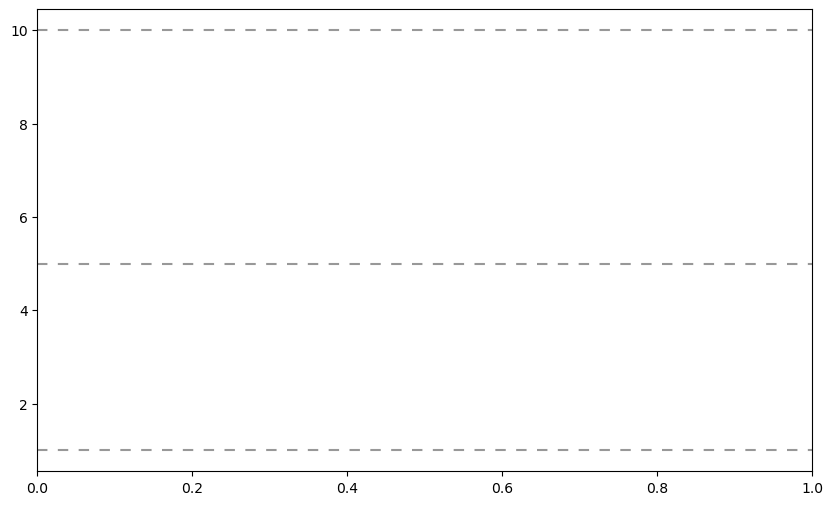

In [19]:
#для 3 групп
for i in spisok_group:
    print(i)
    box_plot_3_group(i)
    descriptive_statistics_for_mean(i)
    normal_test(i)
    test_3_value(i)
    print()
    print('====================================================================================')


Приступов_удушья_в_день


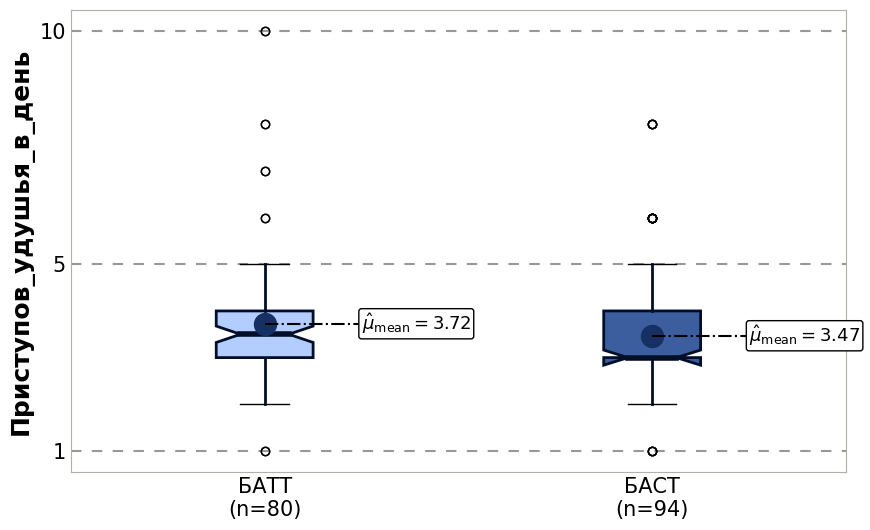

Рисунок ?. Распределение и средние значение Приступов_удушья_в_день в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,3.73,0.19,3.73±0.19,3.00,3.50,4.00,3.50 [3.00-4.00]
БАСТ,3.47,0.16,3.47±0.16,3.00,3.00,4.00,3.00 [3.00-4.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.05, p=0.294
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4150.00, p=0.223
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.26
95%Cl (разницы) = (-0.202)-(0.713)
p=0.273
Различи между группами статистически не значимые


Обострений_в_год


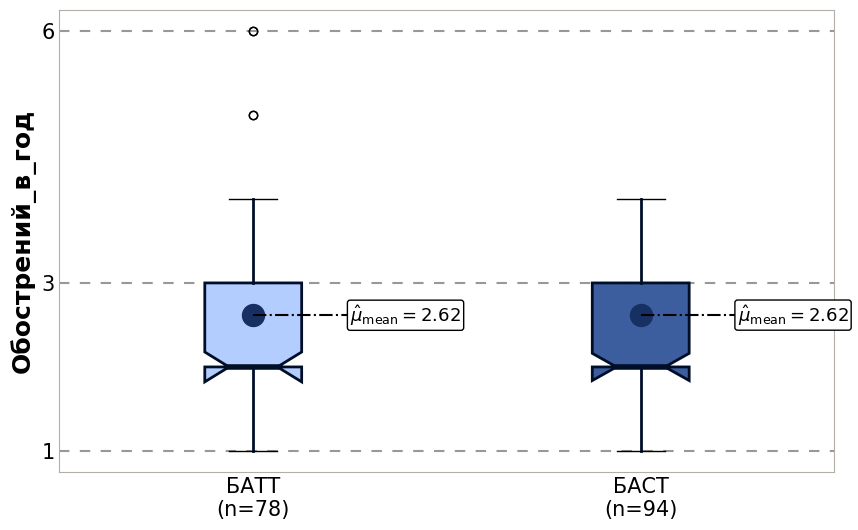

Рисунок ?. Распределение и средние значение Обострений_в_год в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,2.62,0.11,2.62±0.11,2.00,2.00,3.00,2.00 [2.00-3.00]
БАСТ,2.62,0.09,2.62±0.09,2.00,2.00,3.00,2.00 [2.00-3.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0040
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.01, p=0.991
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3568.00, p=0.747
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.00
95%Cl (разницы) = (-0.266)-(0.277)
p=0.995
Различи между группами статистически не значимые


Длительность_БА_на_момент_исслед


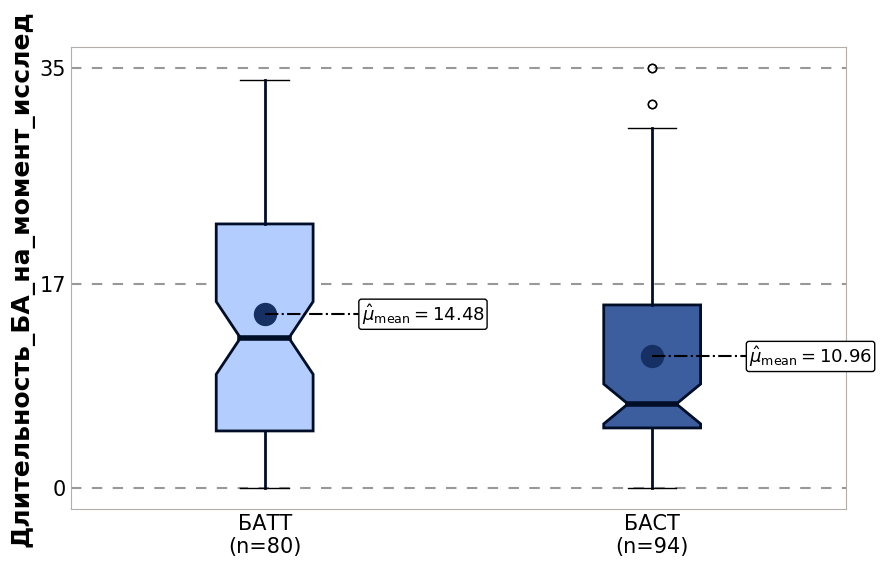

Рисунок ?. Распределение и средние значение Длительность_БА_на_момент_исслед в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,14.47,1.13,14.47±1.13,4.75,12.50,22.00,12.50 [4.75-22.00]
БАСТ,10.96,0.87,10.96±0.87,5.00,7.00,15.25,7.00 [5.00-15.25]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0001
Распределение в общей выборке отличается от нормального распределения p=0.0001

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.48, p=0.014
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4402.00, p=0.052
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.52
95%Cl (разницы) = (0.809)-(6.213)
p=0.010
Между группами есть статистически значимые различия


САД


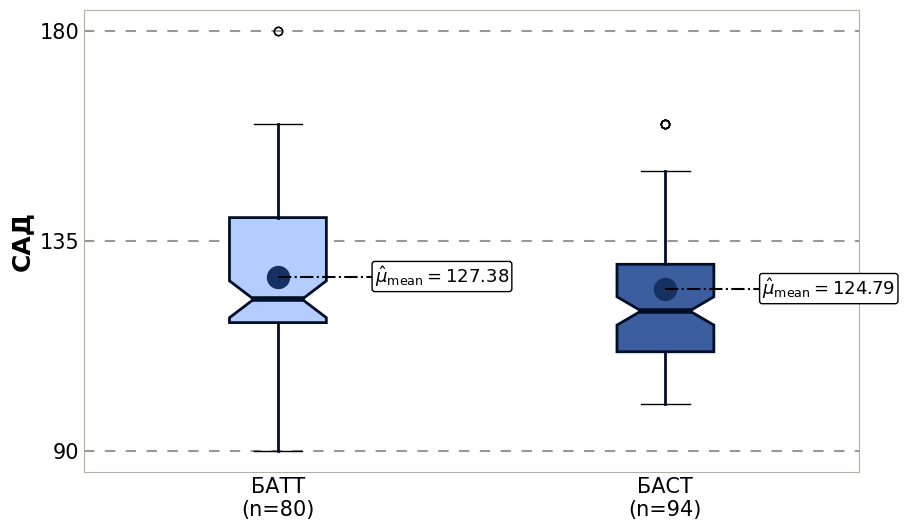

Рисунок ?. Распределение и средние значение САД в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,127.38,2.07,127.38±2.07,117.50,122.50,140.00,122.50 [117.50-140.00]
БАСТ,124.79,1.56,124.79±1.56,111.25,120.00,130.00,120.00 [111.25-130.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0181
Распределение группы БАСТ соответствует нормальному распределению p=0.1157
Распределение в общей выборке отличается от нормального распределения p=0.0007

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.01, p=0.315
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3966.00, p=0.529
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 2.59
95%Cl (разницы) = (-2.074)-(7.5)
p=0.284
Различи между группами статистически не значимые


ДАД


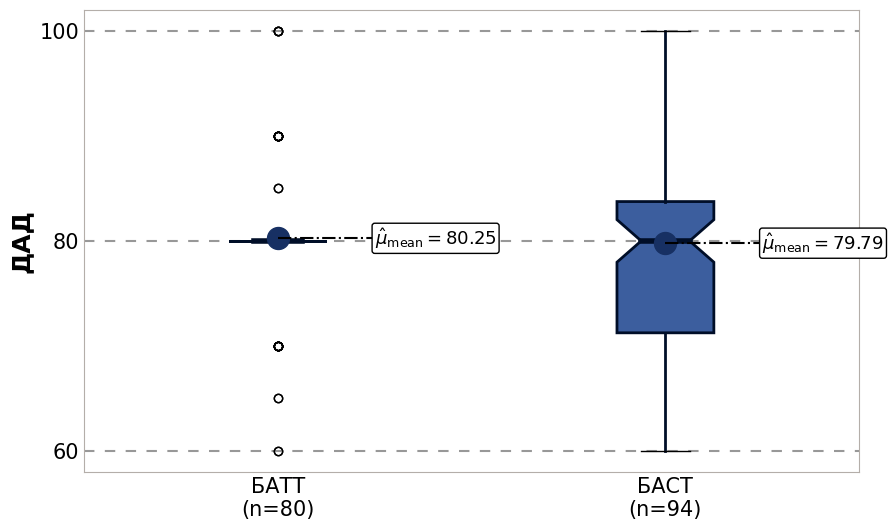

Рисунок ?. Распределение и средние значение ДАД в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,80.25,0.87,80.25±0.87,80.00,80.00,80.00,80.00 [80.00-80.00]
БАСТ,79.79,0.85,79.79±0.85,71.25,80.00,83.75,80.00 [71.25-83.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.1131
Распределение группы БАСТ соответствует нормальному распределению p=0.9812
Распределение в общей выборке соостветствует нормальному распределению p=0.4384

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=0.38, p=0.708
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3872.00, p=0.712
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.46
95%Cl (разницы) = (-1.862)-(2.766)
p=0.686
Различи между группами статистически не значимые


ЧД


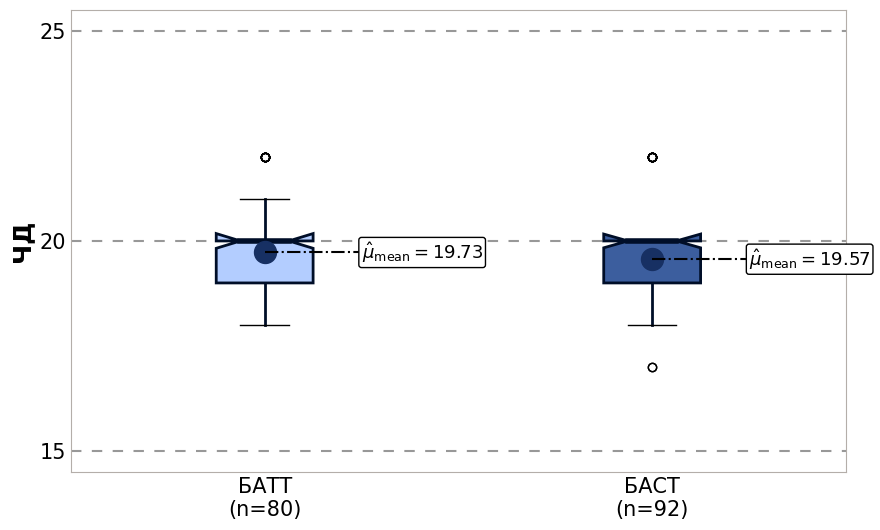

Рисунок ?. Распределение и средние значение ЧД в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,19.73,0.12,19.73±0.12,19.00,20.00,20.00,20.00 [19.00-20.00]
БАСТ,19.57,0.12,19.57±0.12,19.00,20.00,20.00,20.00 [19.00-20.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0433
Распределение группы БАСТ соответствует нормальному распределению p=0.1062
Распределение в общей выборке отличается от нормального распределения p=0.0112

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.93, p=0.353
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3926.00, p=0.425
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.16
95%Cl (разницы) = (-0.163)-(0.479)
p=0.335
Различи между группами статистически не значимые


ЧСС


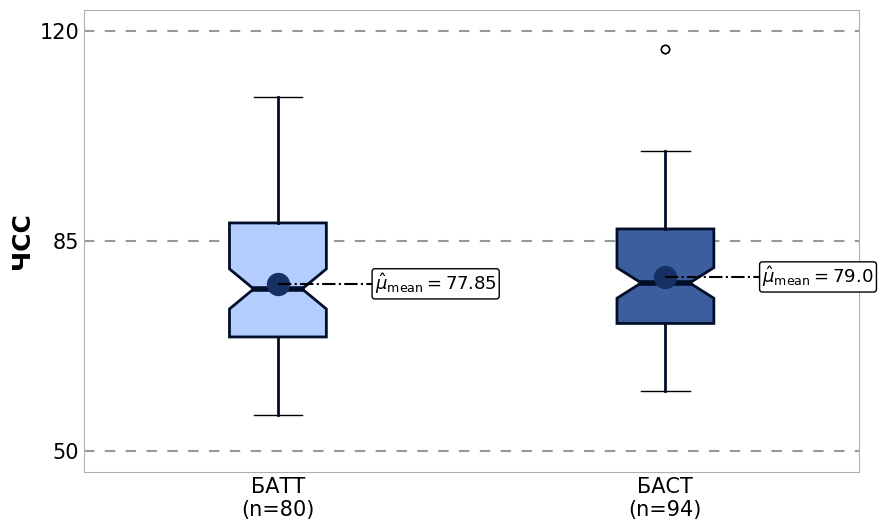

Рисунок ?. Распределение и средние значение ЧСС в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,77.85,1.34,77.85±1.34,69.00,77.00,88.00,77.00 [69.00-88.00]
БАСТ,79.00,1.18,79.00±1.18,71.25,78.00,87.00,78.00 [71.25-87.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.4826
Распределение группы БАСТ отличается от нормального распределения p=0.0011
Распределение в общей выборке отличается от нормального распределения p=0.0063

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.64, p=0.521
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3574.00, p=0.575
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.15
95%Cl (разницы) = (-4.521)-(2.149)
p=0.490
Различи между группами статистически не значимые


Пульс


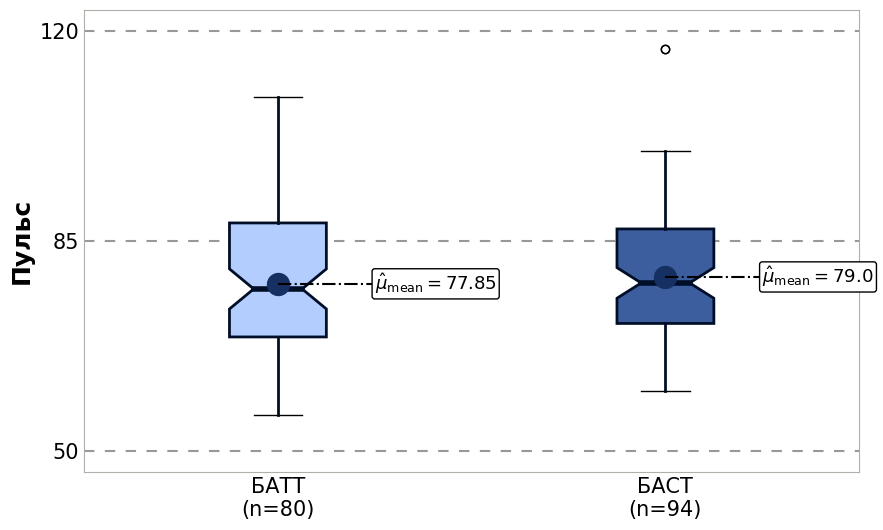

Рисунок ?. Распределение и средние значение Пульс в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,77.85,1.34,77.85±1.34,69.00,77.00,88.00,77.00 [69.00-88.00]
БАСТ,79.00,1.18,79.00±1.18,71.25,78.00,87.00,78.00 [71.25-87.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.4826
Распределение группы БАСТ отличается от нормального распределения p=0.0011
Распределение в общей выборке отличается от нормального распределения p=0.0063

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.64, p=0.521
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3574.00, p=0.575
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.15
95%Cl (разницы) = (-4.553)-(2.138)
p=0.499
Различи между группами статистически не значимые


Сатурация_при_поступлении


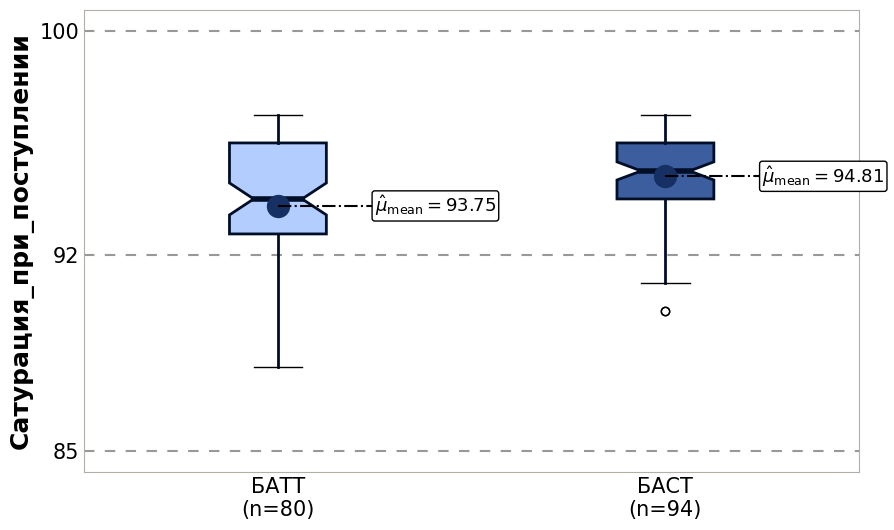

Рисунок ?. Распределение и средние значение Сатурация_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,93.75,0.27,93.75±0.27,92.75,94.00,96.00,94.00 [92.75-96.00]
БАСТ,94.81,0.20,94.81±0.20,94.00,95.00,96.00,95.00 [94.00-96.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0203
Распределение группы БАСТ отличается от нормального распределения p=0.0126
Распределение в общей выборке отличается от нормального распределения p=0.0001

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.19, p=0.002
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2814.00, p=0.004
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.06
95%Cl (разницы) = (-1.702)-(-0.436)
p=0.001
Между группами есть статистически значимые различия


Сатурация_при_выписке


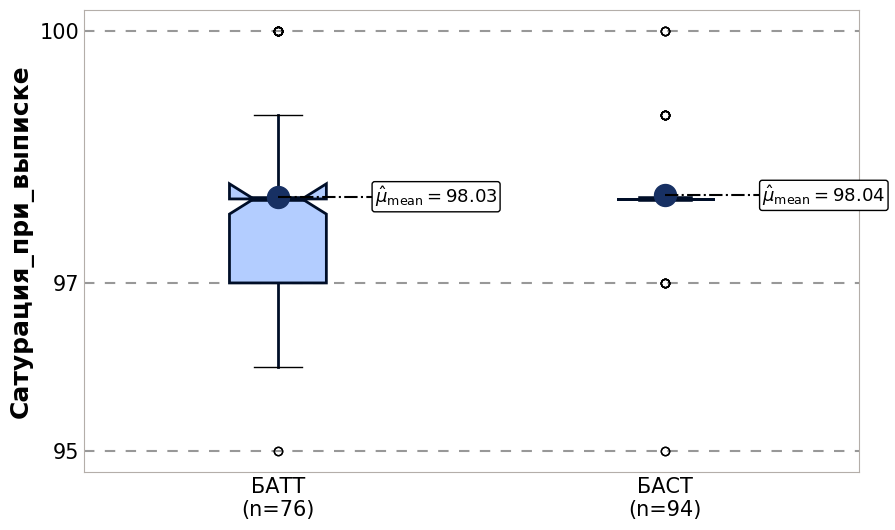

Рисунок ?. Распределение и средние значение Сатурация_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,98.03,0.13,98.03±0.13,97.00,98.00,98.00,98.00 [97.00-98.00]
БАСТ,98.04,0.07,98.04±0.07,98.00,98.00,98.00,98.00 [98.00-98.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.4941
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0006

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.11, p=0.909
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3334.00, p=0.372
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.02
95%Cl (разницы) = (-0.287)-(0.255)
p=0.898
Различи между группами статистически не значимые


Лейкоциты_при_поступлении


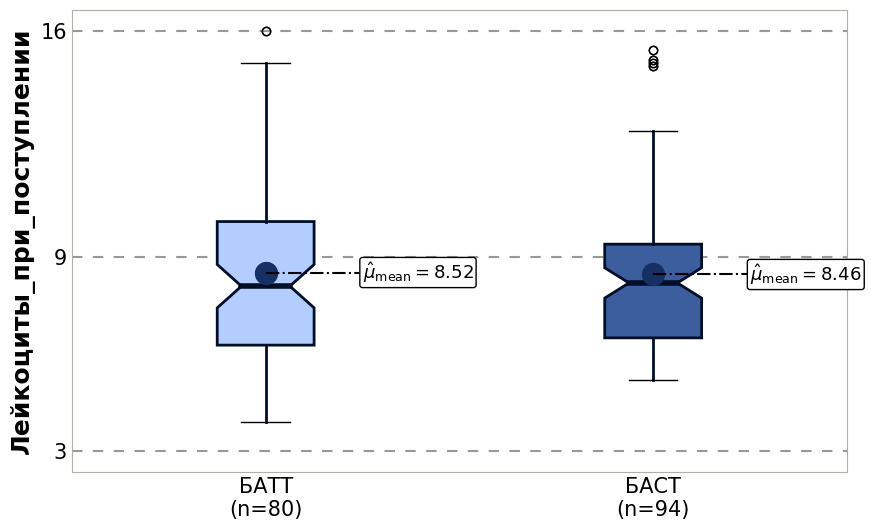

Рисунок ?. Распределение и средние значение Лейкоциты_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,8.52,0.31,8.52±0.31,6.28,8.10,10.10,8.10 [6.28-10.10]
БАСТ,8.46,0.27,8.46±0.27,6.50,8.20,9.40,8.20 [6.50-9.40]


Распределение группы БАТТ отличается от нормального распределения p=0.0121
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.15, p=0.884
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3876.00, p=0.727
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.06
95%Cl (разницы) = (-0.715)-(0.847)
p=0.882
Различи между группами статистически не значимые


Эритроциты_при_постпулении


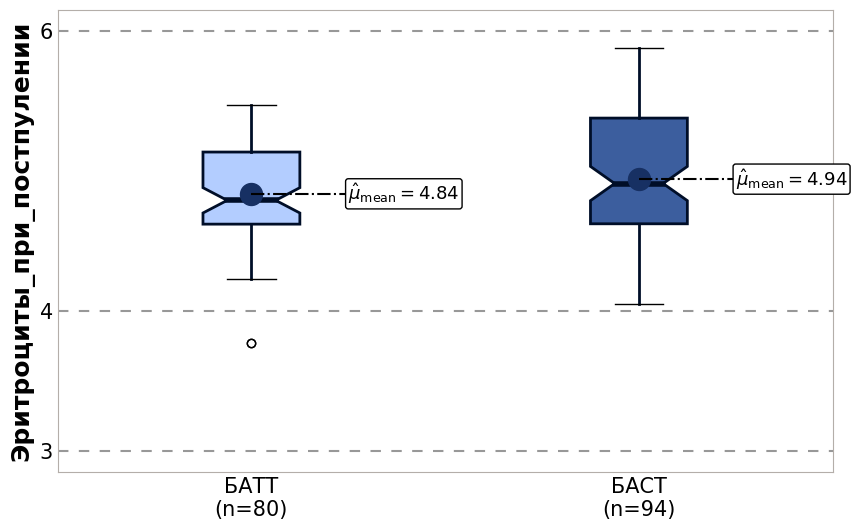

Рисунок ?. Распределение и средние значение Эритроциты_при_постпулении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,4.84,0.04,4.84±0.04,4.62,4.79,5.13,4.79 [4.62-5.13]
БАСТ,4.94,0.05,4.94±0.05,4.62,4.91,5.38,4.91 [4.62-5.38]


Распределение группы БАТТ соответствует нормальному распределению p=0.4072
Распределение группы БАСТ соответствует нормальному распределению p=0.0886
Распределение в общей выборке соостветствует нормальному распределению p=0.5817

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.57, p=0.118
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3346.00, p=0.212
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.10
95%Cl (разницы) = (-0.23)-(0.02)
p=0.101
Различи между группами статистически не значимые


Гемоглобин_при_поступлении


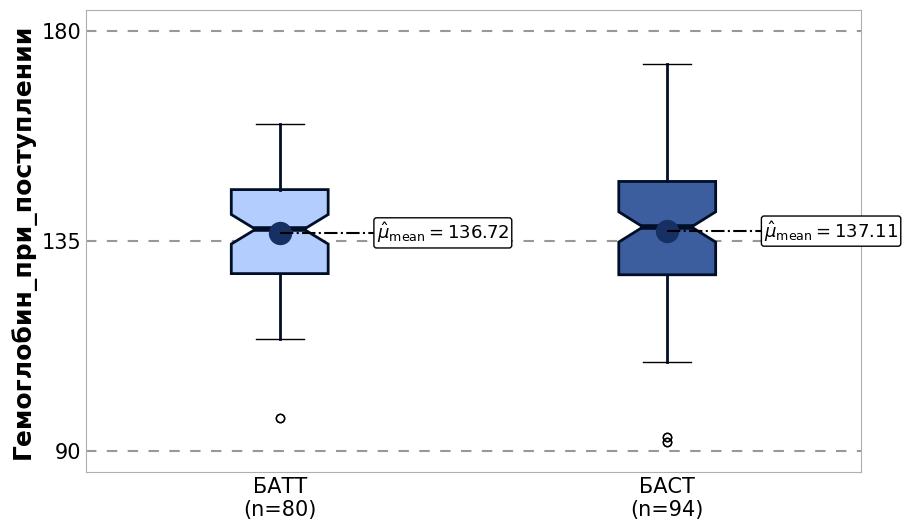

Рисунок ?. Распределение и средние значение Гемоглобин_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,136.72,1.37,136.72±1.37,128.00,137.50,146.00,137.50 [128.00-146.00]
БАСТ,137.11,1.69,137.11±1.69,127.75,138.00,147.75,138.00 [127.75-147.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0073
Распределение группы БАСТ отличается от нормального распределения p=0.0180
Распределение в общей выборке отличается от нормального распределения p=0.0003

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.17, p=0.865
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3618.00, p=0.669
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.38
95%Cl (разницы) = (-4.585)-(3.798)
p=0.858
Различи между группами статистически не значимые


Тромбоциты_при_поступлении


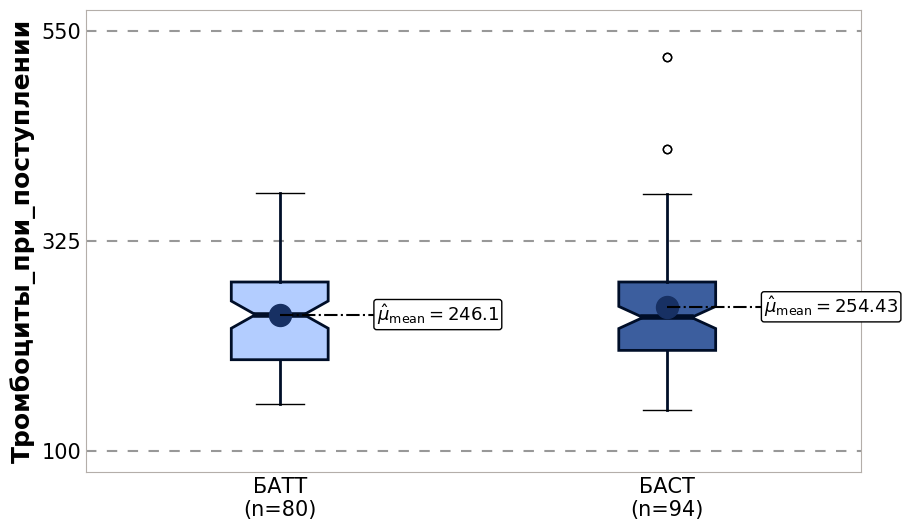

Рисунок ?. Распределение и средние значение Тромбоциты_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,246.10,6.47,246.10±6.47,197.75,246.00,281.00,246.00 [197.75-281.00]
БАСТ,254.43,7.31,254.43±7.31,207.75,243.00,281.00,243.00 [207.75-281.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.2607
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.83, p=0.405
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3668.00, p=0.782
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -8.33
95%Cl (разницы) = (-27.298)-(9.703)
p=0.373
Различи между группами статистически не значимые


Сегментоядерные_при_поступлении


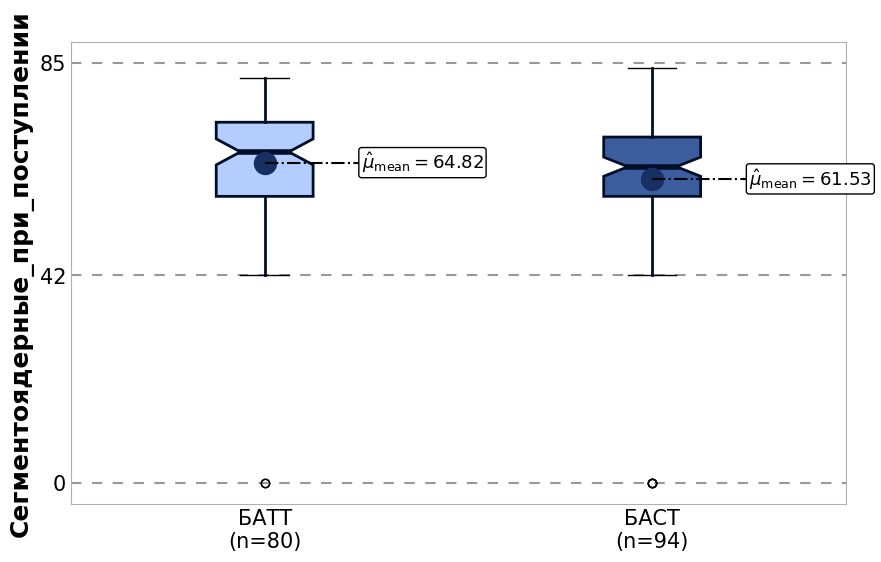

Рисунок ?. Распределение и средние значение Сегментоядерные_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,64.83,1.58,64.83±1.58,58.00,67.00,73.00,67.00 [58.00-73.00]
БАСТ,61.53,1.64,61.53±1.64,58.00,64.00,70.00,64.00 [58.00-70.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.42, p=0.156
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4274.00, p=0.120
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.29
95%Cl (разницы) = (-0.968)-(7.596)
p=0.131
Различи между группами статистически не значимые


Эозинофилы_при_поступлении


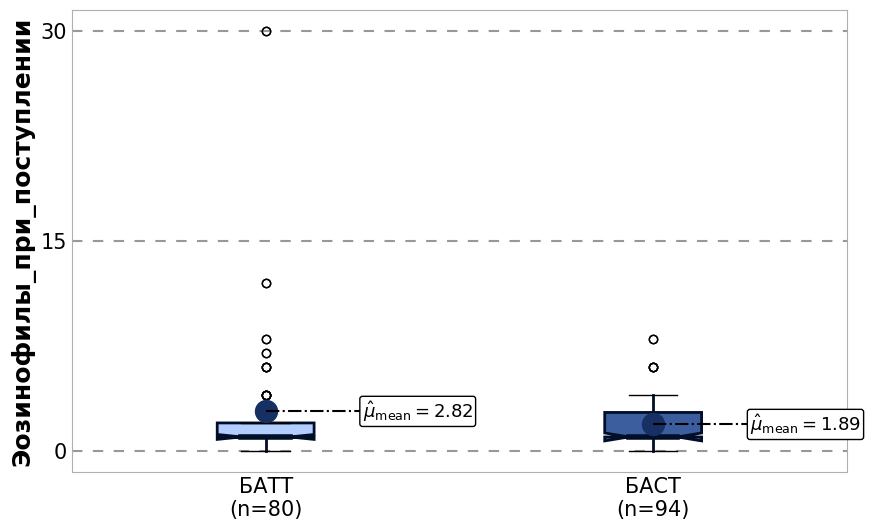

Рисунок ?. Распределение и средние значение Эозинофилы_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,2.83,0.56,2.83±0.56,1.00,1.00,2.00,1.00 [1.00-2.00]
БАСТ,1.89,0.19,1.89±0.19,1.00,1.00,2.75,1.00 [1.00-2.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.67, p=0.097
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3860.00, p=0.752
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.93
95%Cl (разницы) = (-0.032)-(2.074)
p=0.086
Различи между группами статистически не значимые


Моноциты_при_поступлении


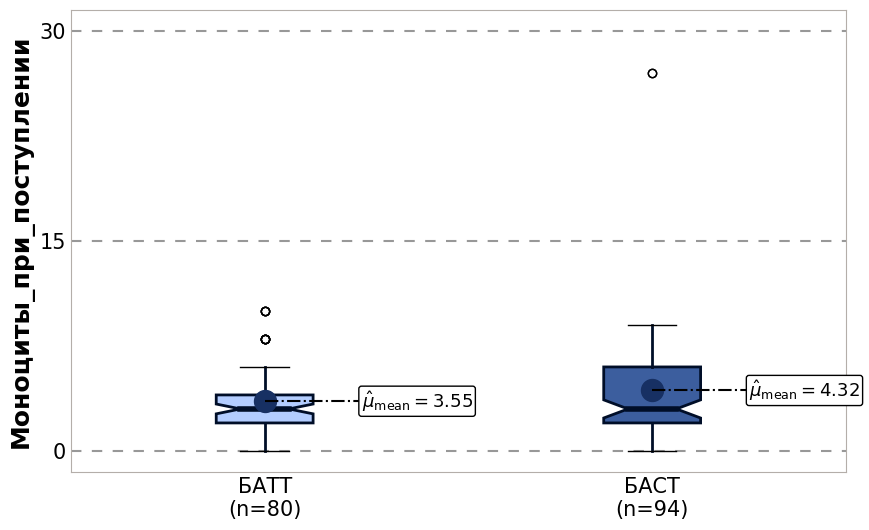

Рисунок ?. Распределение и средние значение Моноциты_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,3.55,0.28,3.55±0.28,2.00,3.00,4.00,3.00 [2.00-4.00]
БАСТ,4.32,0.43,4.32±0.43,2.00,3.00,6.00,3.00 [2.00-6.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0031
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-1.44, p=0.153
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3386.00, p=0.249
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.77
95%Cl (разницы) = (-1.777)-(0.17)
p=0.123
Различи между группами статистически не значимые


Лимфоциты_при_поступлении


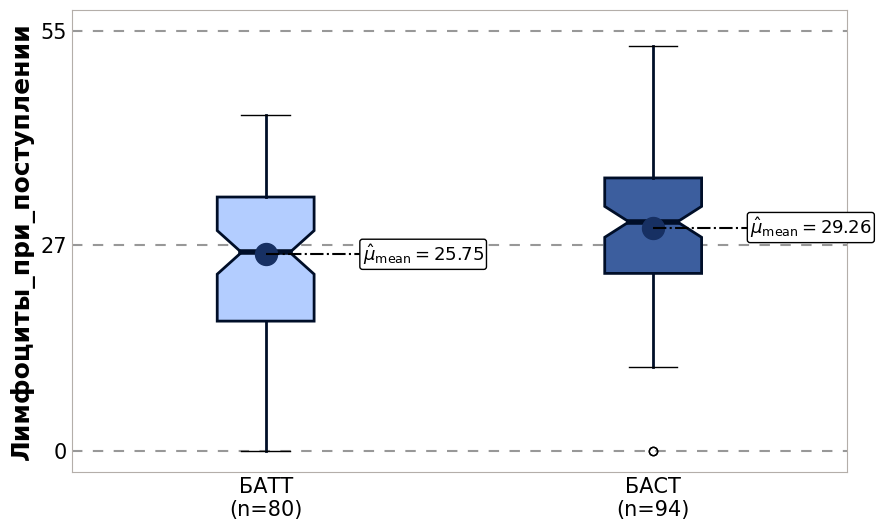

Рисунок ?. Распределение и средние значение Лимфоциты_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,25.75,1.13,25.75±1.13,17.00,26.00,33.25,26.00 [17.00-33.25]
БАСТ,29.26,1.08,29.26±1.08,23.25,30.00,35.75,30.00 [23.25-35.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.7258
Распределение группы БАСТ соответствует нормальному распределению p=0.2992
Распределение в общей выборке соостветствует нормальному распределению p=0.3907

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-2.22, p=0.027
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2992.00, p=0.020
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -3.51
95%Cl (разницы) = (-6.468)-(-0.585)
p=0.019
Между группами есть статистически значимые различия


СОЭ_при_поступлении


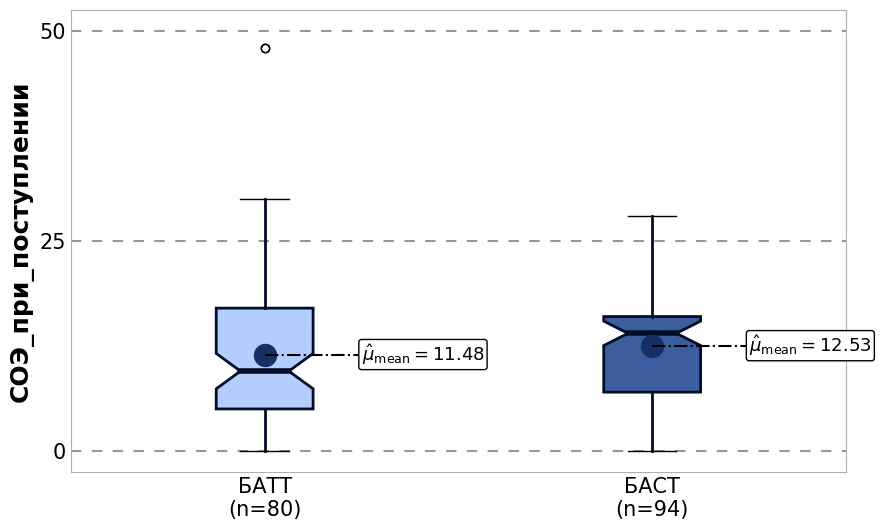

Рисунок ?. Распределение и средние значение СОЭ_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,11.47,1.05,11.47±1.05,5.00,9.50,17.00,9.50 [5.00-17.00]
БАСТ,12.53,0.68,12.53±0.68,7.00,14.00,16.00,14.00 [7.00-16.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ соответствует нормальному распределению p=0.3876
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.87, p=0.387
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3184.00, p=0.082
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.06
95%Cl (разницы) = (-3.298)-(1.309)
p=0.363
Различи между группами статистически не значимые


Лейкоциты_при_выписке


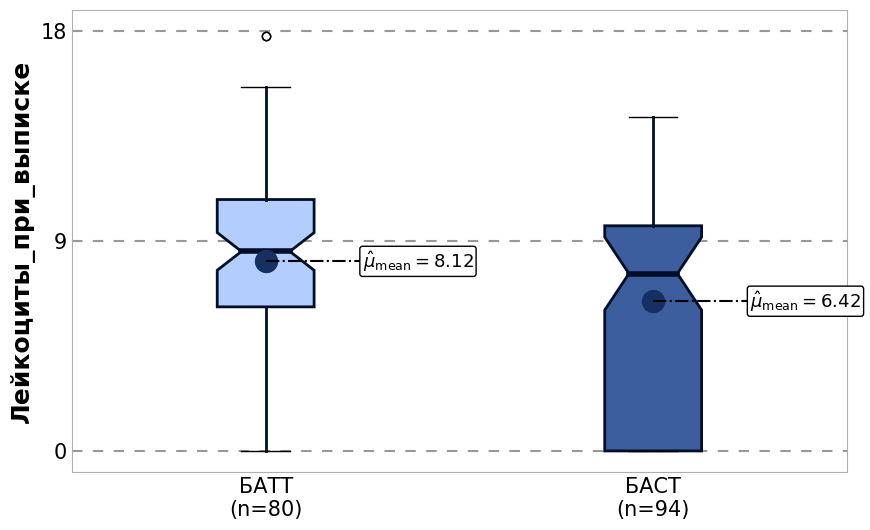

Рисунок ?. Распределение и средние значение Лейкоциты_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,8.12,0.49,8.12±0.49,6.17,8.55,10.78,8.55 [6.17-10.78]
БАСТ,6.42,0.48,6.42±0.48,0.00,7.60,9.65,7.60 [0.00-9.65]


Распределение группы БАТТ соответствует нормальному распределению p=0.4723
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0061

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.47, p=0.014
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4382.00, p=0.059
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.71
95%Cl (разницы) = (0.428)-(3.007)
p=0.010
Между группами есть статистически значимые различия


Эритроциты_при_выписке


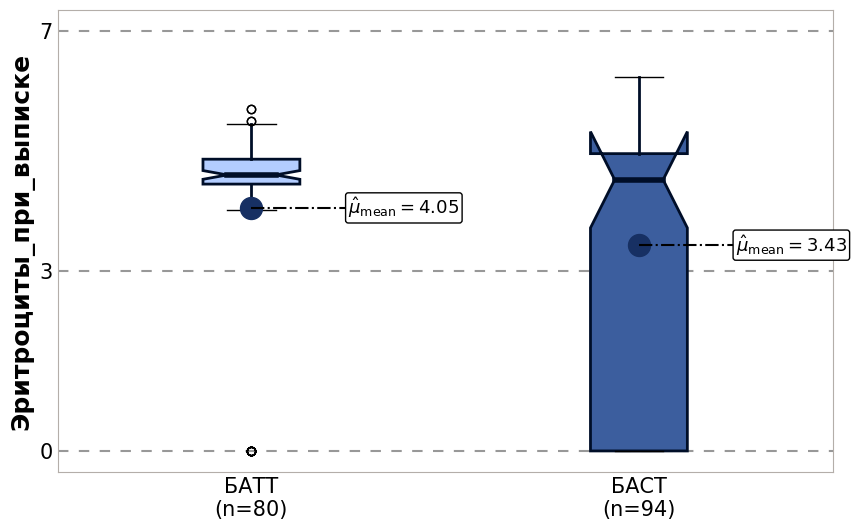

Рисунок ?. Распределение и средние значение Эритроциты_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,4.05,0.19,4.05±0.19,4.45,4.60,4.86,4.60 [4.45-4.86]
БАСТ,3.43,0.23,3.43±0.23,0.00,4.52,4.96,4.52 [0.00-4.96]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.98, p=0.049
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4080.00, p=0.332
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.62
95%Cl (разницы) = (0.053)-(1.199)
p=0.034
Между группами есть статистически значимые различия


Гемоглобин_при_выписке


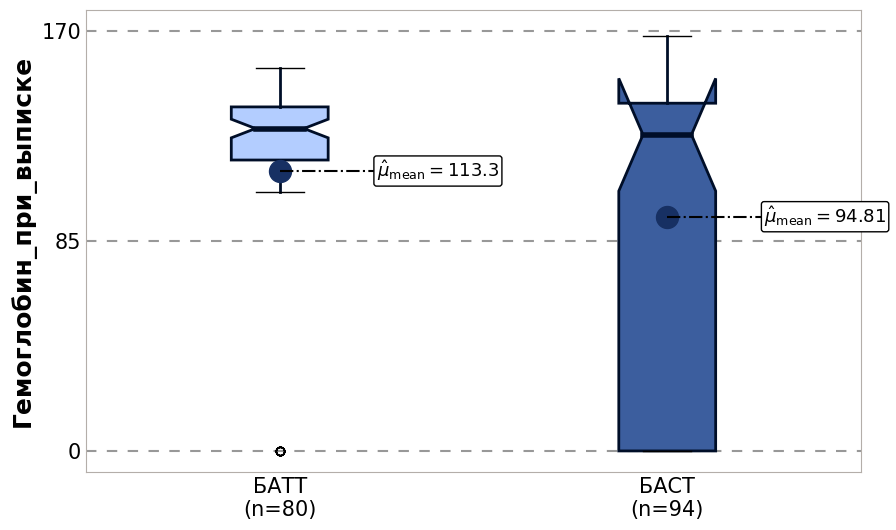

Рисунок ?. Распределение и средние значение Гемоглобин_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,113.30,5.46,113.30±5.46,117.75,130.50,139.25,130.50 [117.75-139.25]
БАСТ,94.81,6.54,94.81±6.54,0.00,128.00,140.75,128.00 [0.00-140.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.11, p=0.036
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4154.00, p=0.232
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 18.49
95%Cl (разницы) = (2.234)-(34.83)
p=0.025
Между группами есть статистически значимые различия


Тромбоциты_при_выписке


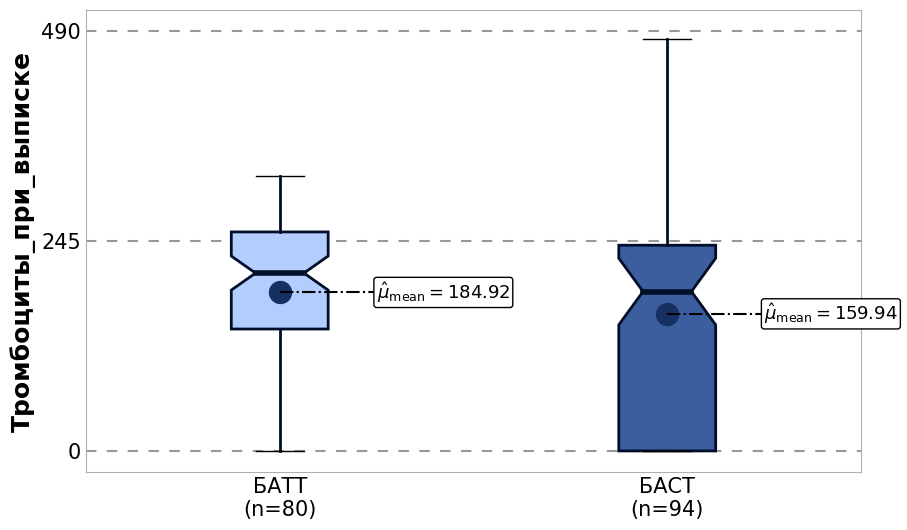

Рисунок ?. Распределение и средние значение Тромбоциты_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,184.93,10.88,184.93±10.88,142.25,207.50,255.50,207.50 [142.25-255.50]
БАСТ,159.94,12.36,159.94±12.36,0.00,186.00,240.00,186.00 [0.00-240.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0090
Распределение группы БАСТ соответствует нормальному распределению p=0.5675
Распределение в общей выборке соостветствует нормальному распределению p=0.0722

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=1.48, p=0.140
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4318.00, p=0.090
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 24.99
95%Cl (разницы) = (-5.755)-(55.937)
p=0.117
Различи между группами статистически не значимые


Сегментоядерные_при_выписке


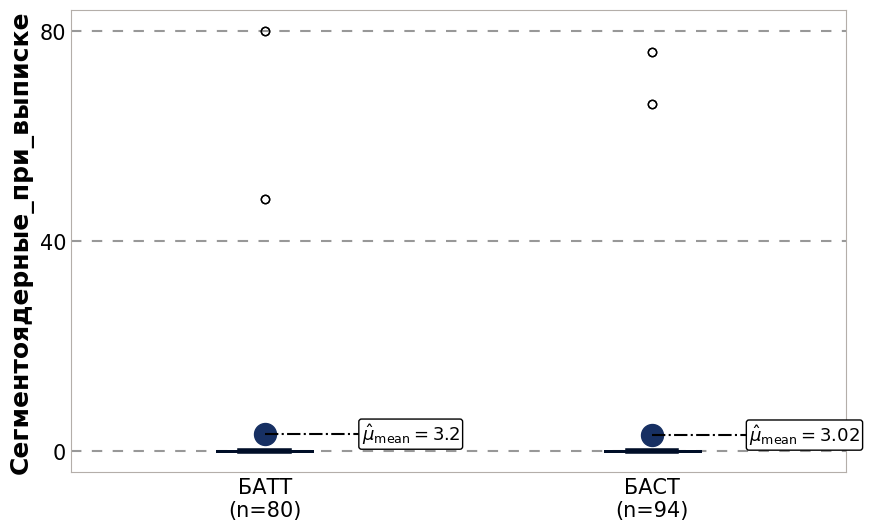

Рисунок ?. Распределение и средние значение Сегментоядерные_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,3.20,1.61,3.20±1.61,0.00,0.00,0.00,0.00 [0.00-0.00]
БАСТ,3.02,1.48,3.02±1.48,0.00,0.00,0.00,0.00 [0.00-0.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.08, p=0.935
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3788.00, p=0.819
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.18
95%Cl (разницы) = (-3.979)-(4.235)
p=0.944
Различи между группами статистически не значимые


Лимфоциты_при_выписке


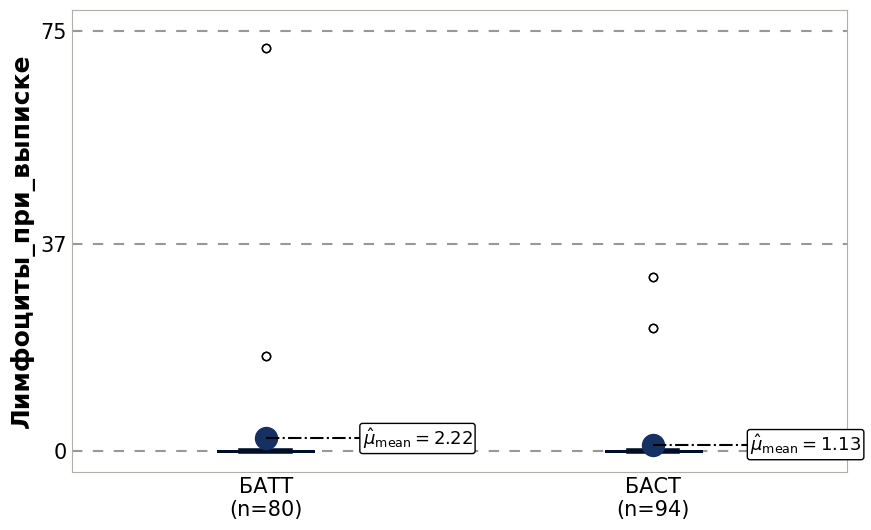

Рисунок ?. Распределение и средние значение Лимфоциты_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,2.23,1.28,2.23±1.28,0.00,0.00,0.00,0.00 [0.00-0.00]
БАСТ,1.13,0.56,1.13±0.56,0.00,0.00,0.00,0.00 [0.00-0.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.82, p=0.413
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3788.00, p=0.819
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.10
95%Cl (разницы) = (-1.223)-(3.83)
p=0.403
Различи между группами статистически не значимые


СОЭ_при_выписке


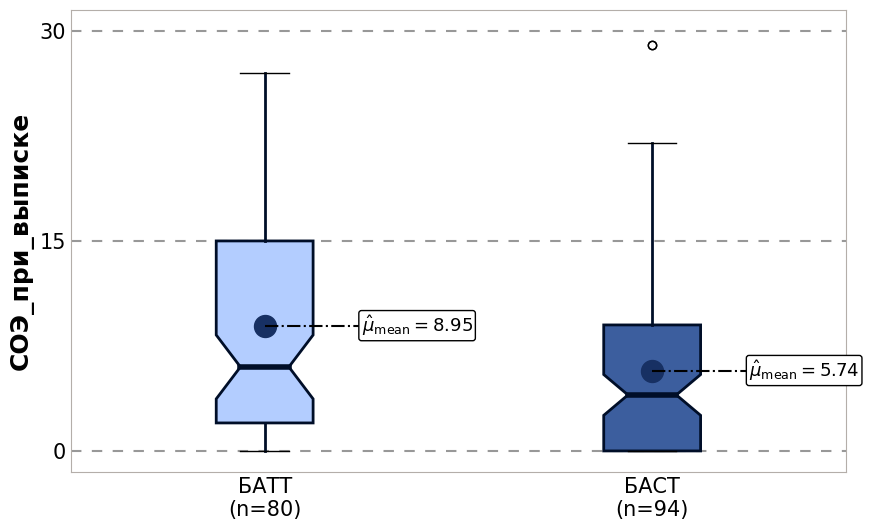

Рисунок ?. Распределение и средние значение СОЭ_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,8.95,0.89,8.95±0.89,2.00,6.00,15.00,6.00 [2.00-15.00]
БАСТ,5.74,0.65,5.74±0.65,0.00,4.00,9.00,4.00 [0.00-9.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0033
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.94, p=0.004
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4634.00, p=0.008
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.21
95%Cl (разницы) = (1.138)-(5.255)
p=0.002
Между группами есть статистически значимые различия


БАК_посев_мокроты


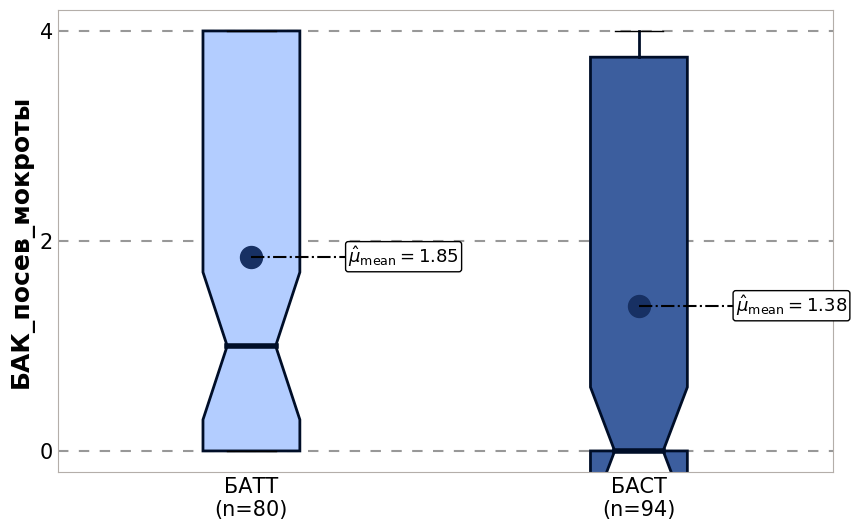

Рисунок ?. Распределение и средние значение БАК_посев_мокроты в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,1.85,0.19,1.85±0.19,0.00,1.00,4.00,1.00 [0.00-4.00]
БАСТ,1.38,0.18,1.38±0.18,0.00,0.00,3.75,0.00 [0.00-3.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.80, p=0.074
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4470.00, p=0.024
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.47
95%Cl (разницы) = (-0.021)-(0.936)
p=0.058
Различи между группами статистически не значимые


IgE_общий


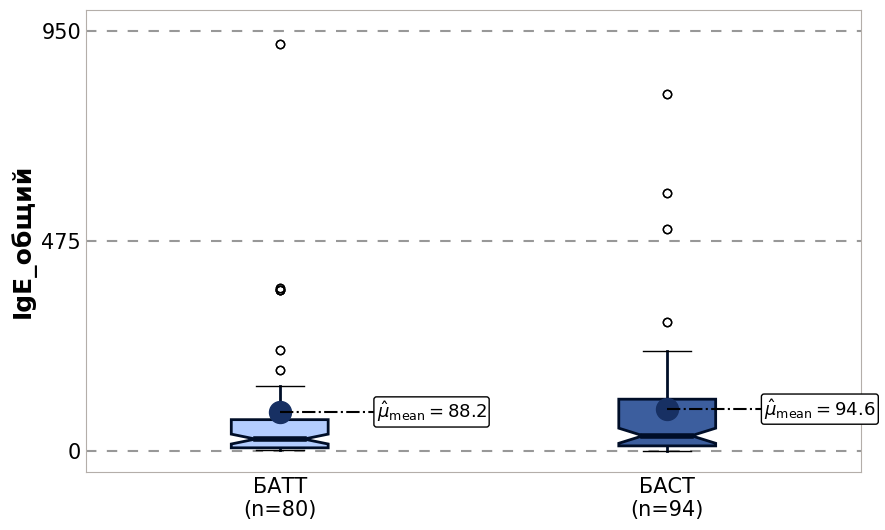

Рисунок ?. Распределение и средние значение IgE_общий в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,88.20,18.53,88.20±18.53,7.05,26.86,70.76,26.86 [7.05-70.76]
БАСТ,94.60,16.27,94.60±16.27,11.44,34.40,117.06,34.40 [11.44-117.06]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.26, p=0.796
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3460.00, p=0.366
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -6.39
95%Cl (разницы) = (-52.395)-(40.756)
p=0.780
Различи между группами статистически не значимые


FeF25_при_поступлении


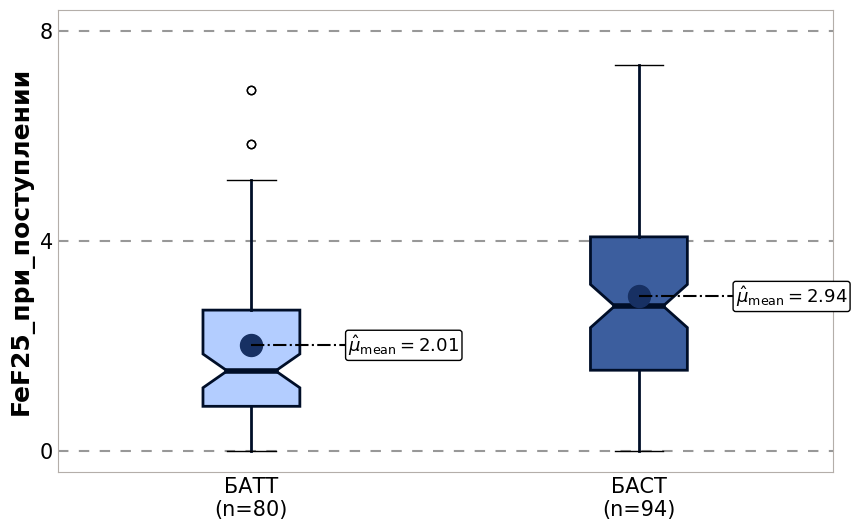

Рисунок ?. Распределение и средние значение FeF25_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,2.01,0.18,2.01±0.18,0.85,1.52,2.68,1.52 [0.85-2.68]
БАСТ,2.94,0.19,2.94±0.19,1.54,2.76,4.08,2.76 [1.54-4.08]


Распределение группы БАТТ отличается от нормального распределения p=0.0001
Распределение группы БАСТ отличается от нормального распределения p=0.0409
Распределение в общей выборке отличается от нормального распределения p=0.0004

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.52, p=0.001
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2512.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.93
95%Cl (разницы) = (-1.427)-(-0.442)
p=0.000
Между группами есть статистически значимые различия


FeF50_при_поступлении


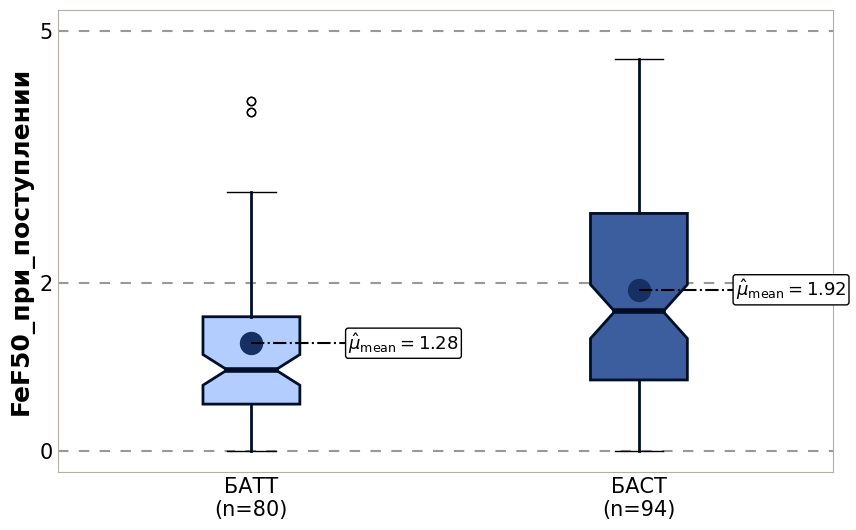

Рисунок ?. Распределение и средние значение FeF50_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,1.28,0.11,1.28±0.11,0.56,0.97,1.60,0.97 [0.56-1.60]
БАСТ,1.92,0.13,1.92±0.13,0.84,1.66,2.83,1.66 [0.84-2.83]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0053
Распределение в общей выборке отличается от нормального распределения p=0.0002

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.68, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2576.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.64
95%Cl (разницы) = (-0.953)-(-0.324)
p=0.000
Между группами есть статистически значимые различия


FeF75_при_поступлении


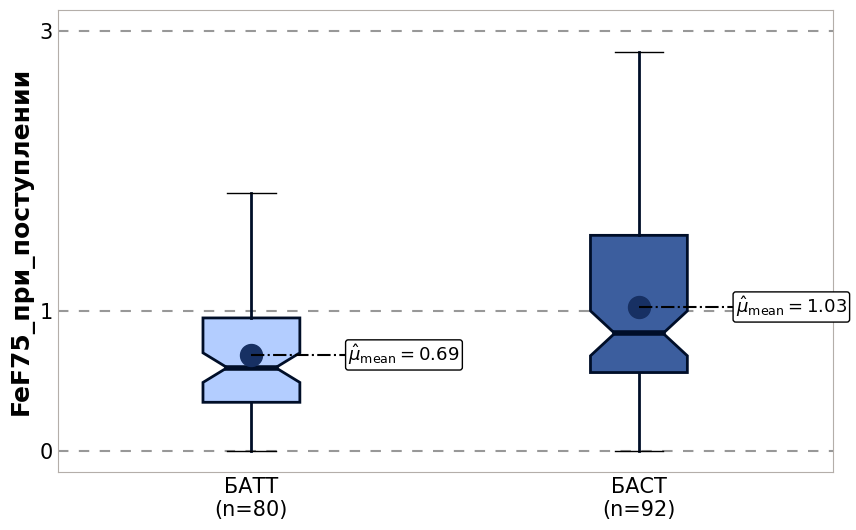

Рисунок ?. Распределение и средние значение FeF75_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.69,0.05,0.69±0.05,0.35,0.59,0.95,0.59 [0.35-0.95]
БАСТ,1.03,0.07,1.03±0.07,0.56,0.84,1.54,0.84 [0.56-1.54]


Распределение группы БАТТ отличается от нормального распределения p=0.0200
Распределение группы БАСТ отличается от нормального распределения p=0.0123
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.80, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2528.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.34
95%Cl (разницы) = (-0.51)-(-0.18)
p=0.000
Между группами есть статистически значимые различия


FeF25_при_выписке


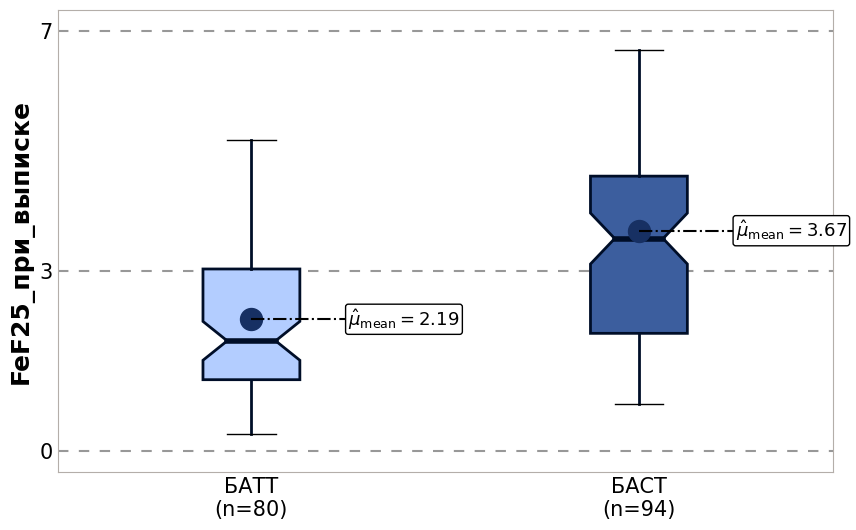

Рисунок ?. Распределение и средние значение FeF25_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,2.19,0.15,2.19±0.15,1.19,1.83,3.03,1.83 [1.19-3.03]
БАСТ,3.67,0.19,3.67±0.19,1.96,3.54,4.58,3.54 [1.96-4.58]


Распределение группы БАТТ отличается от нормального распределения p=0.0157
Распределение группы БАСТ отличается от нормального распределения p=0.0001
Распределение в общей выборке отличается от нормального распределения p=0.0004

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-5.93, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=1998.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.48
95%Cl (разницы) = (-1.934)-(-1.012)
p=0.000
Между группами есть статистически значимые различия


FeF50_при_выписке


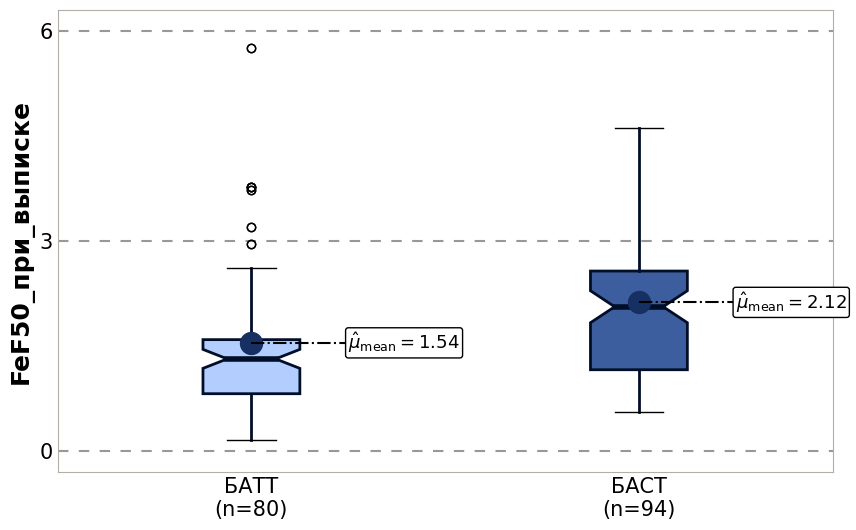

Рисунок ?. Распределение и средние значение FeF50_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,1.54,0.13,1.54±0.13,0.82,1.31,1.59,1.31 [0.82-1.59]
БАСТ,2.12,0.11,2.12±0.11,1.16,2.06,2.57,2.06 [1.16-2.57]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ соответствует нормальному распределению p=0.1144
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.51, p=0.001
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2416.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.58
95%Cl (разницы) = (-0.888)-(-0.263)
p=0.000
Между группами есть статистически значимые различия


FeF75_при_выписке


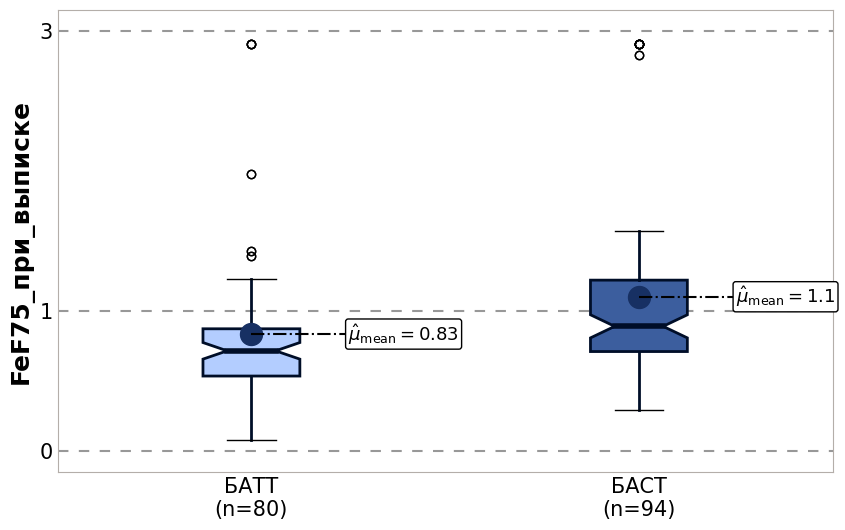

Рисунок ?. Распределение и средние значение FeF75_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.83,0.07,0.83±0.07,0.54,0.71,0.87,0.71 [0.54-0.87]
БАСТ,1.10,0.07,1.10±0.07,0.71,0.89,1.22,0.89 [0.71-1.22]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.72, p=0.007
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2476.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.27
95%Cl (разницы) = (-0.454)-(-0.088)
p=0.004
Между группами есть статистически значимые различия


ЧСС_ЭКГ


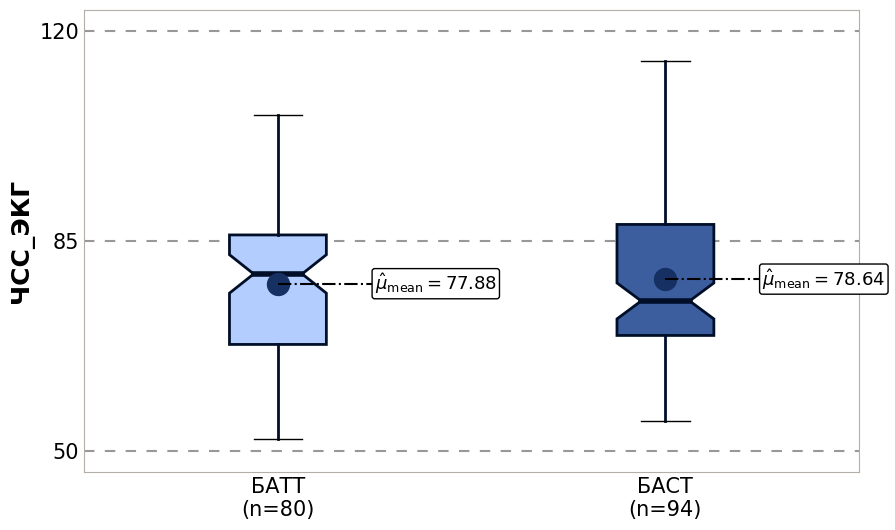

Рисунок ?. Распределение и средние значение ЧСС_ЭКГ в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,77.88,1.39,77.88±1.39,67.75,79.50,86.00,79.50 [67.75-86.00]
БАСТ,78.64,1.45,78.64±1.45,69.25,75.00,87.75,75.00 [69.25-87.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.6446
Распределение группы БАСТ отличается от нормального распределения p=0.0032
Распределение в общей выборке отличается от нормального распределения p=0.0118

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.37, p=0.709
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3826.00, p=0.843
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.76
95%Cl (разницы) = (-4.532)-(3.075)
p=0.700
Различи между группами статистически не значимые


Общий_билирубин


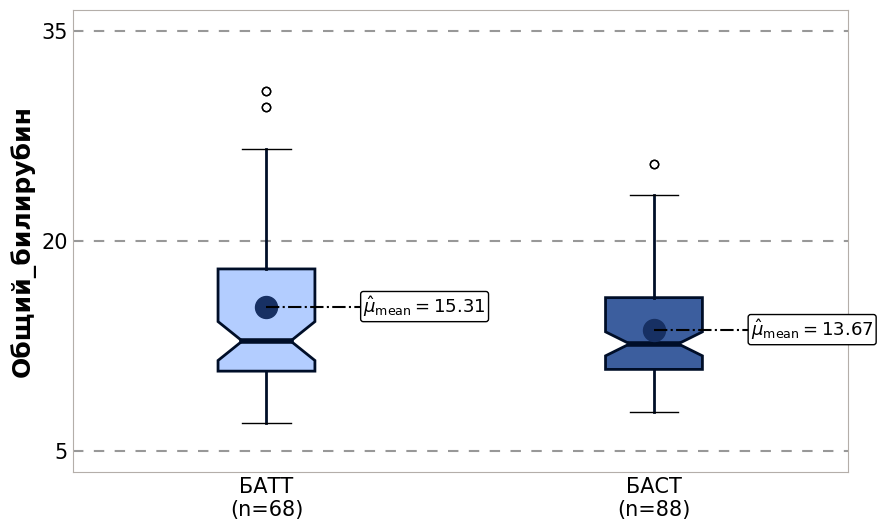

Рисунок ?. Распределение и средние значение Общий_билирубин в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,15.31,0.73,15.31±0.73,10.70,12.85,18.00,12.85 [10.70-18.00]
БАСТ,13.67,0.42,13.67±0.42,10.82,12.65,15.95,12.65 [10.82-15.95]


Распределение группы БАТТ отличается от нормального распределения p=0.0038
Распределение группы БАСТ отличается от нормального распределения p=0.0016
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.04, p=0.043
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3290.00, p=0.288
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.65
95%Cl (разницы) = (0.151)-(3.213)
p=0.032
Между группами есть статистически значимые различия


Глюкоза_крови


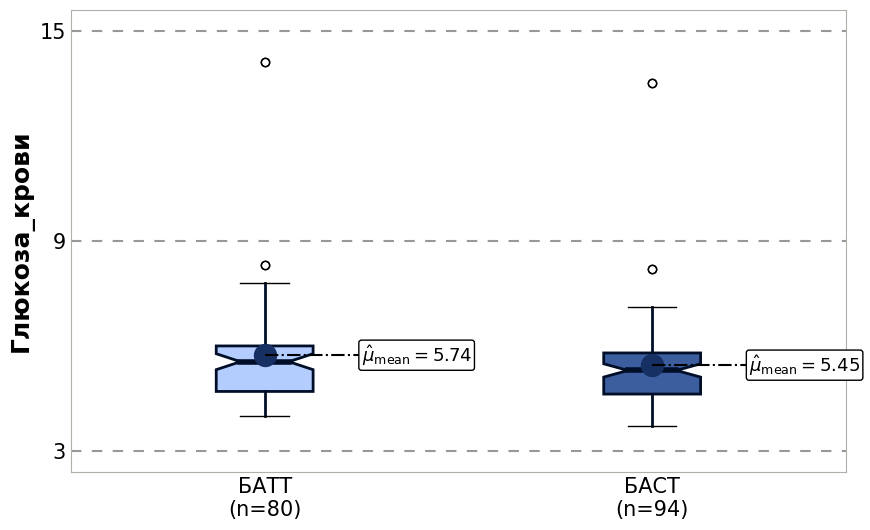

Рисунок ?. Распределение и средние значение Глюкоза_крови в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,5.74,0.18,5.74±0.18,4.70,5.55,6.00,5.55 [4.70-6.00]
БАСТ,5.45,0.15,5.45±0.15,4.62,5.30,5.80,5.30 [4.62-5.80]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.20, p=0.233
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4350.00, p=0.075
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.28
95%Cl (разницы) = (-0.154)-(0.746)
p=0.217
Различи между группами статистически не значимые


Общий_белок


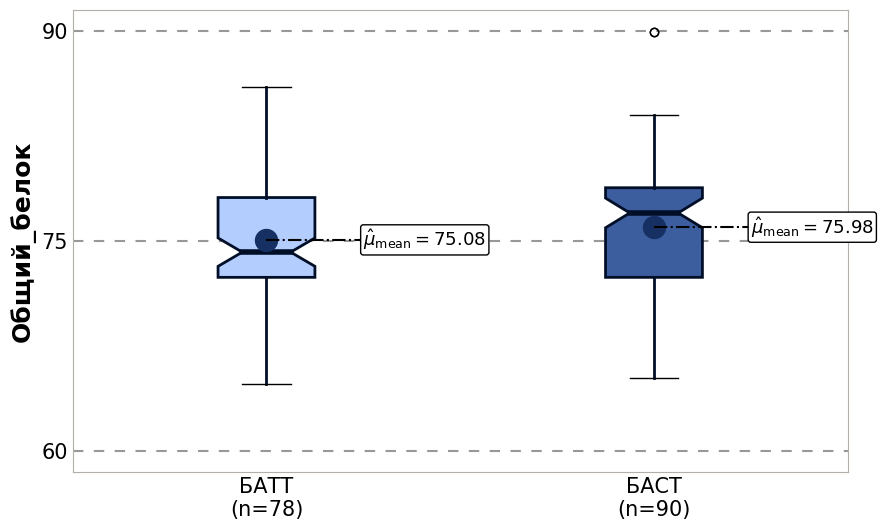

Рисунок ?. Распределение и средние значение Общий_белок в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,75.08,0.56,75.08±0.56,72.40,74.20,78.10,74.20 [72.40-78.10]
БАСТ,75.98,0.50,75.98±0.50,72.40,77.00,78.80,77.00 [72.40-78.80]


Распределение группы БАТТ соответствует нормальному распределению p=0.4203
Распределение группы БАСТ соответствует нормальному распределению p=0.4655
Распределение в общей выборке соостветствует нормальному распределению p=0.5928

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.21, p=0.229
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3038.00, p=0.132
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.91
95%Cl (разницы) = (-2.344)-(0.524)
p=0.213
Различи между группами статистически не значимые


Холестерин


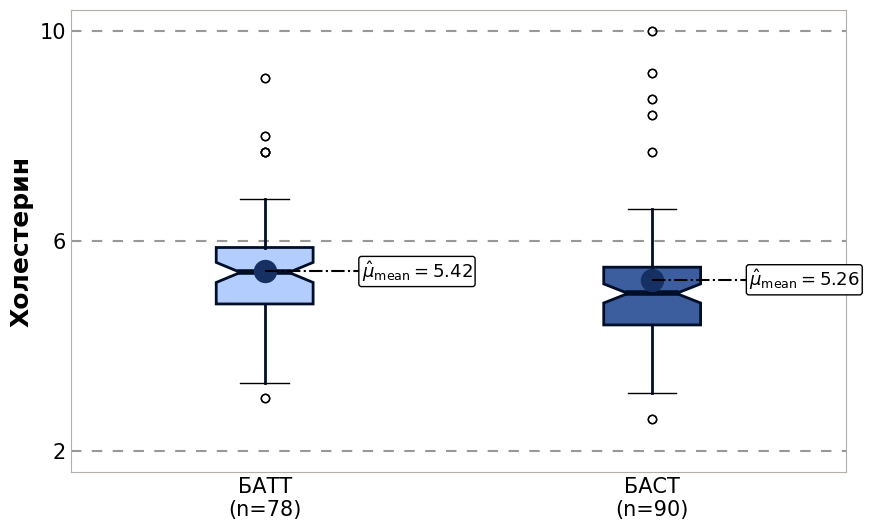

Рисунок ?. Распределение и средние значение Холестерин в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,5.42,0.14,5.42±0.14,4.80,5.40,5.88,5.40 [4.80-5.88]
БАСТ,5.26,0.16,5.26±0.16,4.40,5.00,5.50,5.00 [4.40-5.50]


Распределение группы БАТТ отличается от нормального распределения p=0.0079
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.72, p=0.475
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4006.00, p=0.115
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.16
95%Cl (разницы) = (-0.262)-(0.568)
p=0.454
Различи между группами статистически не значимые


Возраст2


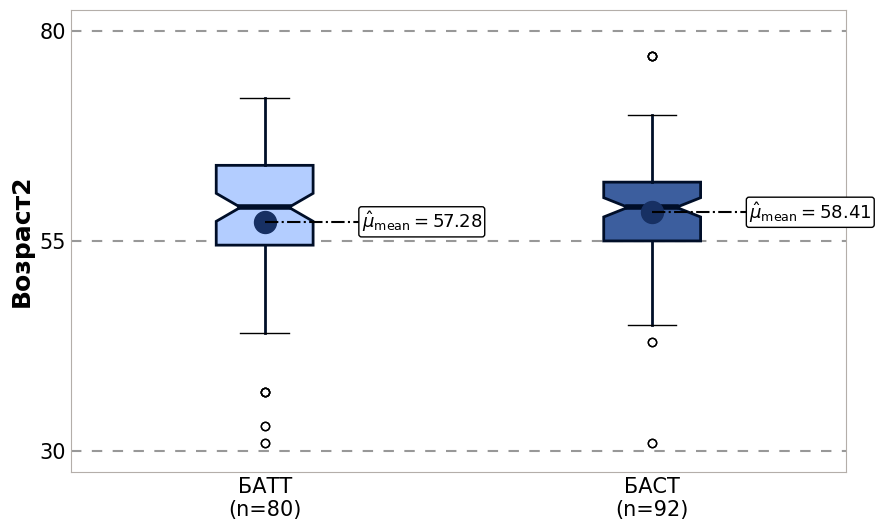

Рисунок ?. Распределение и средние значение Возраст2 в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,57.27,1.13,57.27±1.13,54.50,59.00,64.00,59.00 [54.50-64.00]
БАСТ,58.41,0.90,58.41±0.90,55.00,59.00,62.00,59.00 [55.00-62.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0019
Распределение группы БАСТ отличается от нормального распределения p=0.0368
Распределение в общей выборке отличается от нормального распределения p=0.0001

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.79, p=0.430
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3684.00, p=0.991
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.14
95%Cl (разницы) = (-3.859)-(1.5)
p=0.403
Различи между группами статистически не значимые


Рост


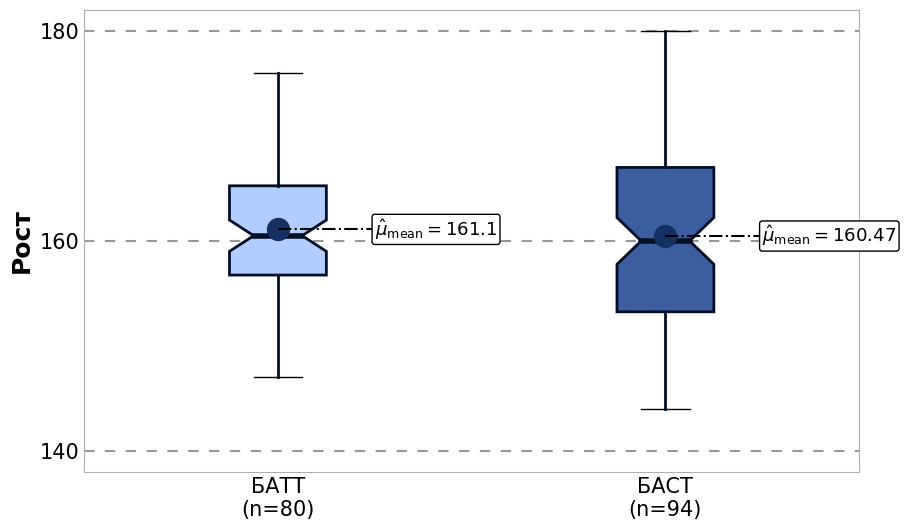

Рисунок ?. Распределение и средние значение Рост в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,161.10,0.76,161.10±0.76,156.75,160.50,165.25,160.50 [156.75-165.25]
БАСТ,160.47,0.94,160.47±0.94,153.25,160.00,167.00,160.00 [153.25-167.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.7976
Распределение группы БАСТ отличается от нормального распределения p=0.0471
Распределение в общей выборке соостветствует нормальному распределению p=0.0986

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=0.51, p=0.612
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4046.00, p=0.388
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.63
95%Cl (разницы) = (-1.713)-(2.894)
p=0.589
Различи между группами статистически не значимые


Вес


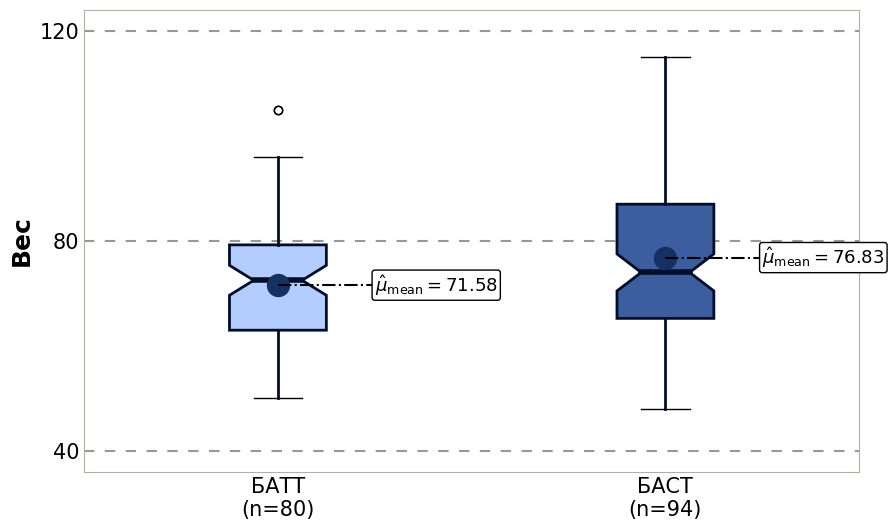

Рисунок ?. Распределение и средние значение Вес в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,71.58,1.33,71.58±1.33,63.00,72.50,79.25,72.50 [63.00-79.25]
БАСТ,76.83,1.55,76.83±1.55,65.25,74.00,87.00,74.00 [65.25-87.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.2867
Распределение группы БАСТ соответствует нормальному распределению p=0.2413
Распределение в общей выборке соостветствует нормальному распределению p=0.0667

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-2.51, p=0.013
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3044.00, p=0.031
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -5.25
95%Cl (разницы) = (-9.149)-(-1.34)
p=0.008
Между группами есть статистически значимые различия


обострений_за_последний_год


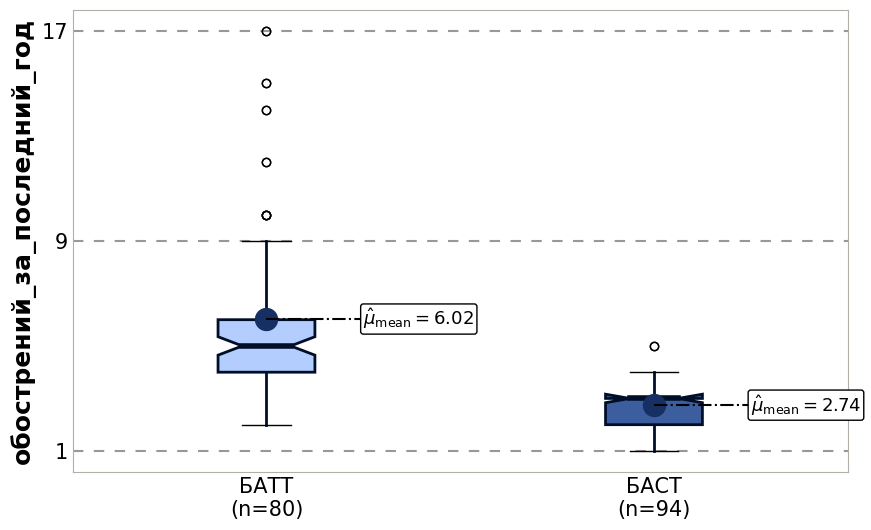

Рисунок ?. Распределение и средние значение обострений_за_последний_год в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,6.03,0.38,6.03±0.38,4.00,5.00,6.00,5.00 [4.00-6.00]
БАСТ,2.74,0.09,2.74±0.09,2.00,3.00,3.00,3.00 [2.00-3.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ соответствует нормальному распределению p=0.9211
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=8.91, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=6650.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.28
95%Cl (разницы) = (2.585)-(4.011)
p=0.000
Между группами есть статистически значимые различия


ACQ_контроль_симптомов_БА


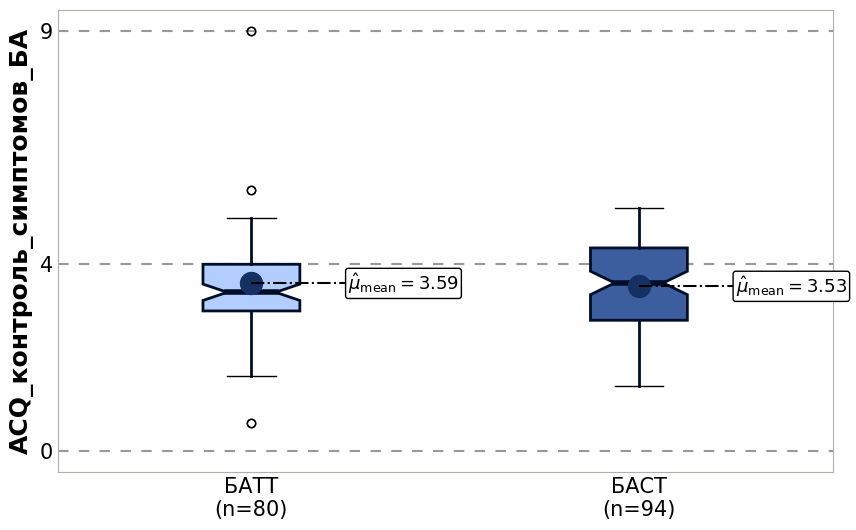

Рисунок ?. Распределение и средние значение ACQ_контроль_симптомов_БА в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,3.59,0.14,3.59±0.14,3.00,3.40,4.00,3.40 [3.00-4.00]
БАСТ,3.53,0.10,3.53±0.10,2.80,3.60,4.35,3.60 [2.80-4.35]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0476
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.37, p=0.715
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3716.00, p=0.895
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.06
95%Cl (разницы) = (-0.249)-(0.389)
p=0.705
Различи между группами статистически не значимые


Самочувствие


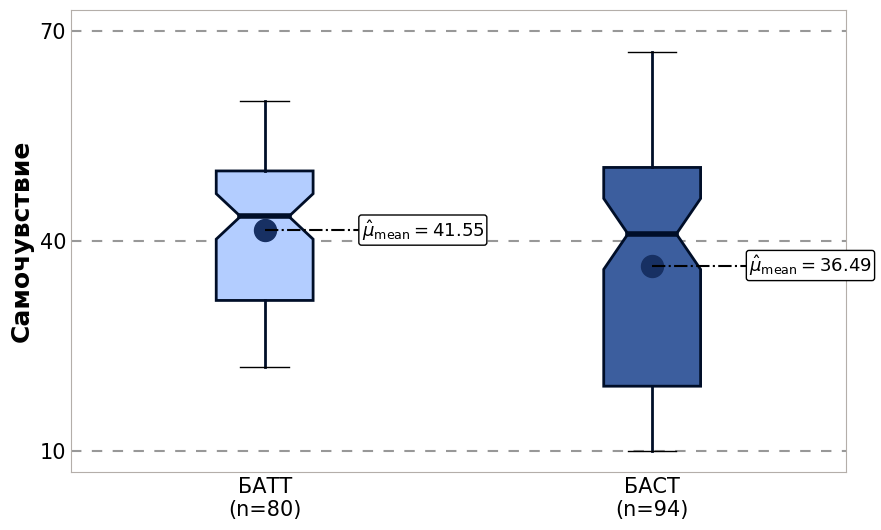

Рисунок ?. Распределение и средние значение Самочувствие в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,41.55,1.36,41.55±1.36,31.50,43.50,50.00,43.50 [31.50-50.00]
БАСТ,36.49,1.58,36.49±1.58,19.25,41.00,50.50,41.00 [19.25-50.50]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.37, p=0.019
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4532.00, p=0.020
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 5.06
95%Cl (разницы) = (1.138)-(9.128)
p=0.012
Между группами есть статистически значимые различия


Активность


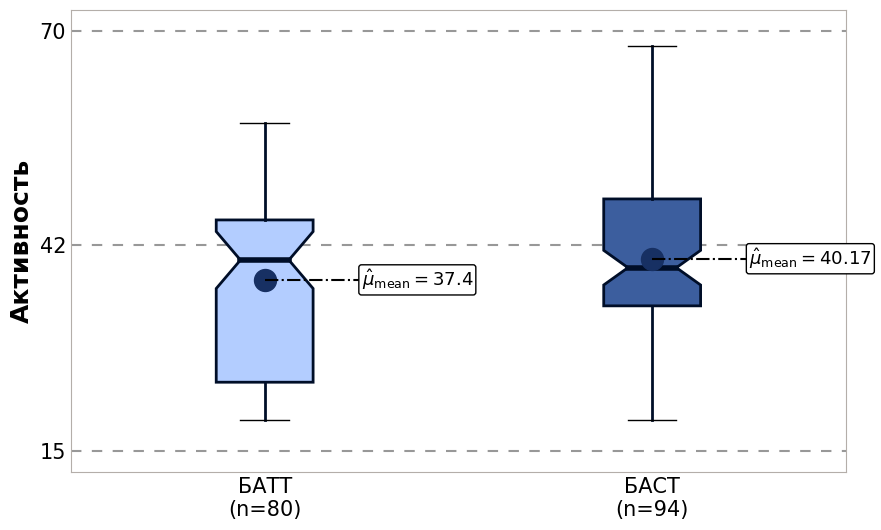

Рисунок ?. Распределение и средние значение Активность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,37.40,1.30,37.40±1.30,24.00,40.00,45.25,40.00 [24.00-45.25]
БАСТ,40.17,1.24,40.17±1.24,34.00,39.00,48.00,39.00 [34.00-48.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0001
Распределение группы БАСТ соответствует нормальному распределению p=0.2526
Распределение в общей выборке соостветствует нормальному распределению p=0.1922

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.53, p=0.128
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3486.00, p=0.408
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -2.77
95%Cl (разницы) = (-6.085)-(0.617)
p=0.112
Различи между группами статистически не значимые


Настроение


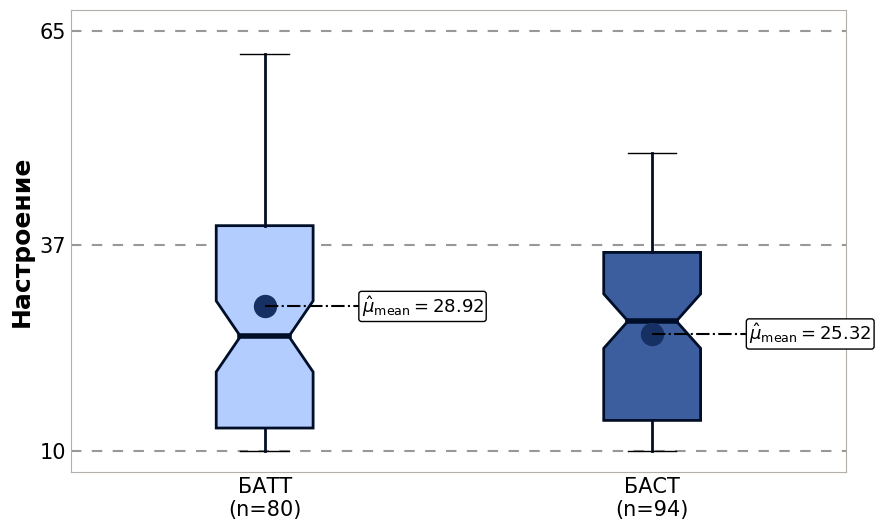

Рисунок ?. Распределение и средние значение Настроение в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,28.93,1.79,28.93±1.79,13.00,25.00,39.50,25.00 [13.00-39.50]
БАСТ,25.32,1.20,25.32±1.20,14.00,27.00,36.00,27.00 [14.00-36.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0151
Распределение группы БАСТ отличается от нормального распределения p=0.0002
Распределение в общей выборке отличается от нормального распределения p=0.0030

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.71, p=0.090
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4094.00, p=0.313
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.61
95%Cl (разницы) = (-0.404)-(7.574)
p=0.075
Различи между группами статистически не значимые


Экстраверсия_интроверсия


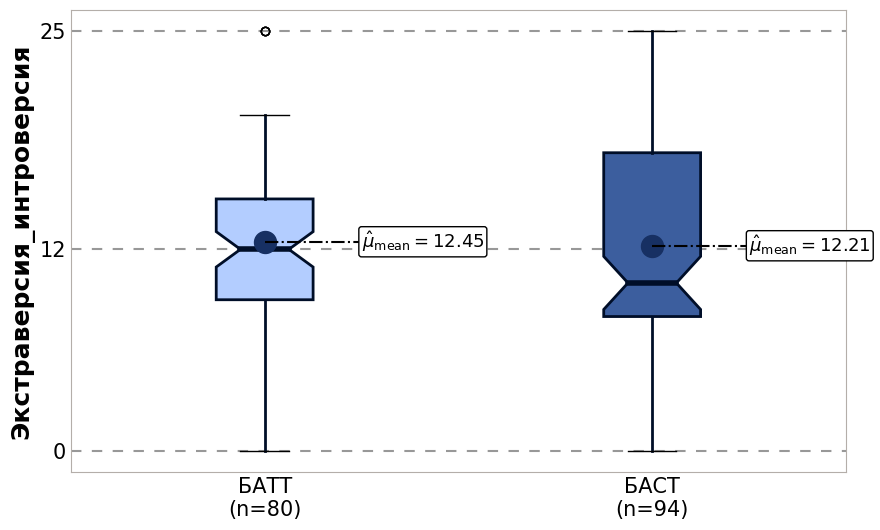

Рисунок ?. Распределение и средние значение Экстраверсия_интроверсия в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,12.45,0.59,12.45±0.59,9.00,12.00,15.00,12.00 [9.00-15.00]
БАСТ,12.21,0.65,12.21±0.65,8.00,10.00,17.75,10.00 [8.00-17.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.4373
Распределение группы БАСТ отличается от нормального распределения p=0.0012
Распределение в общей выборке соостветствует нормальному распределению p=0.0821

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=0.26, p=0.792
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4054.00, p=0.374
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.24
95%Cl (разницы) = (-1.468)-(1.915)
p=0.790
Различи между группами статистически не значимые


Ригидность_пластичность


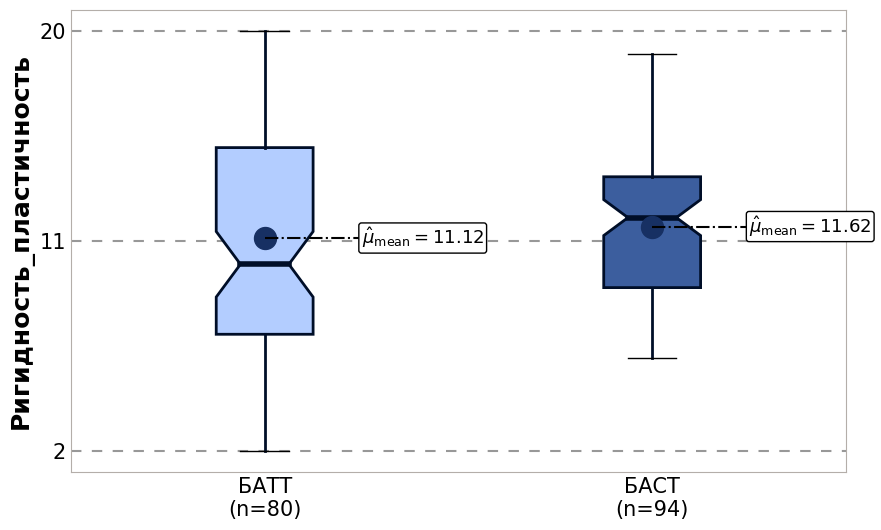

Рисунок ?. Распределение и средние значение Ригидность_пластичность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,11.12,0.52,11.12±0.52,7.00,10.00,15.00,10.00 [7.00-15.00]
БАСТ,11.62,0.34,11.62±0.34,9.00,12.00,13.75,12.00 [9.00-13.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0274
Распределение группы БАСТ соответствует нормальному распределению p=0.2524
Распределение в общей выборке соостветствует нормальному распределению p=0.1573

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-0.81, p=0.420
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3478.00, p=0.394
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.49
95%Cl (разницы) = (-1.649)-(0.649)
p=0.398
Различи между группами статистически не значимые


Эмоционвозбудим_уравновешенность


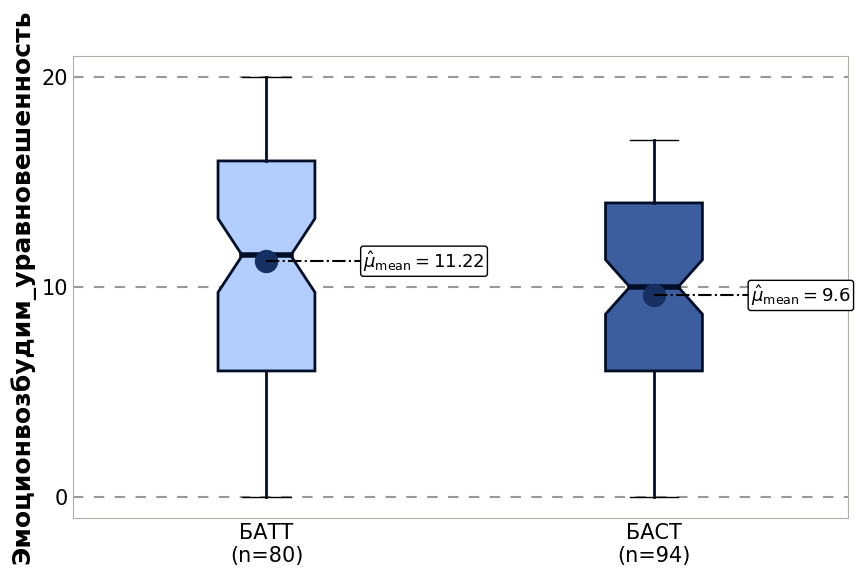

Рисунок ?. Распределение и средние значение Эмоционвозбудим_уравновешенность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,11.22,0.59,11.22±0.59,6.00,11.50,16.00,11.50 [6.00-16.00]
БАСТ,9.60,0.48,9.60±0.48,6.00,10.00,14.00,10.00 [6.00-14.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0009
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.15, p=0.033
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4382.00, p=0.060
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.63
95%Cl (разницы) = (0.191)-(3.064)
p=0.026
Между группами есть статистически значимые различия


Быстрота_реакц_медлительность


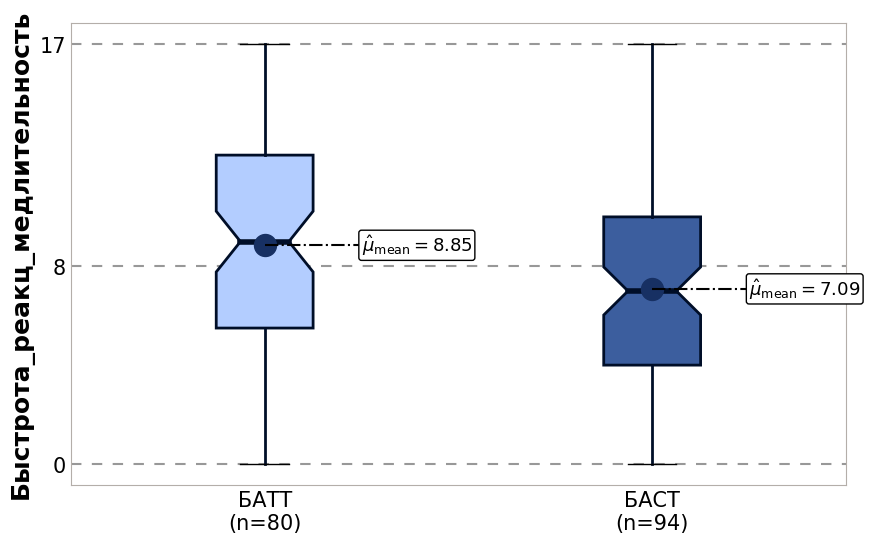

Рисунок ?. Распределение и средние значение Быстрота_реакц_медлительность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,8.85,0.54,8.85±0.54,5.50,9.00,12.50,9.00 [5.50-12.50]
БАСТ,7.09,0.48,7.09±0.48,4.00,7.00,10.00,7.00 [4.00-10.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0326
Распределение группы БАСТ отличается от нормального распределения p=0.0466
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.43, p=0.016
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4568.00, p=0.014
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.76
95%Cl (разницы) = (0.383)-(3.096)
p=0.012
Между группами есть статистически значимые различия


Активность_пасивность


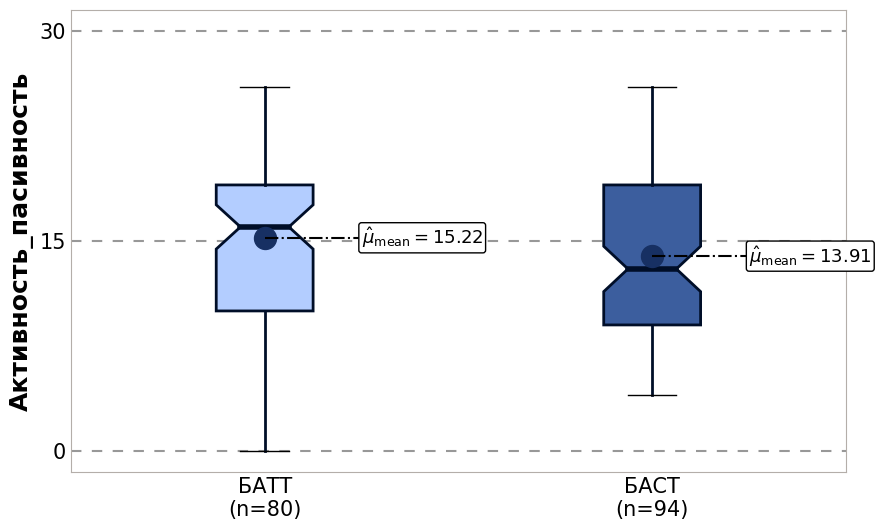

Рисунок ?. Распределение и средние значение Активность_пасивность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,15.22,0.76,15.22±0.76,10.00,16.00,19.00,16.00 [10.00-19.00]
БАСТ,13.91,0.62,13.91±0.62,9.00,13.00,19.00,13.00 [9.00-19.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.2417
Распределение группы БАСТ отличается от нормального распределения p=0.0005
Распределение в общей выборке отличается от нормального распределения p=0.0019

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.34, p=0.182
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4304.00, p=0.100
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.31
95%Cl (разницы) = (-0.543)-(3.128)
p=0.160
Различи между группами статистически не значимые


Искренность


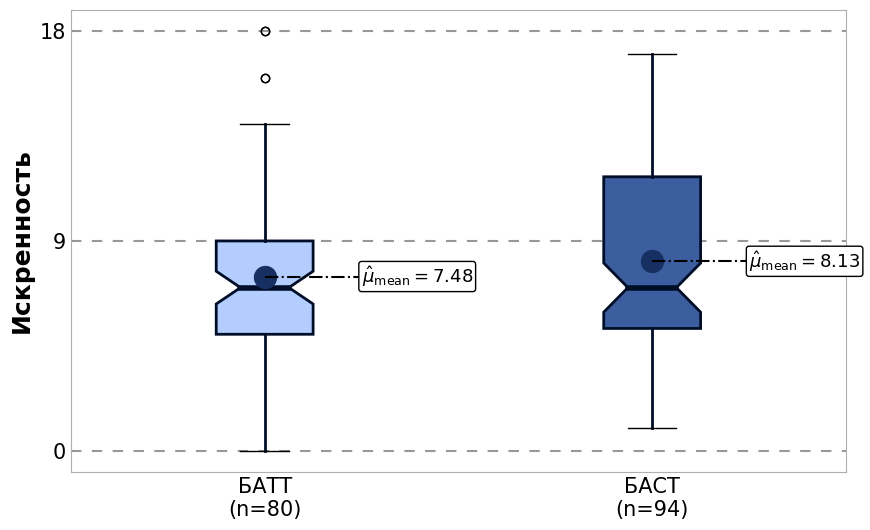

Рисунок ?. Распределение и средние значение Искренность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,7.47,0.41,7.47±0.41,5.00,7.00,9.00,7.00 [5.00-9.00]
БАСТ,8.13,0.39,8.13±0.39,5.25,7.00,11.75,7.00 [5.25-11.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0065
Распределение группы БАСТ соответствует нормальному распределению p=0.1769
Распределение в общей выборке отличается от нормального распределения p=0.0203

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-1.14, p=0.256
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3452.00, p=0.351
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.65
95%Cl (разницы) = (-1.702)-(0.404)
p=0.233
Различи между группами статистически не значимые


Реактивная_тревожность


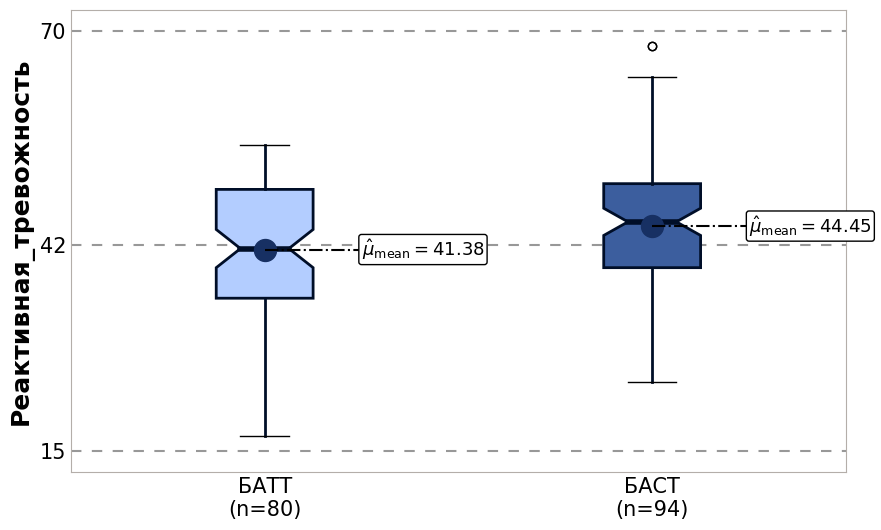

Рисунок ?. Распределение и средние значение Реактивная_тревожность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,41.38,1.08,41.38±1.08,35.00,41.50,49.25,41.50 [35.00-49.25]
БАСТ,44.45,1.03,44.45±1.03,39.00,45.00,50.00,45.00 [39.00-50.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.0632
Распределение группы БАСТ соответствует нормальному распределению p=0.8198
Распределение в общей выборке соостветствует нормальному распределению p=0.6086

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-2.04, p=0.043
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3272.00, p=0.141
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -3.07
95%Cl (разницы) = (-5.936)-(-0.266)
p=0.035
Между группами есть статистически значимые различия


Ситуатвиная_тревожность


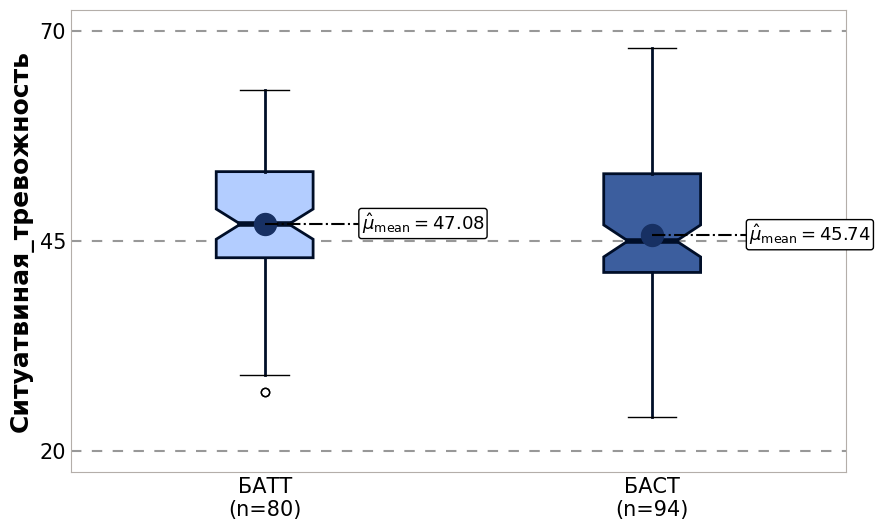

Рисунок ?. Распределение и средние значение Ситуатвиная_тревожность в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,47.08,0.96,47.08±0.96,43.00,47.00,53.25,47.00 [43.00-53.25]
БАСТ,45.74,1.02,45.74±1.02,41.25,45.00,53.00,45.00 [41.25-53.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.1019
Распределение группы БАСТ соответствует нормальному распределению p=0.8661
Распределение в общей выборке соостветствует нормальному распределению p=0.2276

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=0.93, p=0.352
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4146.00, p=0.244
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.33
95%Cl (разницы) = (-1.277)-(3.957)
p=0.322
Различи между группами статистически не значимые


Физическая_активность_PF


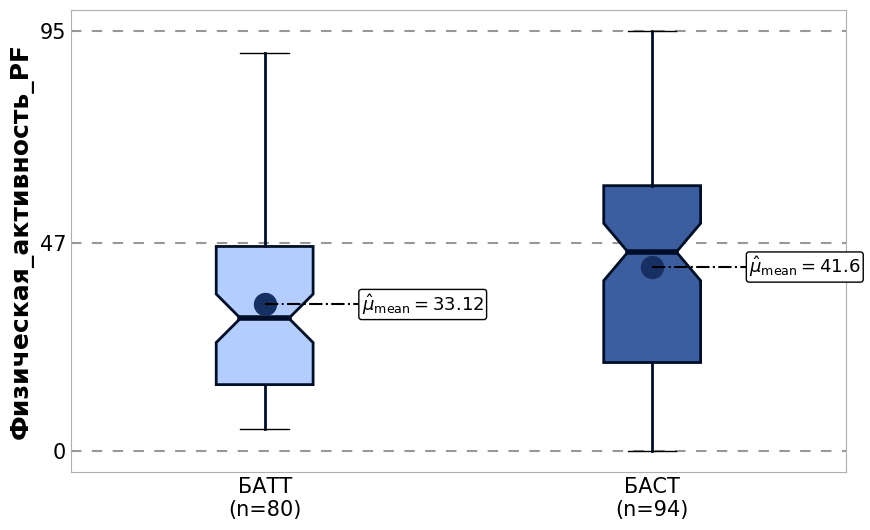

Рисунок ?. Распределение и средние значение Физическая_активность_PF в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,33.12,2.49,33.12±2.49,15.00,30.00,46.25,30.00 [15.00-46.25]
БАСТ,41.60,2.69,41.60±2.69,20.00,45.00,60.00,45.00 [20.00-60.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0439
Распределение группы БАСТ отличается от нормального распределения p=0.0045
Распределение в общей выборке отличается от нормального распределения p=0.0001

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.27, p=0.025
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3106.00, p=0.048
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -8.47
95%Cl (разницы) = (-15.532)-(-1.488)
p=0.017
Между группами есть статистически значимые различия


Физичпроблемы_в_жизнедеят_RP


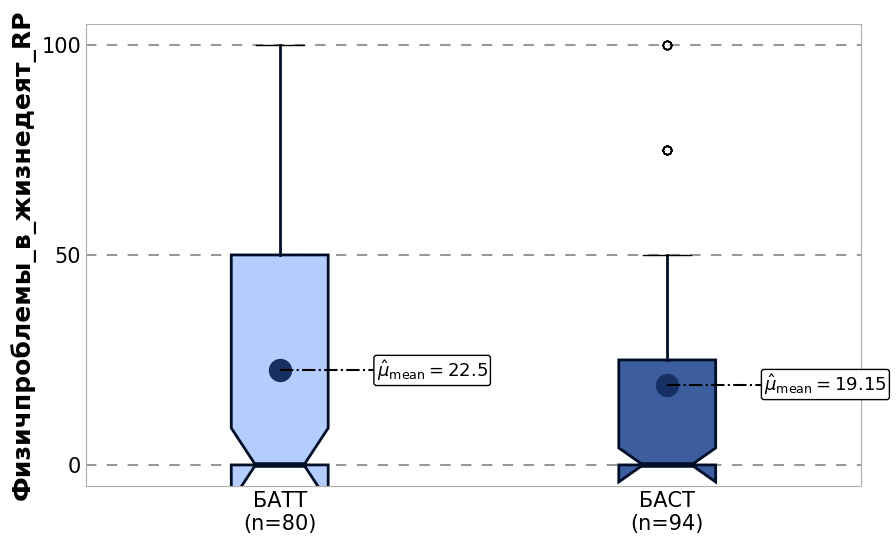

Рисунок ?. Распределение и средние значение Физичпроблемы_в_жизнедеят_RP в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,22.50,3.52,22.50±3.52,0.00,0.00,50.00,0.00 [0.00-50.00]
БАСТ,19.15,3.24,19.15±3.24,0.00,0.00,25.00,0.00 [0.00-25.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0002
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.70, p=0.488
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4048.00, p=0.318
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.35
95%Cl (разницы) = (-5.585)-(12.5)
p=0.462
Различи между группами статистически не значимые


Интенсивность_боли_BP


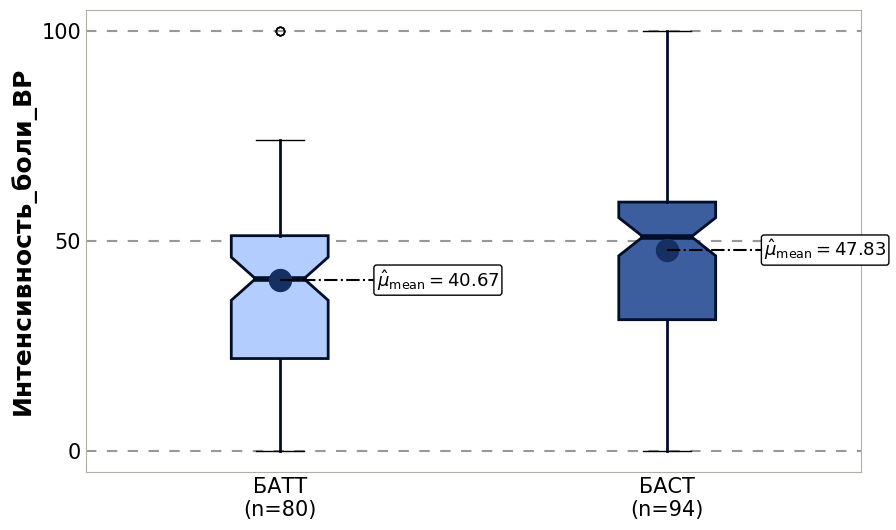

Рисунок ?. Распределение и средние значение Интенсивность_боли_BP в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,40.67,2.28,40.67±2.28,22.00,41.00,51.25,41.00 [22.00-51.25]
БАСТ,47.83,2.46,47.83±2.46,31.25,51.00,59.25,51.00 [31.25-59.25]


Распределение группы БАТТ отличается от нормального распределения p=0.0001
Распределение группы БАСТ соответствует нормальному распределению p=0.1822
Распределение в общей выборке отличается от нормального распределения p=0.0006

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.10, p=0.037
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2932.00, p=0.012
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -7.15
95%Cl (разницы) = (-13.362)-(-0.713)
p=0.028
Между группами есть статистически значимые различия


Общее_здоровье_GH


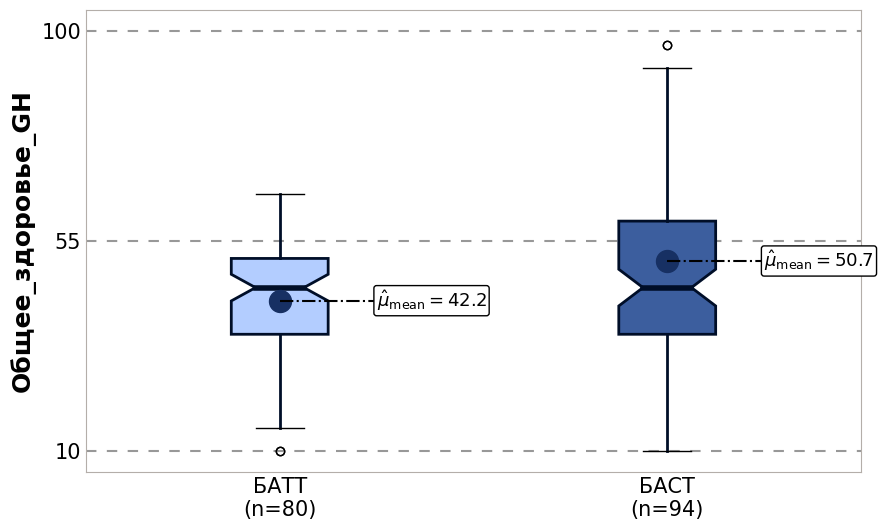

Рисунок ?. Распределение и средние значение Общее_здоровье_GH в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,42.20,1.56,42.20±1.56,35.00,45.00,51.25,45.00 [35.00-51.25]
БАСТ,50.70,2.19,50.70±2.19,35.00,45.00,59.25,45.00 [35.00-59.25]


Распределение группы БАТТ соответствует нормальному распределению p=0.1829
Распределение группы БАСТ отличается от нормального распределения p=0.0445
Распределение в общей выборке отличается от нормального распределения p=0.0022

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.04, p=0.003
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3078.00, p=0.039
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -8.50
95%Cl (разницы) = (-13.67)-(-3.478)
p=0.001
Между группами есть статистически значимые различия


Жизненная_актвиность_VT


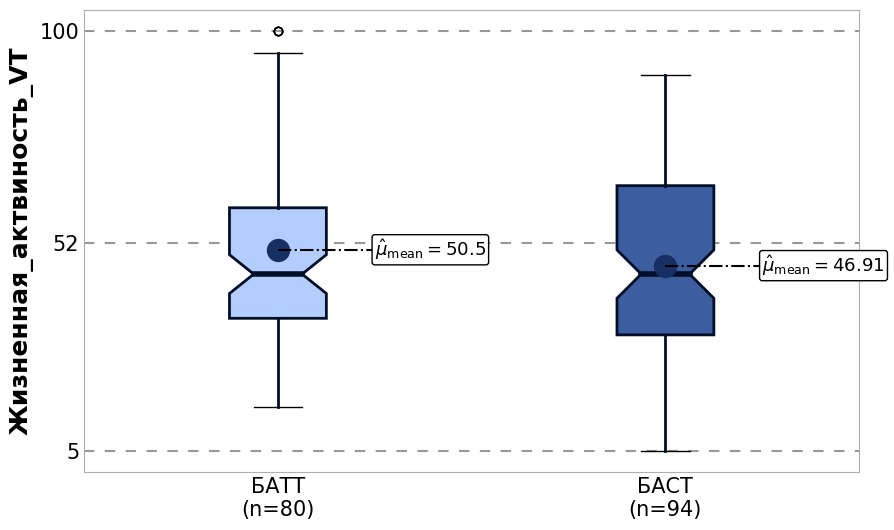

Рисунок ?. Распределение и средние значение Жизненная_актвиность_VT в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,50.50,2.20,50.50±2.20,35.00,45.00,60.00,45.00 [35.00-60.00]
БАСТ,46.91,2.16,46.91±2.16,31.25,45.00,65.00,45.00 [31.25-65.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0074
Распределение группы БАСТ отличается от нормального распределения p=0.0377
Распределение в общей выборке соостветствует нормальному распределению p=0.4128

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=1.15, p=0.252
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3946.00, p=0.574
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 3.59
95%Cl (разницы) = (-2.128)-(9.415)
p=0.222
Различи между группами статистически не значимые


Социальная_активность_SF


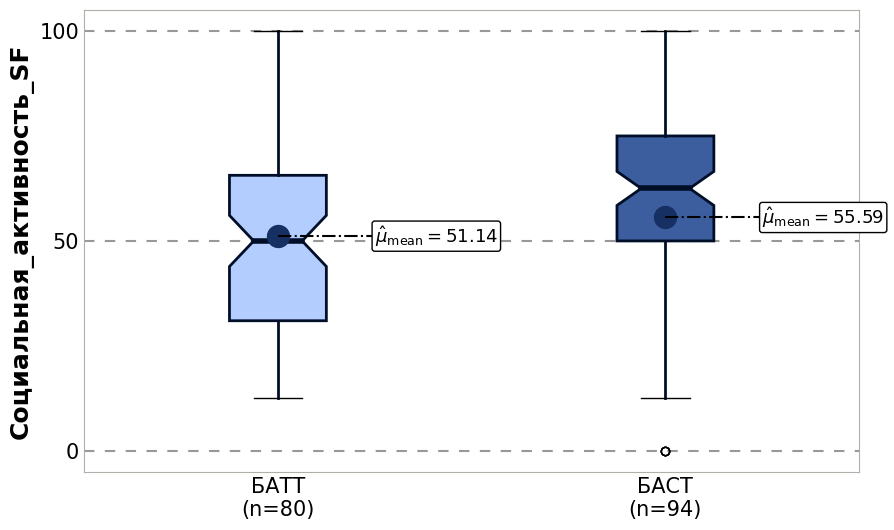

Рисунок ?. Распределение и средние значение Социальная_активность_SF в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,51.14,2.71,51.14±2.71,31.00,50.00,65.62,50.00 [31.00-65.62]
БАСТ,55.59,2.36,55.59±2.36,50.00,62.50,75.00,62.50 [50.00-75.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.0957
Распределение группы БАСТ соответствует нормальному распределению p=0.1136
Распределение в общей выборке соостветствует нормальному распределению p=0.3811

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.24, p=0.218
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3280.00, p=0.143
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -4.45
95%Cl (разницы) = (-10.912)-(2.301)
p=0.186
Различи между группами статистически не значимые


Эмоционал_проблемы_в_жизнедеят_RE


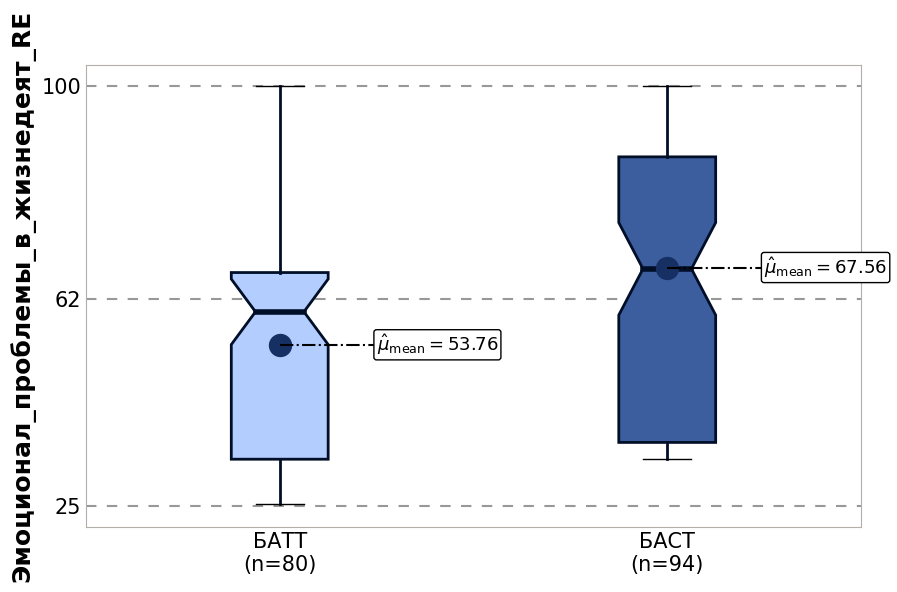

Рисунок ?. Распределение и средние значение Эмоционал_проблемы_в_жизнедеят_RE в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,53.76,2.30,53.76±2.30,33.33,59.66,66.67,59.66 [33.33-66.67]
БАСТ,67.56,2.55,67.56±2.55,36.33,67.33,87.33,67.33 [36.33-87.33]


Распределение группы БАТТ соответствует нормальному распределению p=0.0837
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.93, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2558.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -13.80
95%Cl (разницы) = (-20.223)-(-7.305)
p=0.000
Между группами есть статистически значимые различия


Психическое_здоровье_MH


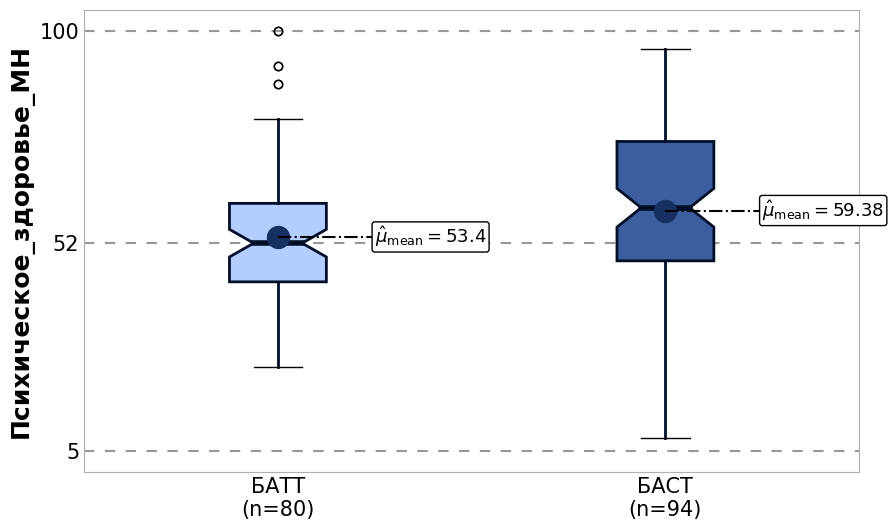

Рисунок ?. Распределение и средние значение Психическое_здоровье_MH в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,53.40,2.00,53.40±2.00,43.25,52.00,61.00,52.00 [43.25-61.00]
БАСТ,59.38,2.12,59.38±2.12,48.00,60.00,75.00,60.00 [48.00-75.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.0961
Распределение группы БАСТ соответствует нормальному распределению p=0.2791
Распределение в общей выборке соостветствует нормальному распределению p=0.4578

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-2.02, p=0.045
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3002.00, p=0.022
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -5.98
95%Cl (разницы) = (-11.394)-(-0.478)
p=0.032
Между группами есть статистически значимые различия


Физич_компонент_здор_PH


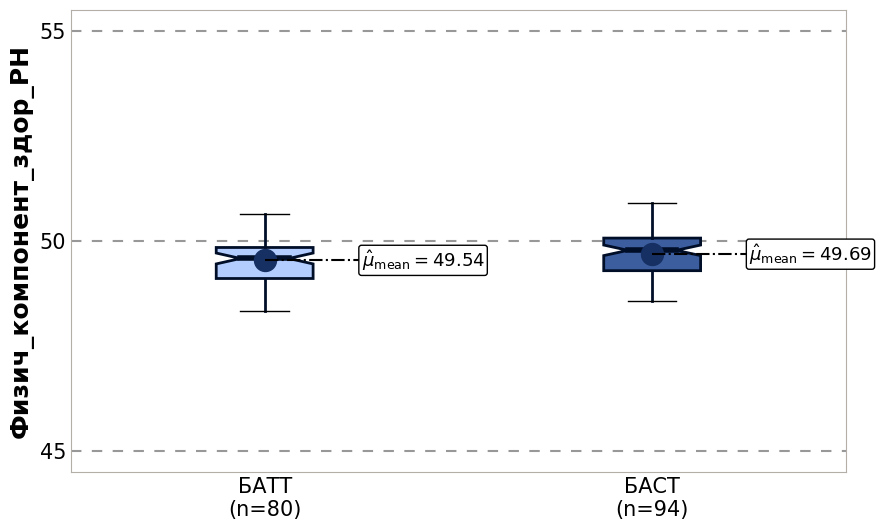

Рисунок ?. Распределение и средние значение Физич_компонент_здор_PH в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,49.54,0.06,49.54±0.06,49.11,49.58,49.84,49.58 [49.11-49.84]
БАСТ,49.69,0.06,49.69±0.06,49.29,49.78,50.07,49.78 [49.29-50.07]


Распределение группы БАТТ соответствует нормальному распределению p=0.5542
Распределение группы БАСТ соответствует нормальному распределению p=0.3609
Распределение в общей выборке соостветствует нормальному распределению p=0.2834

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.69, p=0.092
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3156.00, p=0.068
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.15
95%Cl (разницы) = (-0.307)-(0.022)
p=0.083
Различи между группами статистически не значимые


Психич_компонент_здор_MH


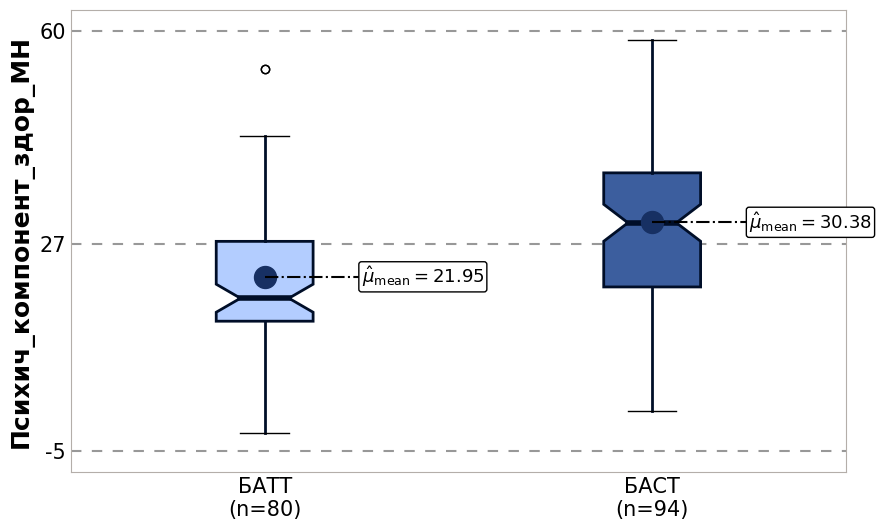

Рисунок ?. Распределение и средние значение Психич_компонент_здор_MH в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,21.95,1.25,21.95±1.25,15.08,18.63,27.44,18.63 [15.08-27.44]
БАСТ,30.38,1.41,30.38±1.41,20.38,30.31,38.04,30.31 [20.38-38.04]


Распределение группы БАТТ отличается от нормального распределения p=0.0070
Распределение группы БАСТ соответствует нормальному распределению p=0.4442
Распределение в общей выборке отличается от нормального распределения p=0.0166

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-4.39, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2292.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -8.44
95%Cl (разницы) = (-11.93)-(-4.831)
p=0.000
Между группами есть статистически значимые различия


Наличие_вегет_дисфун


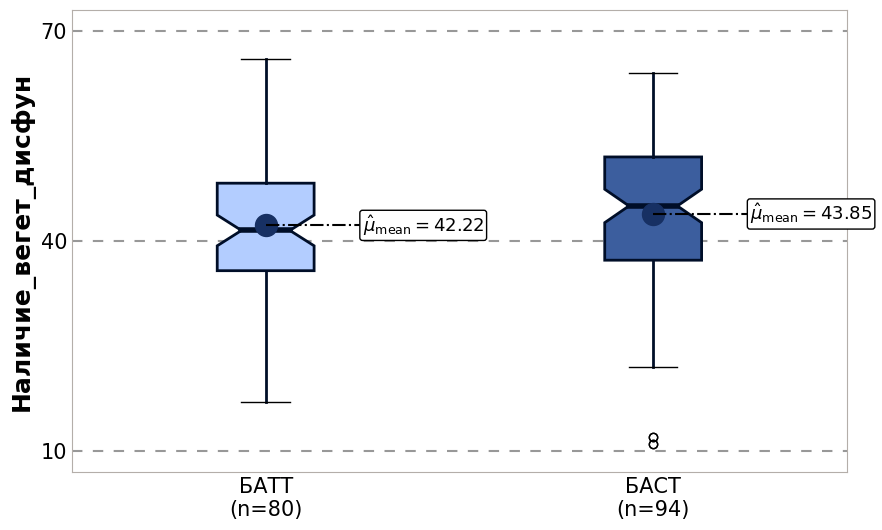

Рисунок ?. Распределение и средние значение Наличие_вегет_дисфун в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,42.23,1.18,42.23±1.18,35.75,41.50,48.25,41.50 [35.75-48.25]
БАСТ,43.85,1.33,43.85±1.33,37.25,45.00,52.00,45.00 [37.25-52.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.9982
Распределение группы БАСТ отличается от нормального распределения p=0.0415
Распределение в общей выборке соостветствует нормальному распределению p=0.0922

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-0.89, p=0.373
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3284.00, p=0.151
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.63
95%Cl (разницы) = (-4.926)-(1.713)
p=0.337
Различи между группами статистически не значимые


Наличие_вегет_дисфун2


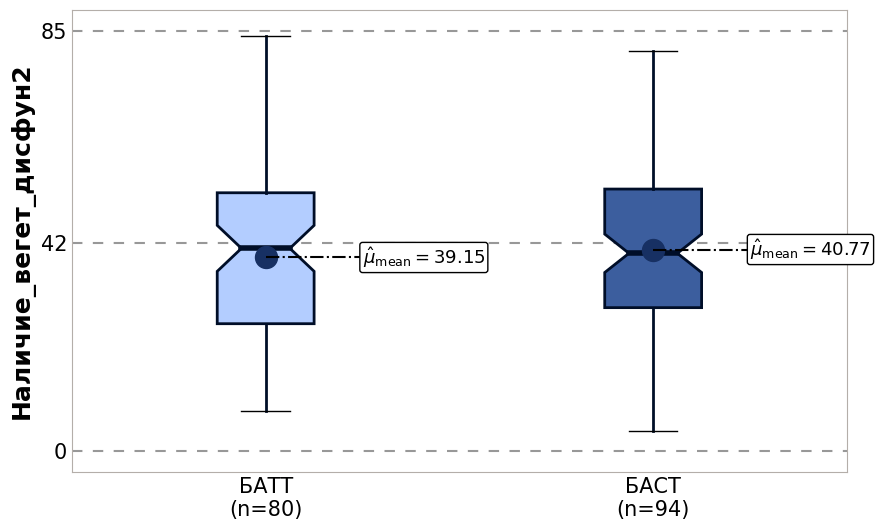

Рисунок ?. Распределение и средние значение Наличие_вегет_дисфун2 в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,39.15,2.00,39.15±2.00,25.75,41.00,52.25,41.00 [25.75-52.25]
БАСТ,40.77,1.78,40.77±1.78,29.00,40.00,53.00,40.00 [29.00-53.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.4363
Распределение группы БАСТ соответствует нормальному распределению p=0.3909
Распределение в общей выборке соостветствует нормальному распределению p=0.1355

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-0.60, p=0.548
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3550.00, p=0.527
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.62
95%Cl (разницы) = (-6.543)-(3.501)
p=0.524
Различи между группами статистически не значимые


Апатия1


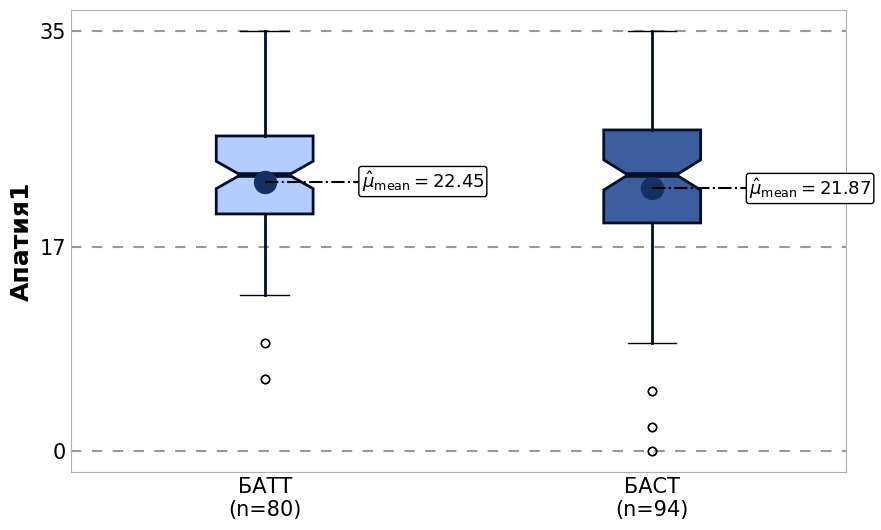

Рисунок ?. Распределение и средние значение Апатия1 в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,22.45,0.68,22.45±0.68,19.75,23.00,26.25,23.00 [19.75-26.25]
БАСТ,21.87,0.77,21.87±0.77,19.00,23.00,26.75,23.00 [19.00-26.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.2253
Распределение группы БАСТ отличается от нормального распределения p=0.0002
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.55, p=0.583
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3770.00, p=0.977
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.58
95%Cl (разницы) = (-1.362)-(2.564)
p=0.563
Различи между группами статистически не значимые


Апатия2


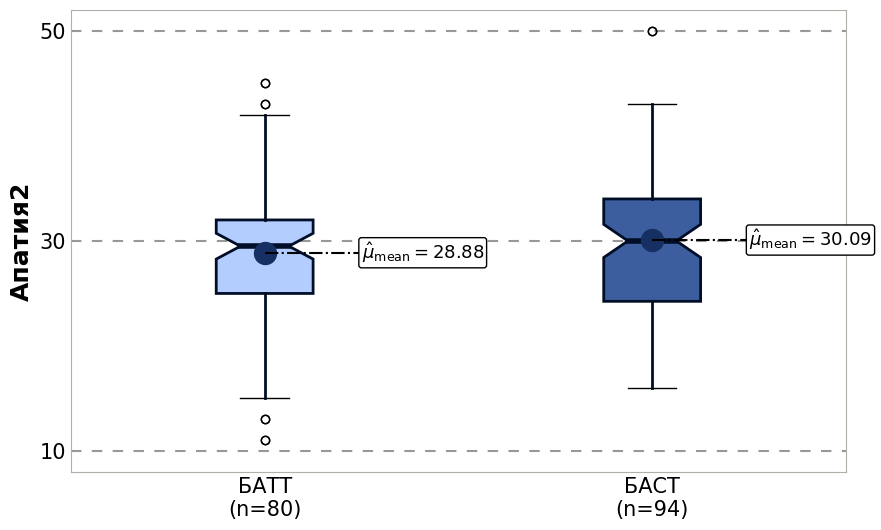

Рисунок ?. Распределение и средние значение Апатия2 в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,28.88,0.80,28.88±0.80,25.00,29.50,32.00,29.50 [25.00-32.00]
БАСТ,30.09,0.74,30.09±0.74,24.25,30.00,34.00,30.00 [24.25-34.00]


Распределение группы БАТТ соответствует нормальному распределению p=0.3288
Распределение группы БАСТ соответствует нормальному распределению p=0.3454
Распределение в общей выборке соостветствует нормальному распределению p=0.4976

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.11, p=0.271
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3456.00, p=0.359
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.21
95%Cl (разницы) = (-3.33)-(0.862)
p=0.255
Различи между группами статистически не значимые


Уровень_VIP


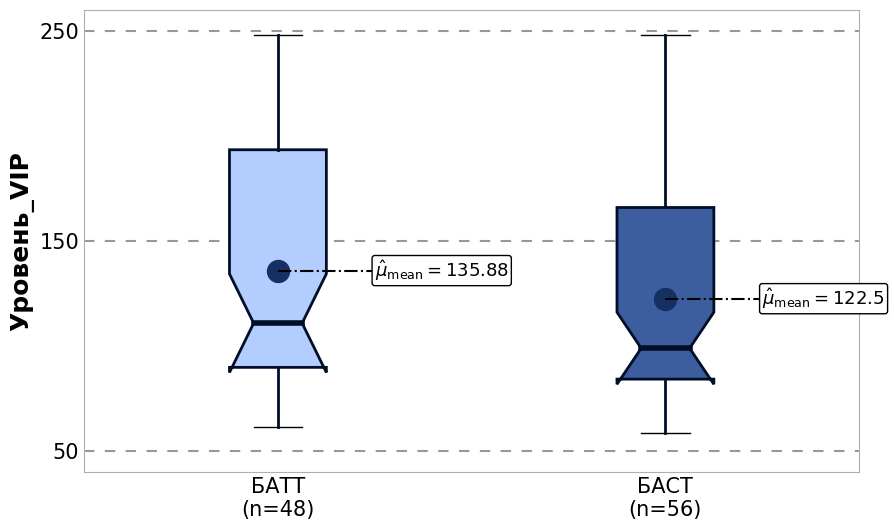

Рисунок ?. Распределение и средние значение Уровень_VIP в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,135.88,8.81,135.88±8.81,89.80,110.84,193.42,110.84 [89.80-193.42]
БАСТ,122.50,7.29,122.50±7.29,84.19,98.90,165.93,98.90 [84.19-165.93]


Распределение группы БАТТ отличается от нормального распределения p=0.0091
Распределение группы БАСТ отличается от нормального распределения p=0.0475
Распределение в общей выборке отличается от нормального распределения p=0.0013

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.17, p=0.245
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=1522.00, p=0.247
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 13.38
95%Cl (разницы) = (-7.951)-(34.761)
p=0.222
Различи между группами статистически не значимые


Уровень_SP


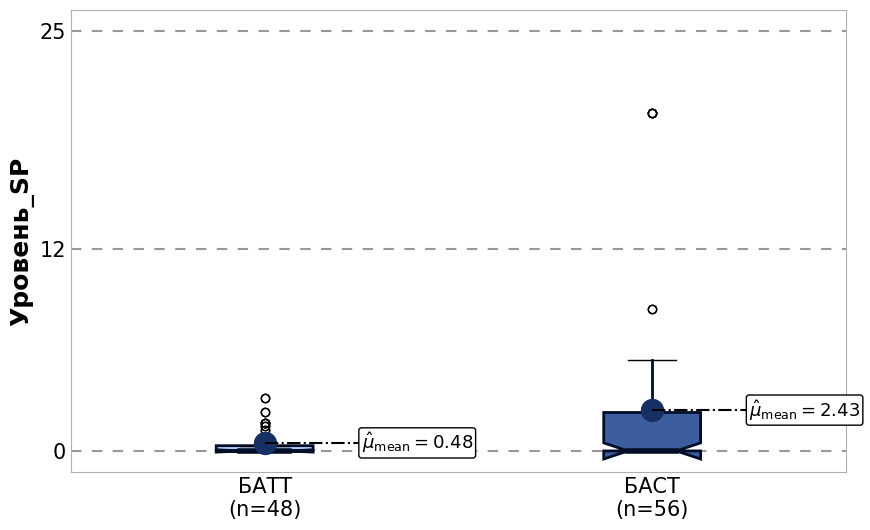

Рисунок ?. Распределение и средние значение Уровень_SP в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.48,0.13,0.48±0.13,0.00,0.00,0.31,0.00 [0.00-0.31]
БАСТ,2.43,0.71,2.43±0.71,0.00,0.00,2.29,0.00 [0.00-2.29]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.51, p=0.014
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=1128.00, p=0.085
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.95
95%Cl (разницы) = (-3.416)-(-0.678)
p=0.006
Между группами есть статистически значимые различия


ЖЕЛ_при_поступлении


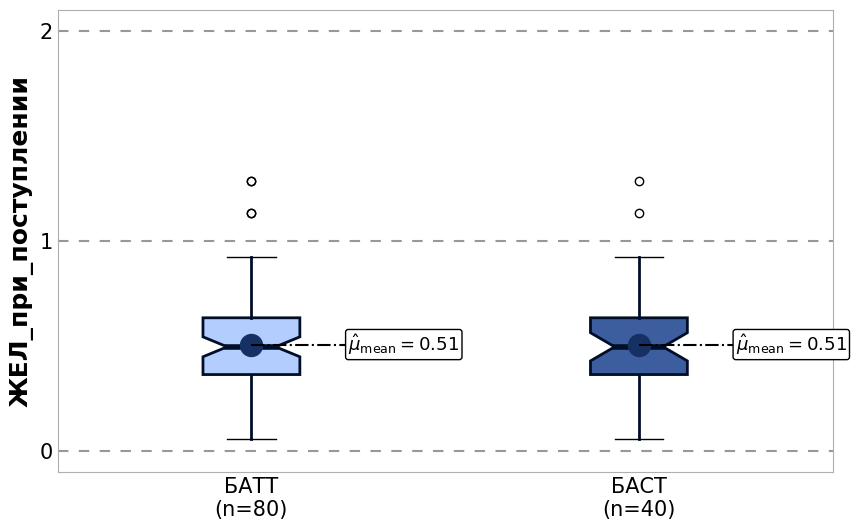

Рисунок ?. Распределение и средние значение ЖЕЛ_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.51,0.03,0.51±0.03,0.36,0.50,0.63,0.50 [0.36-0.63]
БАСТ,0.51,0.04,0.51±0.04,0.36,0.50,0.63,0.50 [0.36-0.63]


Распределение группы БАТТ отличается от нормального распределения p=0.0042
Распределение группы БАСТ отличается от нормального распределения p=0.0307
Распределение в общей выборке отличается от нормального распределения p=0.0006

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.00, p=1.000
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=1600.00, p=1.000
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.00
95%Cl (разницы) = (-0.08)-(0.08)
p=0.998
Различи между группами статистически не значимые


ОФВ1_при_поступлении


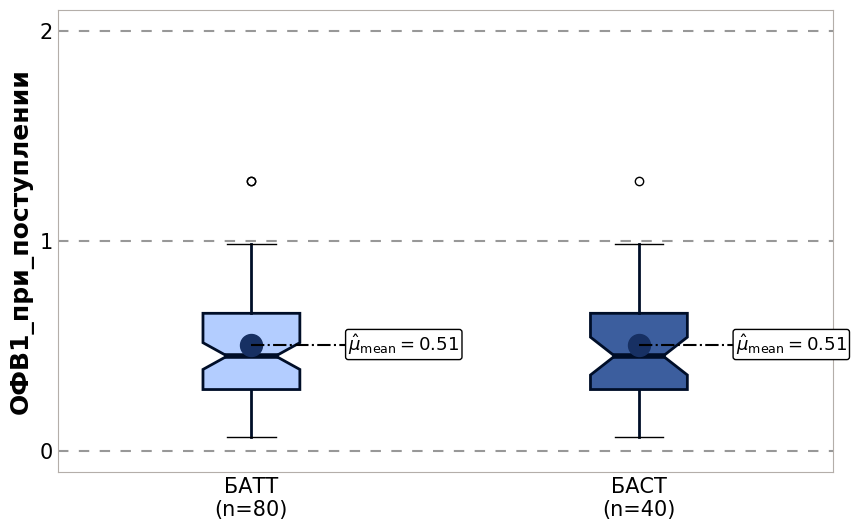

Рисунок ?. Распределение и средние значение ОФВ1_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.51,0.03,0.51±0.03,0.29,0.45,0.66,0.45 [0.29-0.66]
БАСТ,0.51,0.04,0.51±0.04,0.29,0.45,0.66,0.45 [0.29-0.66]


Распределение группы БАТТ соответствует нормальному распределению p=0.0523
Распределение группы БАСТ соответствует нормальному распределению p=0.1627
Распределение в общей выборке отличается от нормального распределения p=0.0167

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.00, p=1.000
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=1600.00, p=1.000
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.00
95%Cl (разницы) = (-0.083)-(0.081)
p=0.992
Различи между группами статистически не значимые


Индекс_Тиффно_при_поступлении


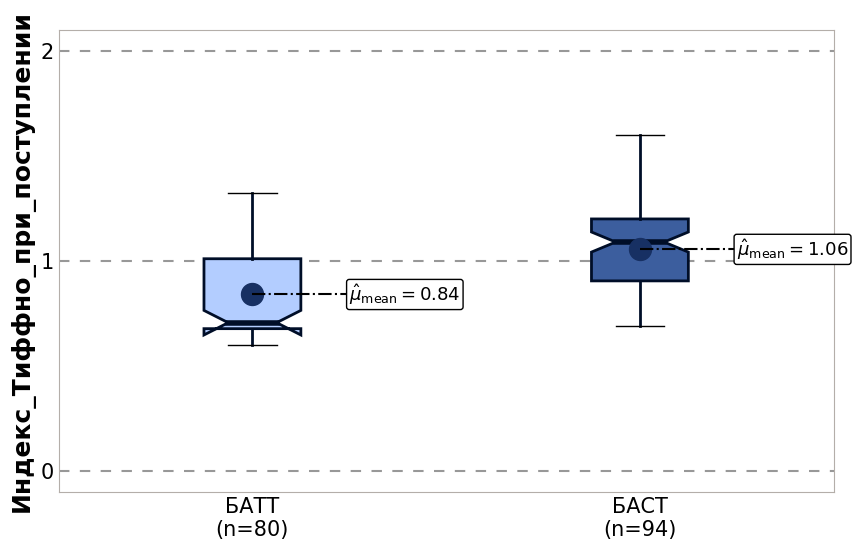

Рисунок ?. Распределение и средние значение Индекс_Тиффно_при_поступлении в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.84,0.02,0.84±0.02,0.68,0.71,1.01,0.71 [0.68-1.01]
БАСТ,1.06,0.02,1.06±0.02,0.91,1.09,1.20,1.09 [0.91-1.20]


Распределение группы БАТТ отличается от нормального распределения p=0.0014
Распределение группы БАСТ соответствует нормальному распределению p=0.9858
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-6.79, p=0.000
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=1700.00, p=0.000
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.21
95%Cl (разницы) = (-0.275)-(-0.155)
p=0.000
Между группами есть статистически значимые различия


ЖЕЛ_при_выписке


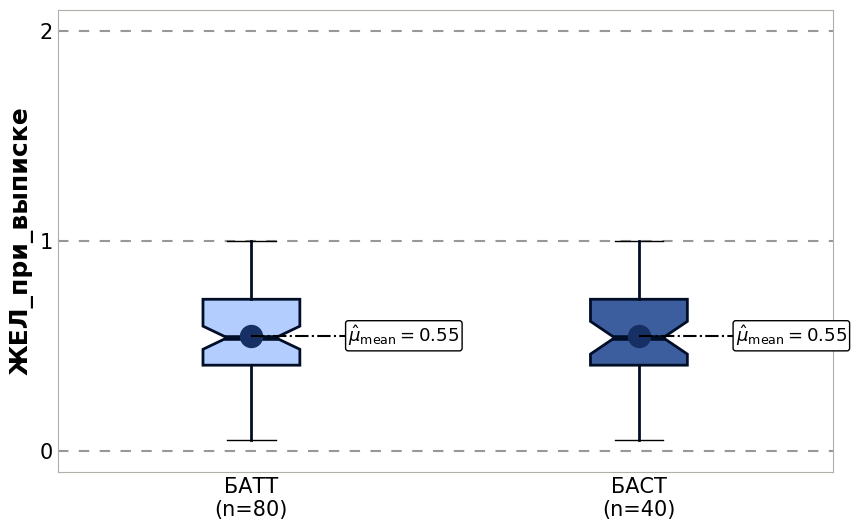

Рисунок ?. Распределение и средние значение ЖЕЛ_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.55,0.02,0.55±0.02,0.41,0.54,0.72,0.54 [0.41-0.72]
БАСТ,0.55,0.04,0.55±0.04,0.41,0.54,0.72,0.54 [0.41-0.72]


Распределение группы БАТТ соответствует нормальному распределению p=0.4228
Распределение группы БАСТ соответствует нормальному распределению p=0.7584
Распределение в общей выборке соостветствует нормальному распределению p=0.2229

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-0.00, p=1.000
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=1600.00, p=1.000
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.00
95%Cl (разницы) = (-0.067)-(0.07)
p=0.994
Различи между группами статистически не значимые


ОФВ1_при_выписке


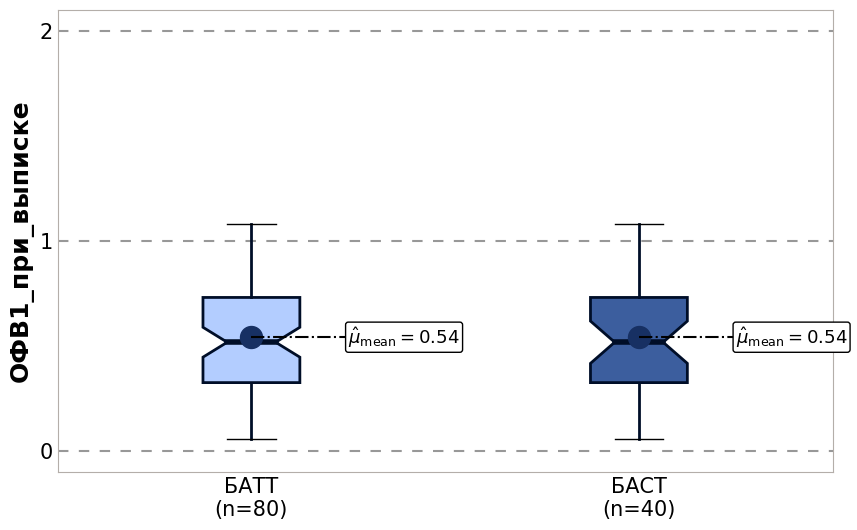

Рисунок ?. Распределение и средние значение ОФВ1_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.54,0.03,0.54±0.03,0.33,0.52,0.73,0.52 [0.33-0.73]
БАСТ,0.54,0.04,0.54±0.04,0.33,0.52,0.73,0.52 [0.33-0.73]


Распределение группы БАТТ соответствует нормальному распределению p=0.1265
Распределение группы БАСТ соответствует нормальному распределению p=0.4622
Распределение в общей выборке отличается от нормального распределения p=0.0308

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.00, p=1.000
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=1600.00, p=1.000
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.00
95%Cl (разницы) = (-0.073)-(0.074)
p=0.997
Различи между группами статистически не значимые


Индекс_Тиффно_при_выписке


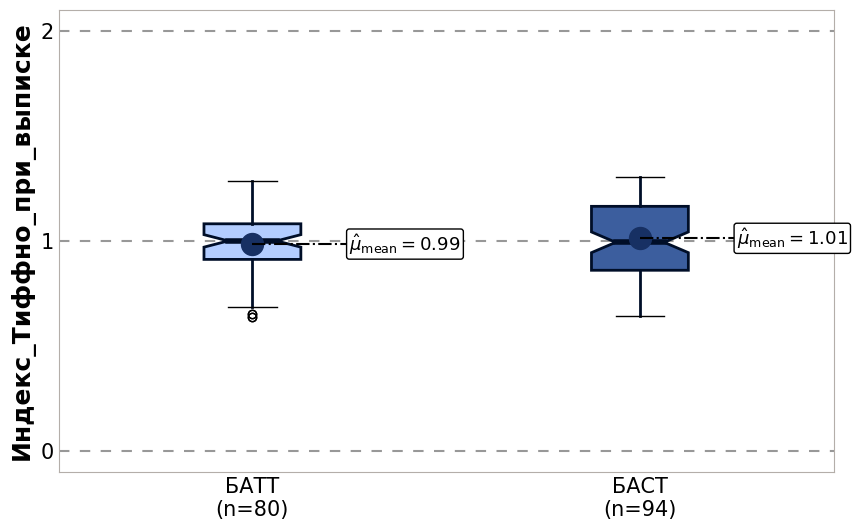

Рисунок ?. Распределение и средние значение Индекс_Тиффно_при_выписке в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,0.99,0.02,0.99±0.02,0.91,1.00,1.08,1.00 [0.91-1.08]
БАСТ,1.01,0.02,1.01±0.02,0.86,0.99,1.16,0.99 [0.86-1.16]


Распределение группы БАТТ соответствует нормальному распределению p=0.1224
Распределение группы БАСТ отличается от нормального распределения p=0.0037
Распределение в общей выборке соостветствует нормальному распределению p=0.0536

Рекомендуется использовать Параметрические критерии т-тест или ANOVA

t-тест (тест Стьюдента)
t=-1.11, p=0.268
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3422.00, p=0.308
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.03
95%Cl (разницы) = (-0.073)-(0.019)
p=0.243
Различи между группами статистически не значимые


ИМТ


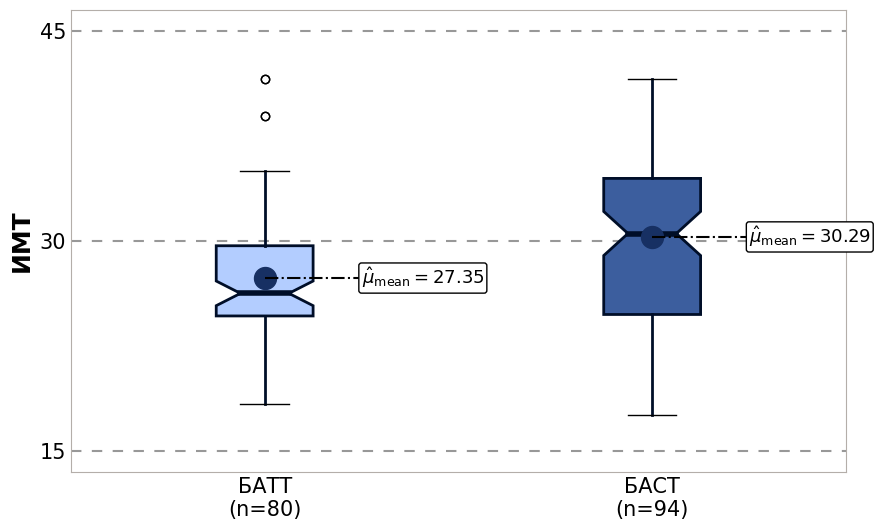

Рисунок ?. Распределение и средние значение ИМТ в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,27.35,0.53,27.35±0.53,24.64,26.26,29.66,26.26 [24.64-29.66]
БАСТ,30.29,0.66,30.29±0.66,24.75,30.53,34.47,30.53 [24.75-34.47]


Распределение группы БАТТ отличается от нормального распределения p=0.0023
Распределение группы БАСТ соответствует нормальному распределению p=0.0570
Распределение в общей выборке отличается от нормального распределения p=0.0340

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.38, p=0.001
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=2754.00, p=0.002
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -2.94
95%Cl (разницы) = (-4.552)-(-1.31)
p=0.000
Между группами есть статистически значимые различия


VAR_mc


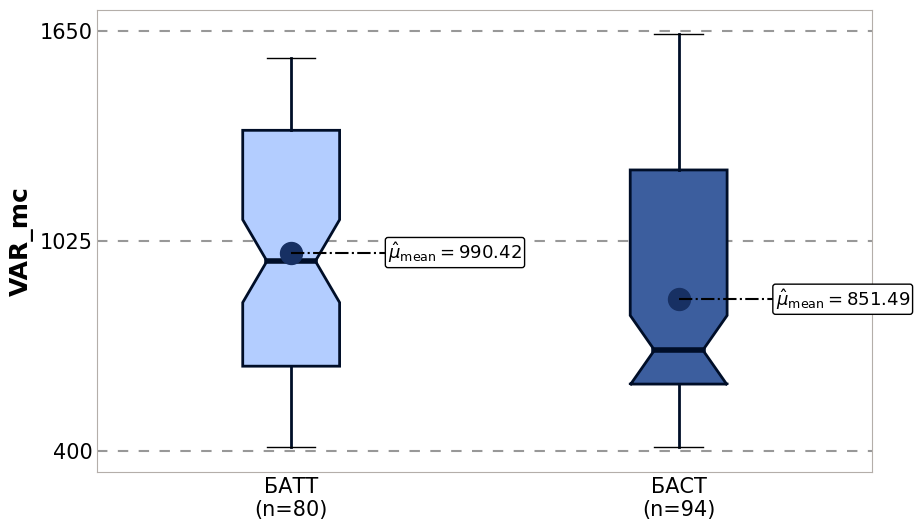

Рисунок ?. Распределение и средние значение VAR_mc в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,990.42,42.76,990.42±42.76,652.25,965.00,1354.25,965.00 [652.25-1354.25]
БАСТ,851.49,35.87,851.49±35.87,599.00,700.00,1236.25,700.00 [599.00-1236.25]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0009
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.49, p=0.014
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4698.00, p=0.005
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 138.94
95%Cl (разницы) = (33.806)-(241.533)
p=0.009
Между группами есть статистически значимые различия


aVNN_mc


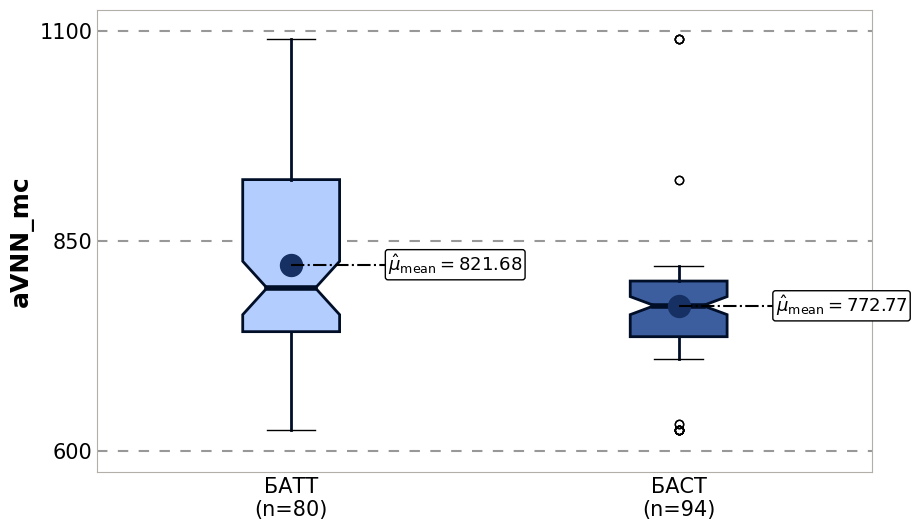

Рисунок ?. Распределение и средние значение aVNN_mc в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,821.67,12.14,821.67±12.14,742.00,794.00,923.00,794.00 [742.00-923.00]
БАСТ,772.77,9.15,772.77±9.15,736.00,773.00,802.25,773.00 [736.00-802.25]


Распределение группы БАТТ соответствует нормальному распределению p=0.1056
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=3.25, p=0.001
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4602.00, p=0.011
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 48.91
95%Cl (разницы) = (20.105)-(77.734)
p=0.001
Между группами есть статистически значимые различия


SDNN_mc


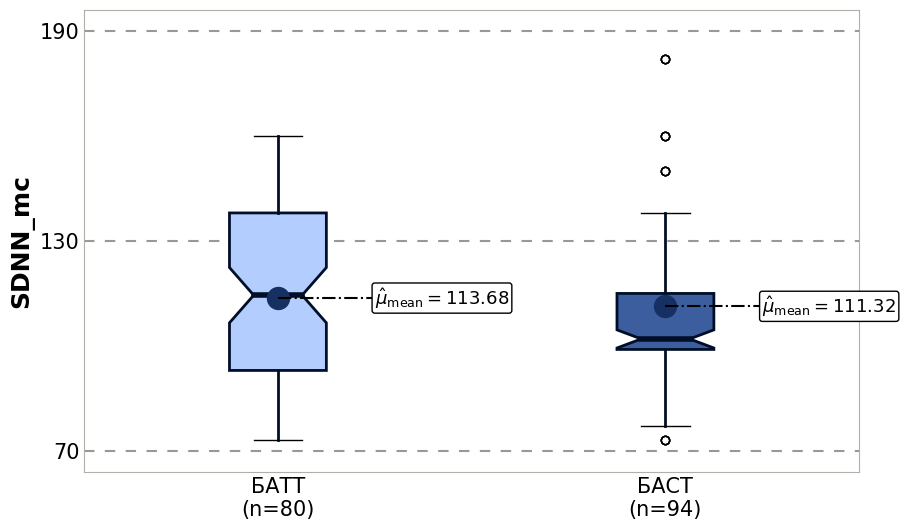

Рисунок ?. Распределение и средние значение SDNN_mc в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,113.67,3.00,113.67±3.00,93.00,114.50,138.00,114.50 [93.00-138.00]
БАСТ,111.32,2.62,111.32±2.62,99.00,102.00,115.00,102.00 [99.00-115.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0012
Распределение группы БАСТ отличается от нормального распределения p=0.0001
Распределение в общей выборке отличается от нормального распределения p=0.0055

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=0.59, p=0.556
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4134.00, p=0.258
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 2.36
95%Cl (разницы) = (-5.17)-(9.638)
p=0.528
Различи между группами статистически не значимые


pNN50


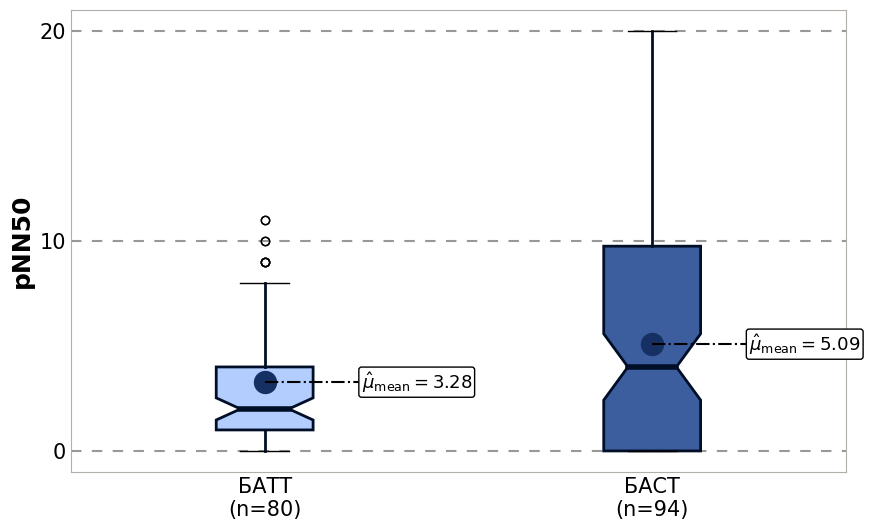

Рисунок ?. Распределение и средние значение pNN50 в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,3.27,0.36,3.27±0.36,1.00,2.00,4.00,2.00 [1.00-4.00]
БАСТ,5.09,0.55,5.09±0.55,0.00,4.00,9.75,4.00 [0.00-9.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0030
Распределение группы БАСТ отличается от нормального распределения p=0.0018
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.63, p=0.009
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3380.00, p=0.246
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -1.81
95%Cl (разницы) = (-3.064)-(-0.564)
p=0.005
Между группами есть статистически значимые различия


rMSSD


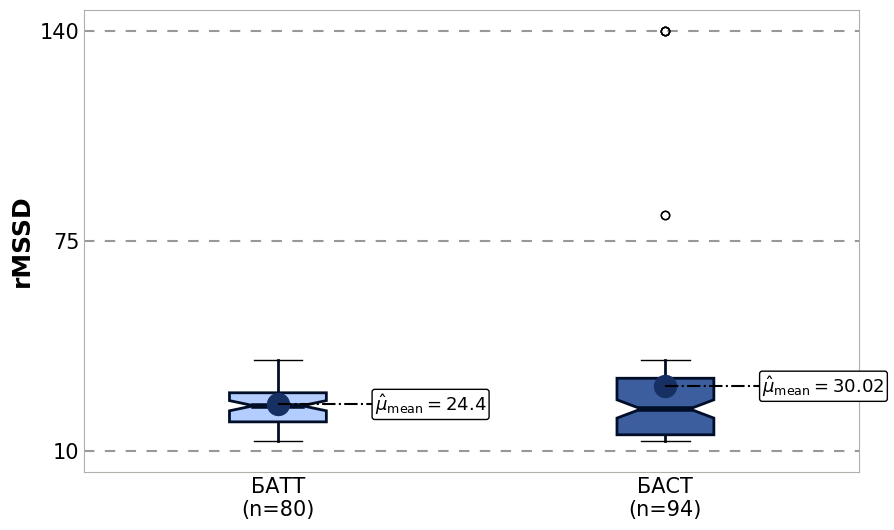

Рисунок ?. Распределение и средние значение rMSSD в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,24.40,0.77,24.40±0.77,19.00,24.00,28.00,24.00 [19.00-28.00]
БАСТ,30.02,2.70,30.02±2.70,15.00,23.00,32.50,23.00 [15.00-32.50]


Распределение группы БАТТ отличается от нормального распределения p=0.0096
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-1.86, p=0.065
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3762.00, p=0.996
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -5.62
95%Cl (разницы) = (-11.564)-(-0.702)
p=0.046
Между группами есть статистически значимые различия


SDNNidx_mc


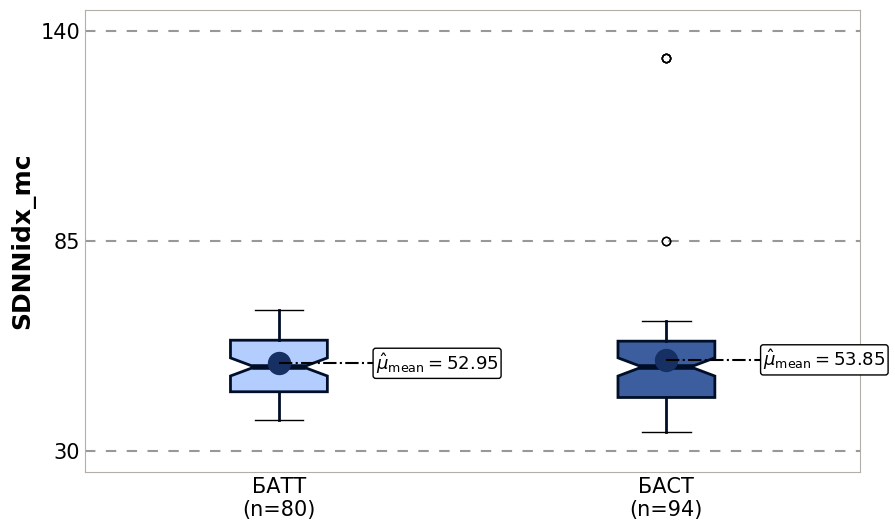

Рисунок ?. Распределение и средние значение SDNNidx_mc в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,52.95,0.97,52.95±0.97,45.50,52.00,59.00,52.00 [45.50-59.00]
БАСТ,53.85,2.00,53.85±2.00,44.00,52.00,58.75,52.00 [44.00-58.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0007
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.38, p=0.702
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4242.00, p=0.144
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -0.90
95%Cl (разницы) = (-5.383)-(3.266)
p=0.688
Различи между группами статистически не значимые


SDANN_mc


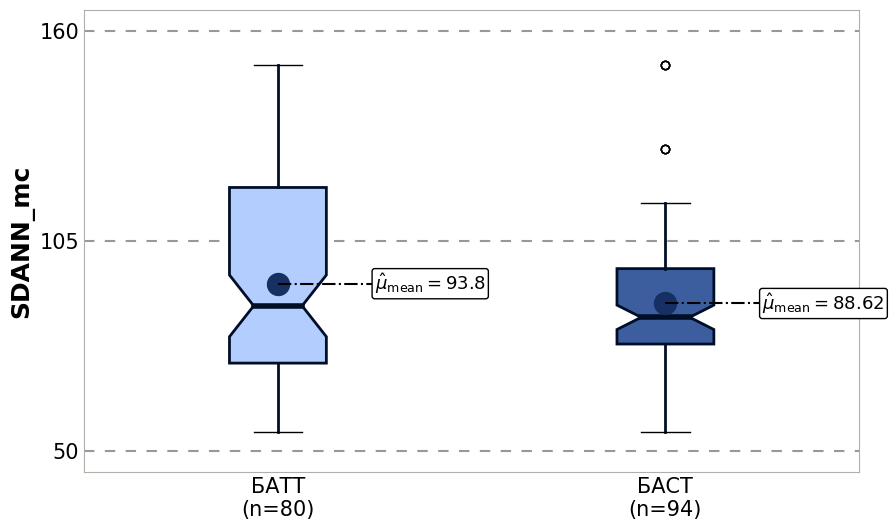

Рисунок ?. Распределение и средние значение SDANN_mc в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,93.80,3.24,93.80±3.24,73.00,88.00,119.00,88.00 [73.00-119.00]
БАСТ,88.62,2.29,88.62±2.29,78.00,85.00,97.75,85.00 [78.00-97.75]


Распределение группы БАТТ соответствует нормальному распределению p=0.0551
Распределение группы БАСТ отличается от нормального распределения p=0.0014
Распределение в общей выборке отличается от нормального распределения p=0.0033

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.33, p=0.187
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4042.00, p=0.394
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 5.18
95%Cl (разницы) = (-2.234)-(12.585)
p=0.171
Различи между группами статистически не значимые


VLF


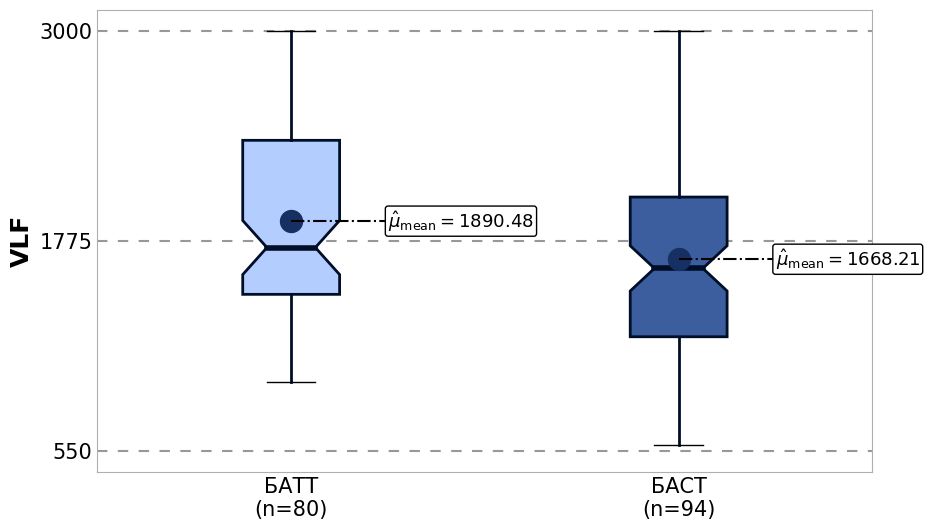

Рисунок ?. Распределение и средние значение VLF в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,1890.47,69.25,1890.47±69.25,1463.50,1736.50,2362.00,1736.50 [1463.50-2362.00]
БАСТ,1668.21,63.40,1668.21±63.40,1216.00,1615.00,2031.00,1615.00 [1216.00-2031.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0015
Распределение группы БАСТ соответствует нормальному распределению p=0.0878
Распределение в общей выборке отличается от нормального распределения p=0.0042

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=2.36, p=0.020
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=4518.00, p=0.022
Между группами есть статистически значимые различия

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 222.26
95%Cl (разницы) = (46.03)-(402.937)
p=0.014
Между группами есть статистически значимые различия


LF_Симпатика


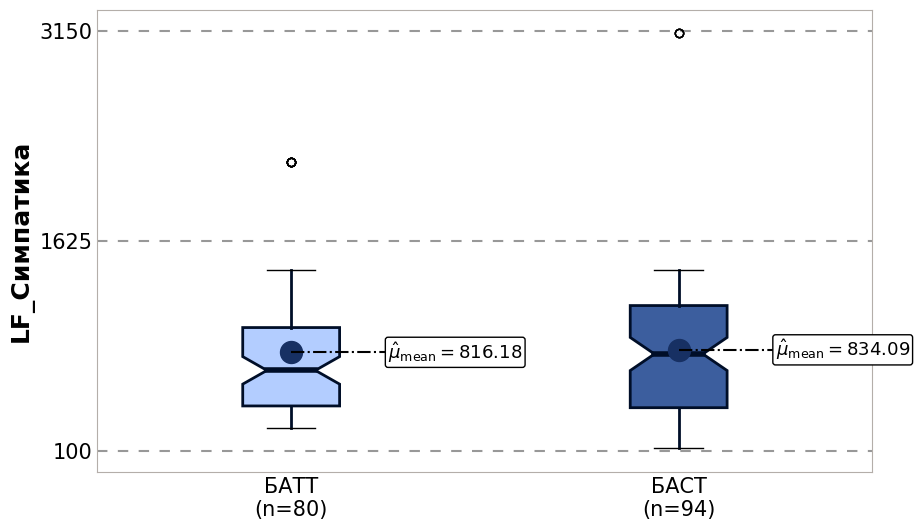

Рисунок ?. Распределение и средние значение LF_Симпатика в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,816.17,61.42,816.17±61.42,426.75,685.00,996.00,685.00 [426.75-996.00]
БАСТ,834.09,63.99,834.09±63.99,414.00,804.00,1155.75,804.00 [414.00-1155.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.20, p=0.843
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=3674.00, p=0.796
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -17.91
95%Cl (разницы) = (-186.554)-(151.576)
p=0.849
Различи между группами статистически не значимые


HF_Парасимпатика


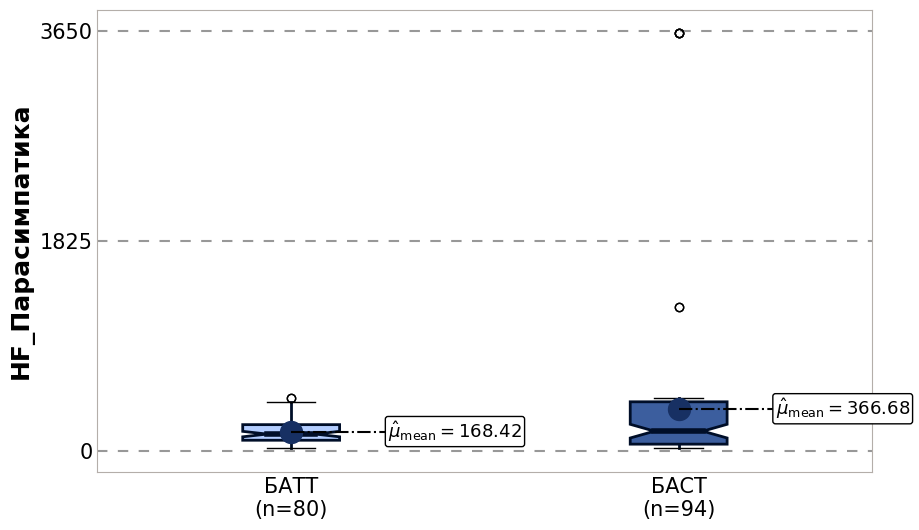

Рисунок ?. Распределение и средние значение HF_Парасимпатика в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,168.43,11.67,168.43±11.67,93.00,146.50,228.50,146.50 [93.00-228.50]
БАСТ,366.68,74.30,366.68±74.30,59.00,172.00,427.00,172.00 [59.00-427.00]


Распределение группы БАТТ отличается от нормального распределения p=0.0046
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-2.43, p=0.016
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3438.00, p=0.331
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -198.26
95%Cl (разницы) = (-355.364)-(-68.956)
p=0.008
Между группами есть статистически значимые различия


nHF


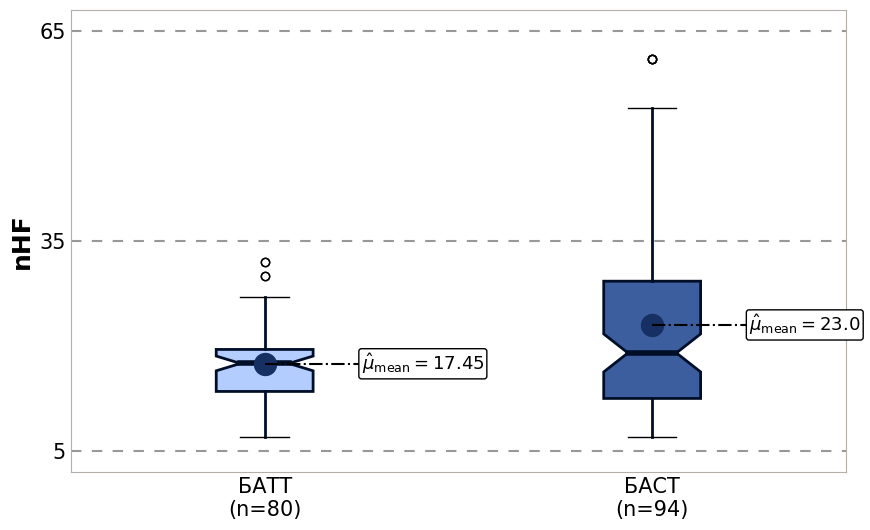

Рисунок ?. Распределение и средние значение nHF в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,17.45,0.62,17.45±0.62,13.50,17.50,19.50,17.50 [13.50-19.50]
БАСТ,23.00,1.42,23.00±1.42,12.50,19.00,29.25,19.00 [12.50-29.25]


Распределение группы БАТТ соответствует нормальному распределению p=0.2662
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-3.36, p=0.001
Между группами есть статистически значимые различия

Критерий Манна — Уитни
U=3164.00, p=0.071
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -5.55
95%Cl (разницы) = (-8.67)-(-2.691)
p=0.000
Между группами есть статистически значимые различия


CBBP


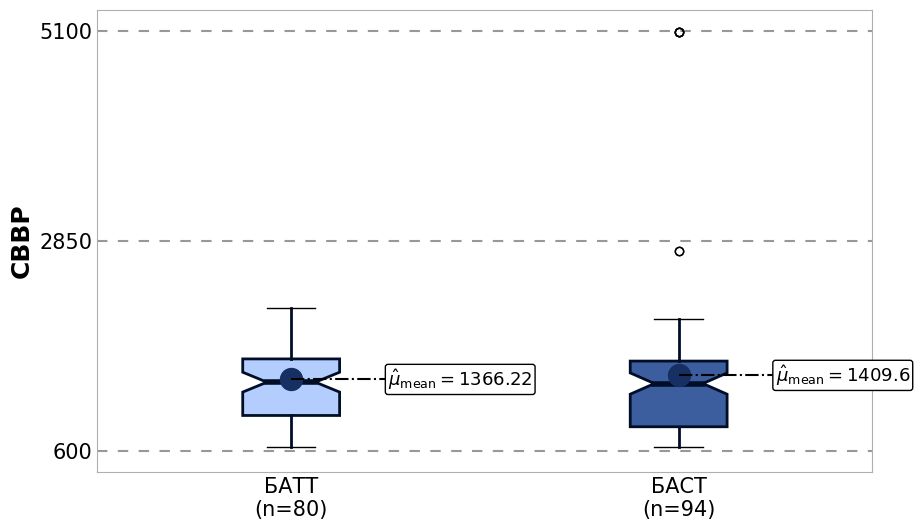

Рисунок ?. Распределение и средние значение CBBP в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,1366.22,48.10,1366.22±48.10,980.00,1337.00,1586.00,1337.00 [980.00-1586.00]
БАСТ,1409.60,93.02,1409.60±93.02,859.00,1322.00,1562.75,1322.00 [859.00-1562.75]


Распределение группы БАТТ отличается от нормального распределения p=0.0094
Распределение группы БАСТ отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=-0.39, p=0.696
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4258.00, p=0.132
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок -43.37
95%Cl (разницы) = (-251.616)-(148.655)
p=0.684
Различи между группами статистически не значимые


LF_HF


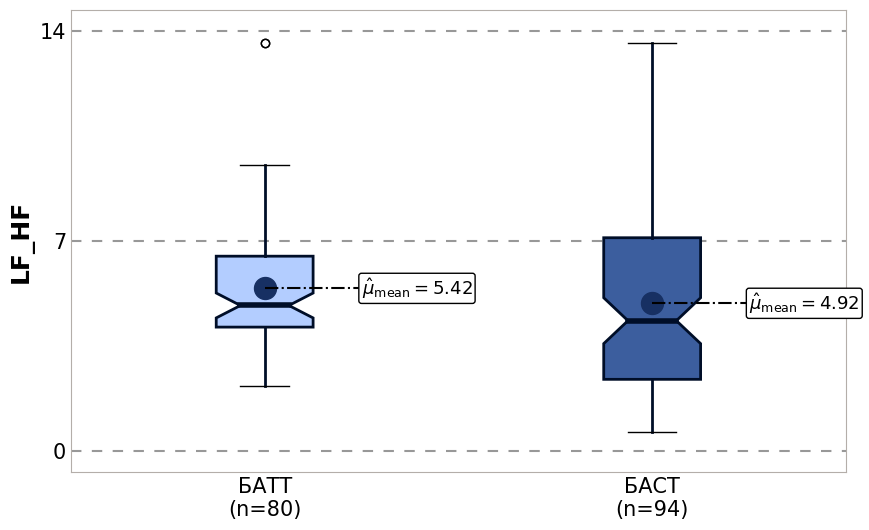

Рисунок ?. Распределение и средние значение LF_HF в группах БАТТ и БАСТ.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БАТТ,5.42,0.26,5.42±0.26,4.13,4.85,6.49,4.85 [4.13-6.49]
БАСТ,4.92,0.33,4.92±0.33,2.39,4.34,7.11,4.34 [2.39-7.11]


Распределение группы БАТТ отличается от нормального распределения p=0.0000
Распределение группы БАСТ отличается от нормального распределения p=0.0002
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap

t-тест (тест Стьюдента)
t=1.14, p=0.258
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=4294.00, p=0.107
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 0.50
95%Cl (разницы) = (-0.306)-(1.294)
p=0.221
Различи между группами статистически не значимые




In [20]:
#для 2 групп
for i in spisok_group:
    print(i)
    box_plot_2_group(i)
    descriptive_statistics_for_mean(i)
    normal_test(i)
    test_2_value(i)
    print()
    print('============================================================================')

In [101]:
# def box_plot(df, x, y):
#     fig, ax = plt.subplots(figsize= (10, 5))
#     ax = sns.boxplot(
#         data=df, x=x, y=y,
#         notch=True, showmeans = True,
#         flierprops={"marker": "x"},
#         boxprops={"facecolor": (.4, .6, .8, .5)},
#         medianprops={"linewidth": "4"}, 
#         #whiskerprops = {'linewidth' : '4'} толщина уса вертикаль
#         #capprops = dict(linestyle='-', linewidth=1, color='Black'),
#         #flierprops = {'linewidth' : '4'}
#     )
#     return

In [ ]:
# Получить виды, отсортированные по алфавиту
species = sorted(data["Группа"].unique())

# y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
y_data = [data[data["Группа"] == specie][group].values for specie in species]

# Создать искаженную версию "x" (это только 0, 1 и 2)
# Подробнее об этом в бонус-треке!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]



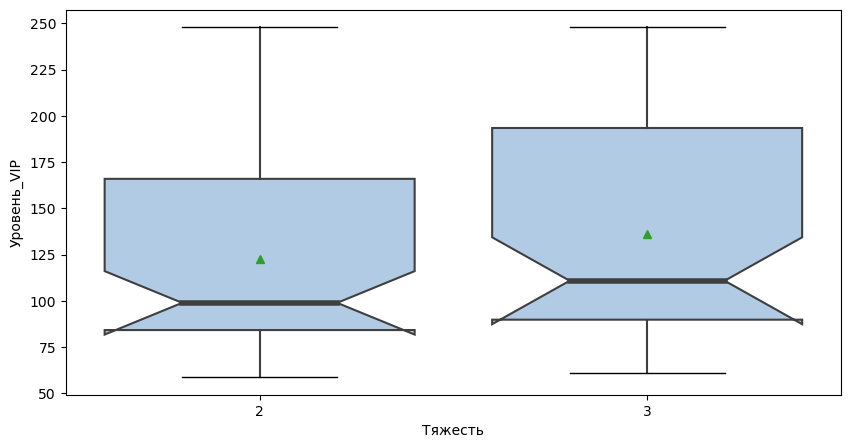

In [93]:
#box_plot(data, TARGET, 'Уровень_VIP')

In [128]:
def box_plot_2_group(group):
    # Получить виды, отсортированные по алфавиту
    species = sorted(data[TARGET].unique())
    
    # y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data = [data[data[TARGET] == specie][group].values for specie in species]
    
    # Создать искаженную версию "x" (это только 0, 1 и 2)
    # Подробнее об этом в бонус-треке!
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    # Colors
    BG_WHITE = "#fbf9f4"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"
    
    # Colors taken from Dark2 palette in RColorBrewer R library
    COLOR_SCALE = ["#9e1b1b", "#1b9e22", "#1b9a9e", "#241b9e", "#9e1b97",]
    
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой

    if data[group].max() > 100:
        HLINES = [(math.floor(data[group].min()/10))*10 , 
                  math.floor(((math.floor(data[group].min()/10))*10 + (math.ceil(data[group].max()/10))*10)/2), 
                  (math.ceil(data[group].max()/10))*10 ]
    elif data[group].max() > 20: 
        HLINES = [(math.floor(data[group].min()/5))*5 , 
                  math.floor(((math.floor(data[group].min()/5))*5 + (math.ceil(data[group].max()/5))*5)/2), 
                  (math.ceil(data[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data[group].min())) , 
                  math.floor(((math.floor(data[group].min())) + (math.ceil(data[group].max())))/2), 
                  (math.ceil(data[group].max()))]        

    fig, ax = plt.subplots(figsize= (14, 10))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавляем скрипки -------------------------------------------------------------- -----
    # bw_method="silverman" означает пропускную способность плотности ядра
    # оценка вычисляется по эмпирическому правилу Сильвермана.
    # Подробнее об этом в бонус-треке ;)

    # Вывод сохраняется в 'скрипках', используемых для настройки их внешнего вида
    #violins = ax.violinplot(
    #    y_data, 
    #    positions=POSITIONS,
    #    widths=0.45,
    #    bw_method="silverman",
    #    showmeans=False, 
    #    showmedians=False,
    #    showextrema=False
    #)

    # Настроить скрипки (удалить заливку, настроить линию и т. д.)
    #for pc in violins["bodies"]:
    #    pc.set_facecolor("none")
    #    pc.set_edgecolor(BLACK)
    #    pc.set_linewidth(1.4)
    #    pc.set_alpha(1)
    

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    # Add jittered dots ----------------------------------------------
    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.4)
    
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#     fvalue, pvalue = st.f_oneway(data[data[TARGET] == species[0]][group], 
#                                  data[data[TARGET] == species[1]][group],
#                                  data[data[TARGET] == species[2]][group], 
#                                  data[data[TARGET] == species[3]][group])

    # perform multiple pairwise comparison (Tukey HSD)
#    m_comp = pairwise_tukeyhsd(endog=data[group], groups=data[TARGET], alpha=0.05)
    
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )

    # Добавить несколько сравнений p-значение для средней разницы -----------
    # Линии графика, указывающие, какие средства сравниваются
    # 'tick_len' задает длину галочки в конце каждой строки
    # дучше прибавлять по 4%

    if data[group].min() < 0:
        po = data[group].max() - data[group].min()
        p1 = 0.08
    else:
        po = data[group].max()
        p1 = 0.04
        
    p = po + po * p1
    
    if data[group].max() > 300:
        tick_len = 0.5
        pad = 0.2
    elif data[group].max() > 100:
        tick_len = 0.25
        pad = 0.1
    elif data[group].max() > 10:
        tick_len = 0.12
        pad = 0.05
    else: 
        tick_len = 0.025
        pad = 0.02

    #полоски со значимостью порядок полос 7 4 5 9 0 8 1 6 2 3  

    if m_comp.pvalues[7] <= 0.05:
        ax.plot([2, 2, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[7], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[4] <= 0.05:
        ax.plot([1, 1, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[4], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[5] <= 0.05:
        ax.plot([1, 1, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[5], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[9] <= 0.05:
        ax.plot([3, 3, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[9], 3)}"
        ax.text(3.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[0] <= 0.05:
        ax.plot([0, 0, 1, 1], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[0], 3)}"
        ax.text(0.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[8] <= 0.05:
        ax.plot([2, 2, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[8], 3)}"
        ax.text(3, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[1] <= 0.05:
        ax.plot([0, 0, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[1], 3)}"
        ax.text(1, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[6] <= 0.05:
        ax.plot([1, 1, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[6], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[2] <= 0.05:
        ax.plot([0, 0, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[2], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[3] <= 0.05:
        ax.plot([0, 0, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[3], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    # Настройка макета --------------------------------------------------------------
    # Скрыть шипы
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")

    # xlabels учитывает размер выборки для каждого вида
    xlabels = [f"{name_group[specie]}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
    ax.set_xlabel("Группа", size=18, weight="bold")
    
    # Рисунок используется для заголовка, а ось — для подзаголовка.
    # Заголовок
 

    fig.suptitle(
        f"Среднее значение {group} в экспериментальных группах",
        x = 0.122,
        y = 0.975,
        ha="left",
        fontsize=26,
    #    fontname="Lobster Two",
        color=BLUE,
        weight="bold",    
    )

    # # Подзаголовок
      
    stats = [
        f"$F_{{ANOVA}}$={round(fvalue,2)}",
        f"p={round(pvalue,3)+0.001}",
        f"Pairwise test: Tukey-test"
    ]

    
    #ax.set_title(
    #    ", ".join(stats),
    #    loc="left",
    #    ha="left",
    #    fontsize=20,
    #    color=BLUE_DARK
    #)
    
    # Примечания внизу справа
    fig.text(
        0.65,
        0.03,
        ", ".join(stats),
        fontsize=10
    )
    
    plt.show()
    
    print(f' F-Anova {round(fvalue, 2)}, p = {round(pvalue, 4)}')
    print(m_comp)